# Texas COVID Vulnerability Report
**by Yvonne King, Brandi Reger, Jada Shipp, and Wenliang Sun**

**Quick Notebook Reference**

1. Project Plan
2. Imports
3. Acquire
4. Prep
5. Exploration
6. Models
7. Model Evaluation
8. Final Conclusions

## Project Plan

**Acquisition, Prep, and Initial Exploration**
- Read in various files
- Handle Missing Values
- Remove/repair erroneous data
- Look at shape of data

**Exploration**
- Answer the following questions:
    - What social features are related to spikes in COVID

**Modeling**
- Time Series Analysis - Using our social vulnerability index we want to create a model to show weekly growth/decline of COVID per county
- We will use classification, time series, and possibly regression to predict case increases

**Main Hypotheses**

- $H_0$: Vulnerability score is not related to higher infection rate.
- $H_a$: Vulnerability score is related to higher infection rate


- $H_0$: Population density correlates to higher infection rate
- $H_a$: Population density does not correlate to higher infection rate 


- $H_0$: Counties with higher population of senior citizens have higher infection rates
- $H_a$: Counties with higher population of senior citizens do not have higher infection rates

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Hypothesis testing
from math import sqrt
from scipy import stats

import acquire
import prepare
import explore

#Set figure size for all plots
plt.rc("figure", figsize = (16,16))

#Set fontsize for titles
plt.rc("font", size=14)

## Acquire
- The ```acquire.py``` file has all the functions to call in our dataframes for the Texas subsets of the following files (which can be found in the Data folder:
    - County Classification
    - Cumulative Tests over Time by County
    - Food1
    - Hospitals
    - Jobs
    - NursinfFacilities
    - People
    - time_series_covid19_confirmed_US
    - Variable Name Lookup
    - Veterans
- We went through all the files above and dropped erroneous columns
- After each file was combed through, we combined all data into one large dataframe using the```merge_dataframes()``` function in the ```acquire.py```

In [2]:
#bring in complete dataframe
df = acquire.merge_dataframes()

#take a peek at the data
df.sample(5)

LACCESS_POP15   County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
172     223.290367   motley   41009.0      4.152249               73.0   
157     825.226907   marion   38011.0      6.774550              605.0   
50     1504.117350   cottle   38304.0     14.489164              127.0   
211   34981.491720    smith   56848.0      6.697037            12359.0   
49    32863.203345  coryell   48099.0      5.231983             3384.0   

     PovertyAllAgesNum  LandAreaSQMiles2010  TotalPopEst2018  \
172              219.0               989.56           1234.0   
157             2135.0               380.88           9928.0   
50               293.0               900.56           1389.0   
211            33744.0               921.45         230221.0   
49              9407.0              1052.07          74808.0   

     Age65AndOlderNum2010  Under18Num2010  ...   FIPS  num_nursing_homes  \
172                   328             264  ...  48345                1.0   
157                  2270            2009  ...  48315                1.0   
50                    358             350  ...  48101                NaN   
211                 29851           53796  ...  48423               16.0   
49                   5684           21005  ...  48099                4.0   

     total_tests  Public Health Region (11)  RPL_THEME1  RPL_THEME2  \
172           23                          1      0.3360      0.9960   
157           99                          4      0.7391      0.3953   
50            33                          2      0.9368      1.0000   
211         5855                          4      0.4269      0.2885   
49          4505                          7      0.6206      0.3162   

     RPL_THEME3  RPL_THEME4  RPL_THEMES    BEDS  
172      0.1107      0.1462      0.4348     NaN  
157      0.2055      0.3043      0.4387     NaN  
50       0.3755      0.0949      0.8182     NaN  
211      0.5850      0.4901      0.4783  1337.0  
49       0.3162      0.4111      0.4229    25.0  

[5 rows x 78 columns]

In [3]:
#look at the shape of the data
df.shape

(254, 78)

In [4]:
#look at data types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 78 columns):
LACCESS_POP15                         253 non-null float64
County                                254 non-null object
MedHHInc                              254 non-null float64
Deep_Pov_All                          254 non-null float64
PovertyUnder18Num                     254 non-null float64
PovertyAllAgesNum                     254 non-null float64
LandAreaSQMiles2010                   254 non-null float64
TotalPopEst2018                       254 non-null float64
Age65AndOlderNum2010                  254 non-null int64
Under18Num2010                        254 non-null int64
NaturalChange1018                     254 non-null float64
AvgHHSize                             254 non-null float64
TotalOccHU                            254 non-null int64
OwnHomeNum                            254 non-null int64
FemaleHHNum                           254 non-null int64
TotalHH              

# Prepare

During the preparation phase we:
1. Handled any null values by replacing them with zero since each row represents a county in Texas
2. Added the following calculated fields:
    - Cases per 1k, 10k, & 100k
    - Positivity rate (cases / tests)
    - population density (how many people per sq mile of land in the county)
    - numerical columns into percents
    - Proportion of all children that live below poverty line
    - Proportion of population that live below poverty line
    - Proportion of seniors that live below poverty line
    - Percentage of heads of house who own their home
    - Rent home percentage
    - Percentage for female heads of households
    - of all heads of households, what proportion are over 65 and live alone
    - of all heads of households, what proportion do not speak english
    - of the adult population, what proportion have what level of education
    - of the population, what proportion are various races
    - How does the median income for vets compare to the median income in the county
    - What proportion of the adult population is a vet
    - What proportion of the adult population is disabled
    - What proportion of the vet population is poor
3. Capitalized county name
4. Updated all datatypes
5. Rounded decimals to 2 pints
6. Created the following categorical columns:
    - Population density binned into High, Mid and low
    - Infection percent binned into High, Mid and low

Functions have been created to handle all of the above in the ```prepare.py``` file

To bring in the data we will call the ```get_data()``` function from the ```prepare.py``` file

In [5]:
#read in dataframe
df = prepare.get_data()

In [6]:
#take a look at a sample of our data to ensure everything came in as anticipated
df.sample(3)

LACCESS_POP15     County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
85     4771.034736  Gillespie     61433      4.665841                831   
97     4983.125005   Hansford     57240      7.622007                272   
241     620.348168    Wheeler     48018      9.106114                271   

     PovertyAllAgesNum  LandAreaSQMiles2010  TotalPopEst2018  \
85                2527                 1058            26804   
97                 626                  919             5463   
241                721                  914             5191   

     Age65AndOlderNum2010  Under18Num2010  ...  white_pct  black_pct  \
85                   6586            5041  ...       0.74       0.00   
97                    766            1703  ...       0.53       0.01   
241                   995            1371  ...       0.67       0.02   

     asian_pct  nat_am_pct  med_inc_vet_vs_civ  all_vet_pct  disabled_pct  \
85         0.0         0.0                1.33         0.09          0.05   
97         0.0         0.0                0.93         0.05          0.07   
241        0.0         0.0                1.56         0.07          0.08   

     poor_vets_pct  pop_density_category  infection_pct_category  
85            0.02                   mid                     low  
97            0.00                   low                    high  
241           0.01                   low                     mid  

[3 rows x 102 columns]

In [7]:
#Let's take a quick look at the shape of the data to make sure no rows were dropped
df.shape

(254, 102)

In [8]:
#make sure there are no nulls
df.isnull().sum()

LACCESS_POP15             0
County                    0
MedHHInc                  0
Deep_Pov_All              0
PovertyUnder18Num         0
                         ..
all_vet_pct               0
disabled_pct              0
poor_vets_pct             0
pop_density_category      0
infection_pct_category    0
Length: 102, dtype: int64

In [9]:
df.isna().sum().sum()

0

In [10]:
df.isna().sum().sum()

0

**Quick Notes**
- Each row in our dataframe represents a County in Texas
- There are 254 Counties in Texas and those counties are broken into 11 regions across Texas
- A Data Dictionary is available in our README file

# Exploratory Data Analysis (EDA)

In this section we will:
1. View the distribution of our numerical data
1. Look at the region overview

## What does the Distribution of our Data look like by Region?
- Here we are going to look at the following columns:
    - ```RPL_THEME1``` - Socioeconomic 
    - ```RPL_THEME2``` - Household Composition & Disability
    - ```RPL_THEME3``` - Minority Status & Language
    - ```RPL_THEME4``` - Housing Type & Transportation
    - ```RPL_THEMES``` - Overall tract summary ranking variable
    - ```num_covid_cases``` - number of covid cases

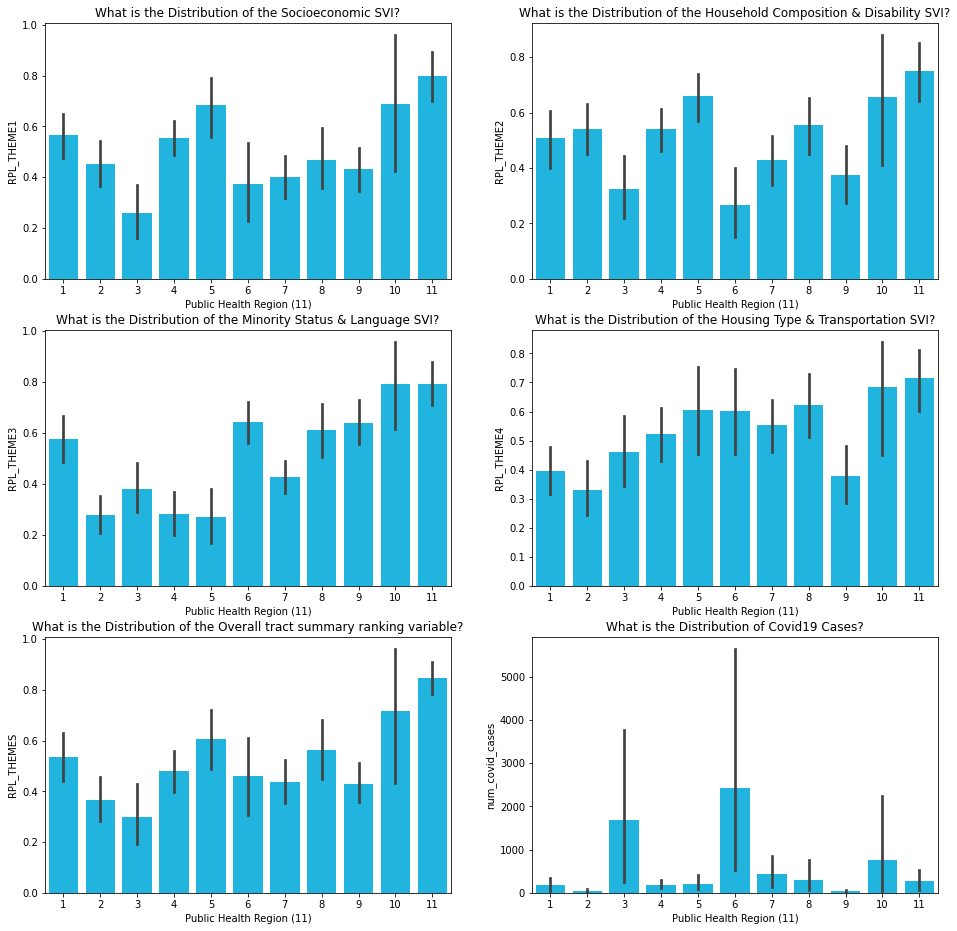

In [11]:
#function to plot our variables from above by region
explore.plot_region_barplots(df)

In [12]:
#subset the 11 regions into their own df using the get_all_region_subsets_for_distro function
df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11 = explore.get_all_region_subsets_for_distro(df)

### Distribution Plots for Region 1

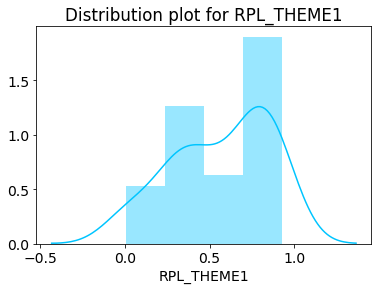

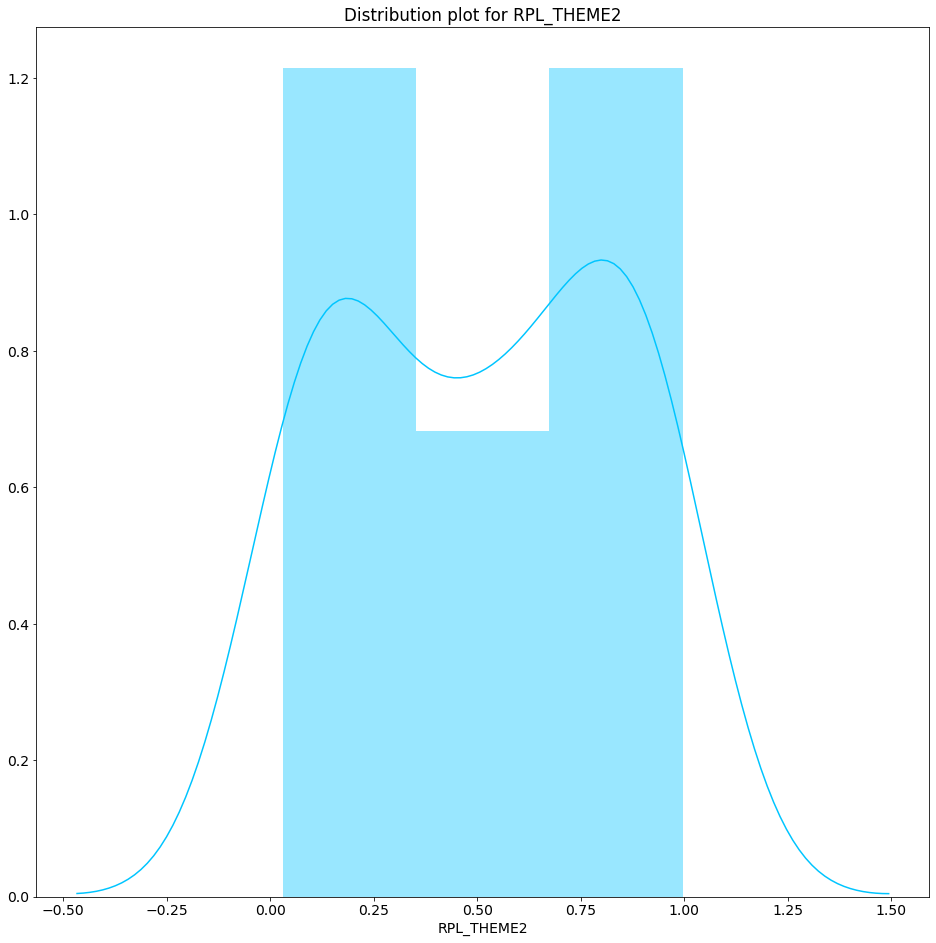

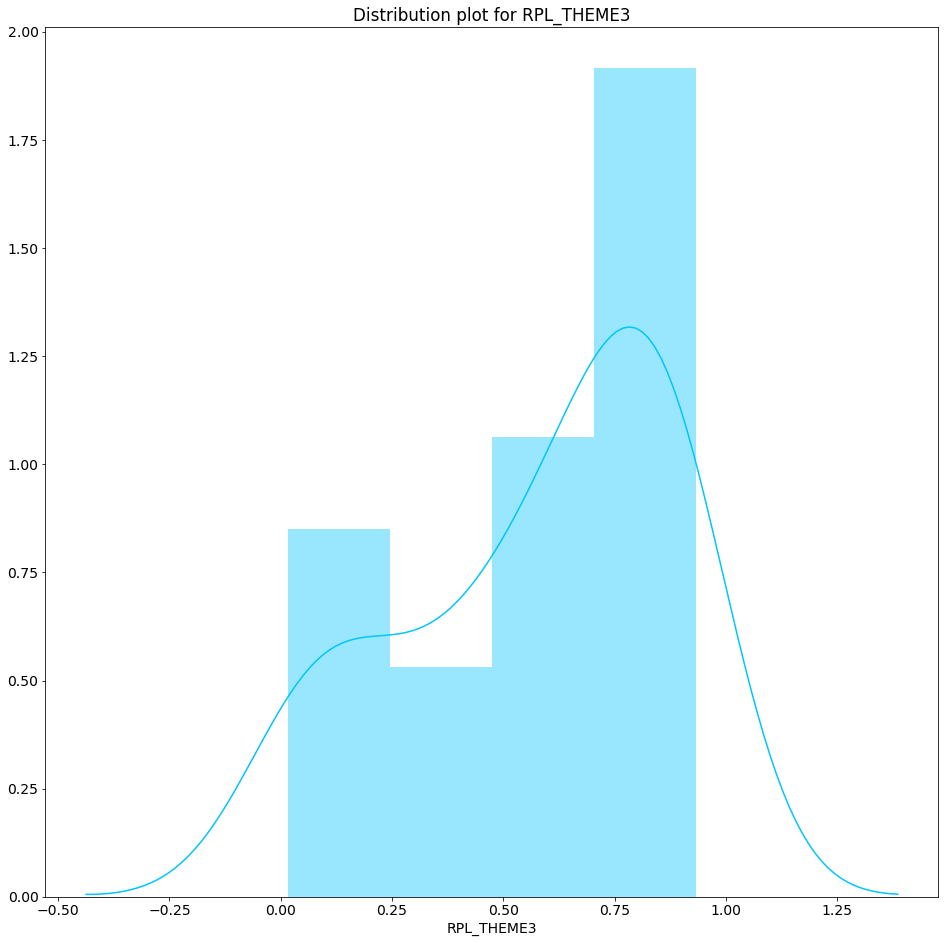

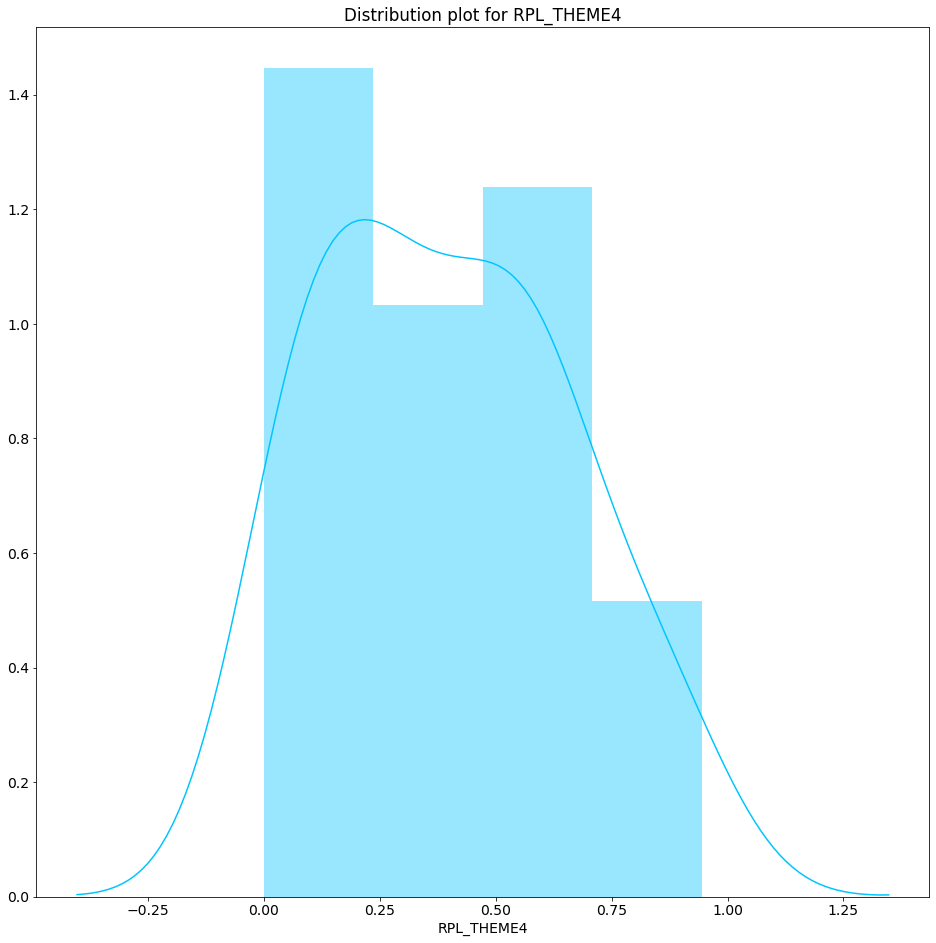

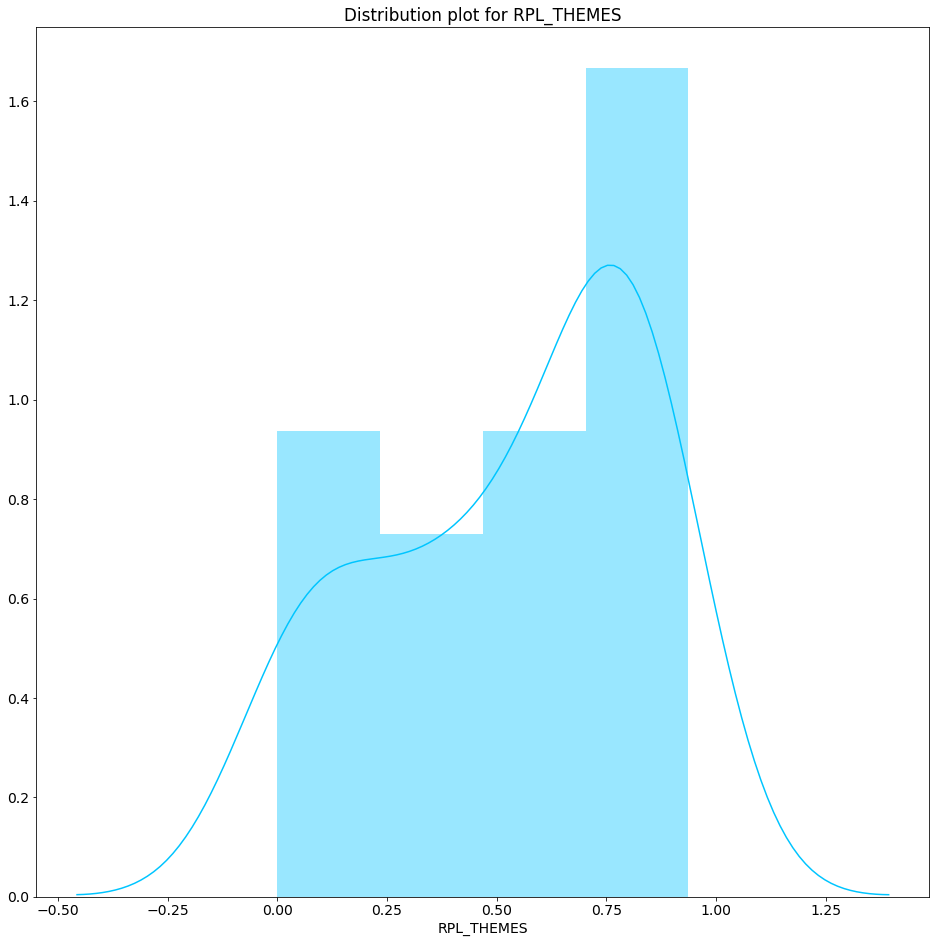

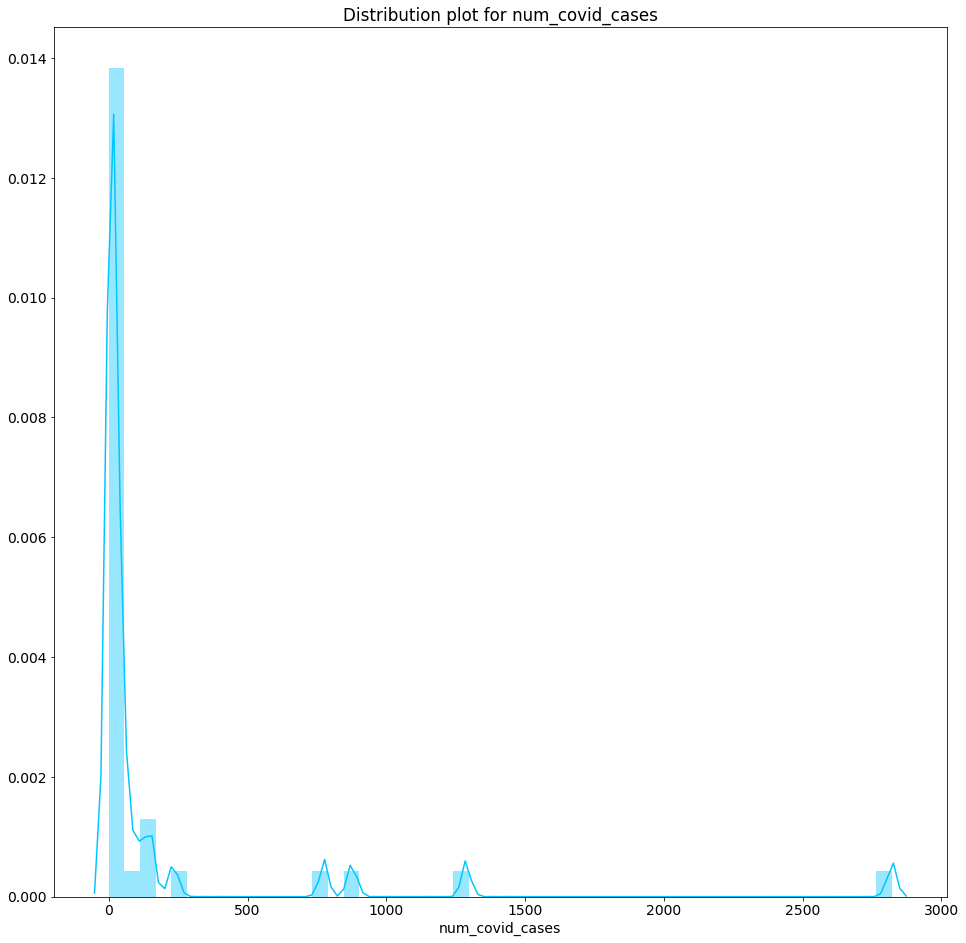

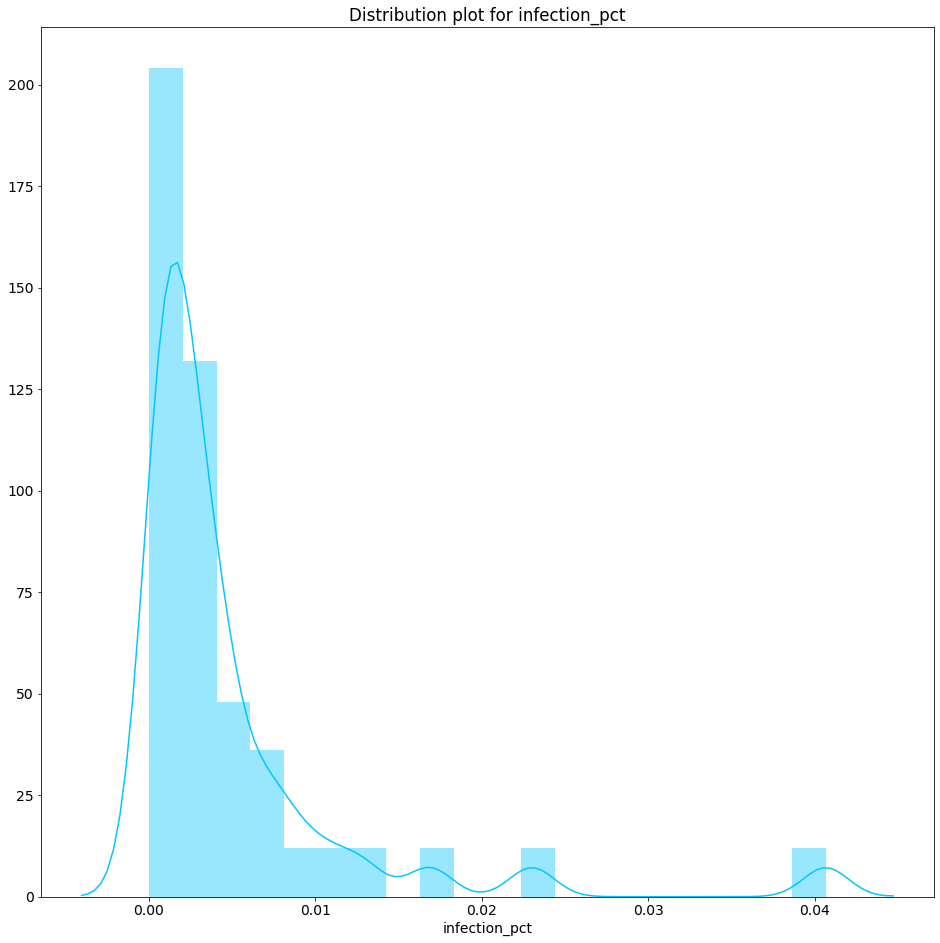

In [13]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_1)

### Distribution Plots for Region 2

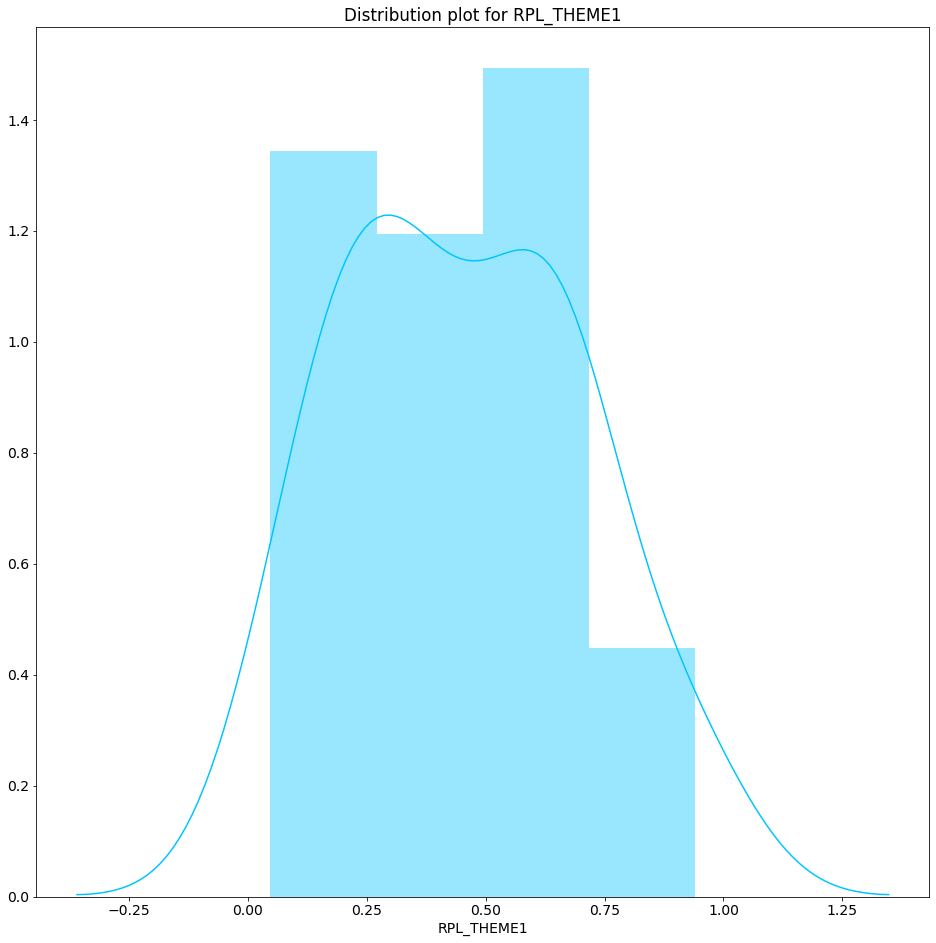

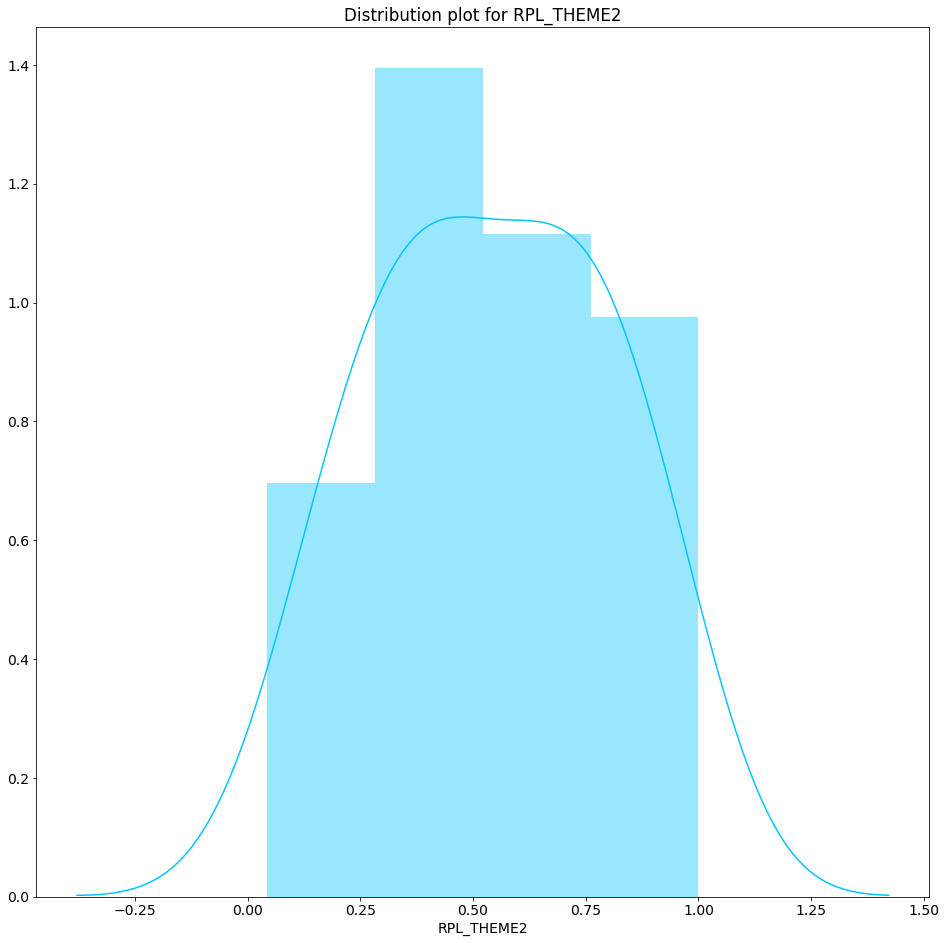

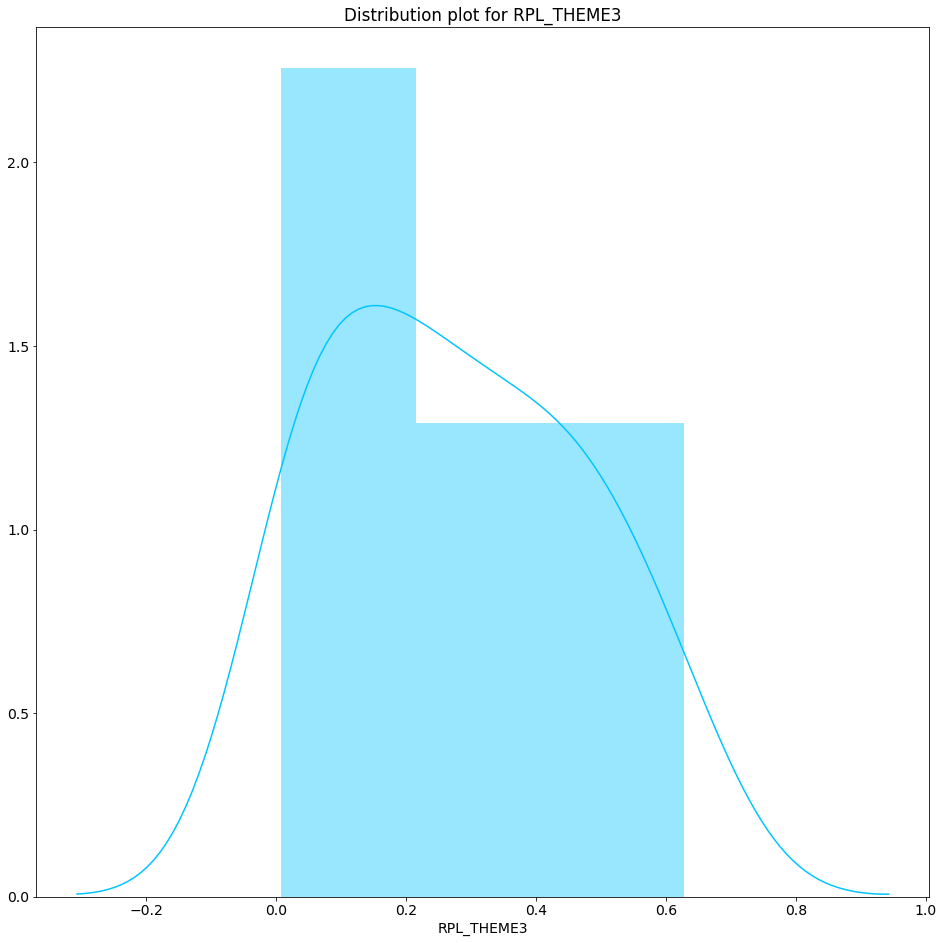

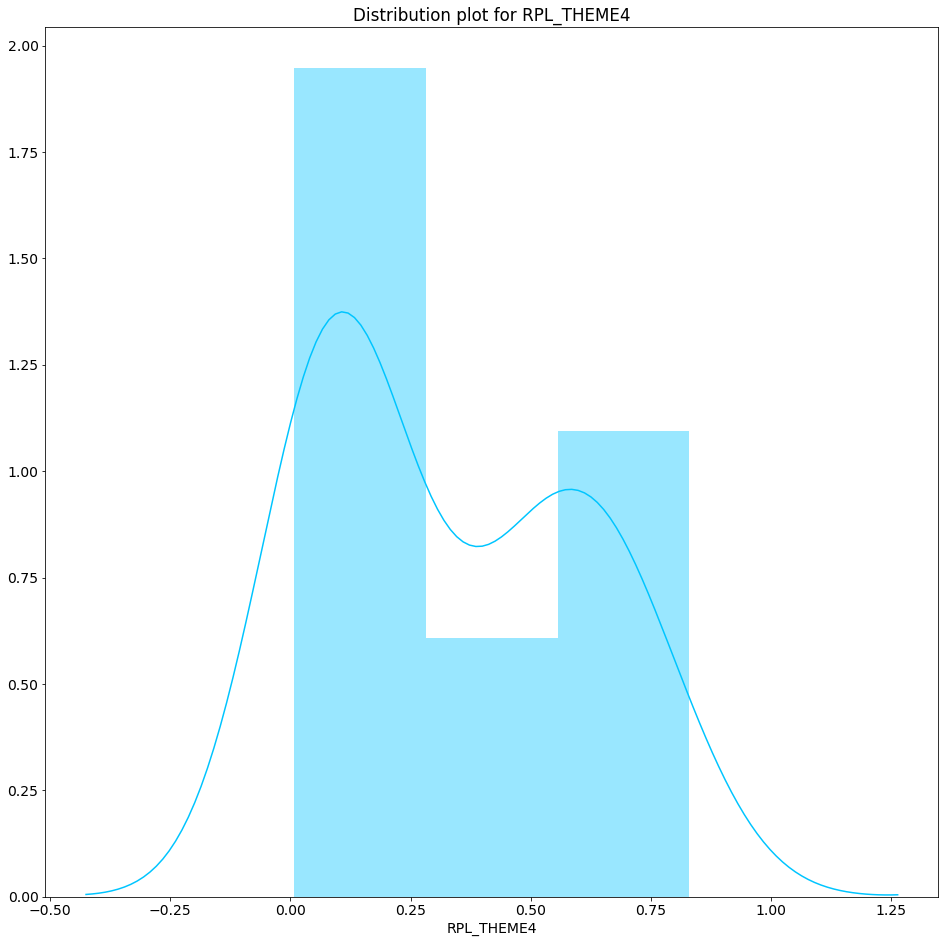

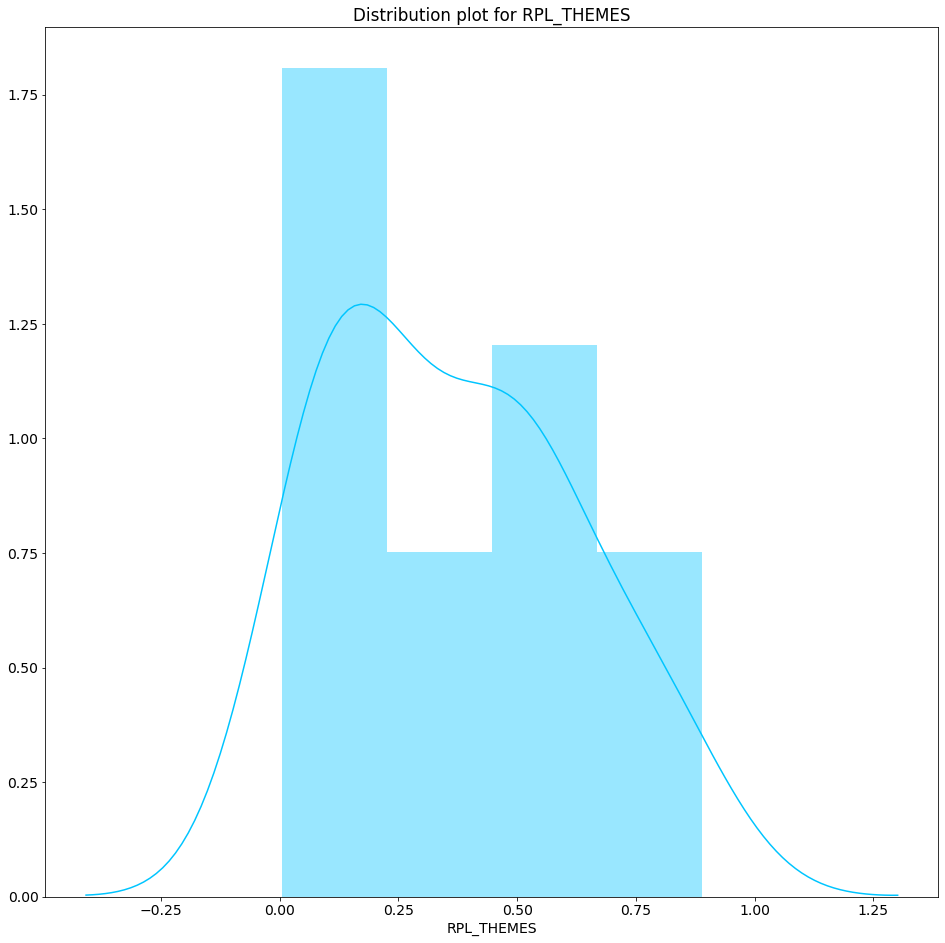

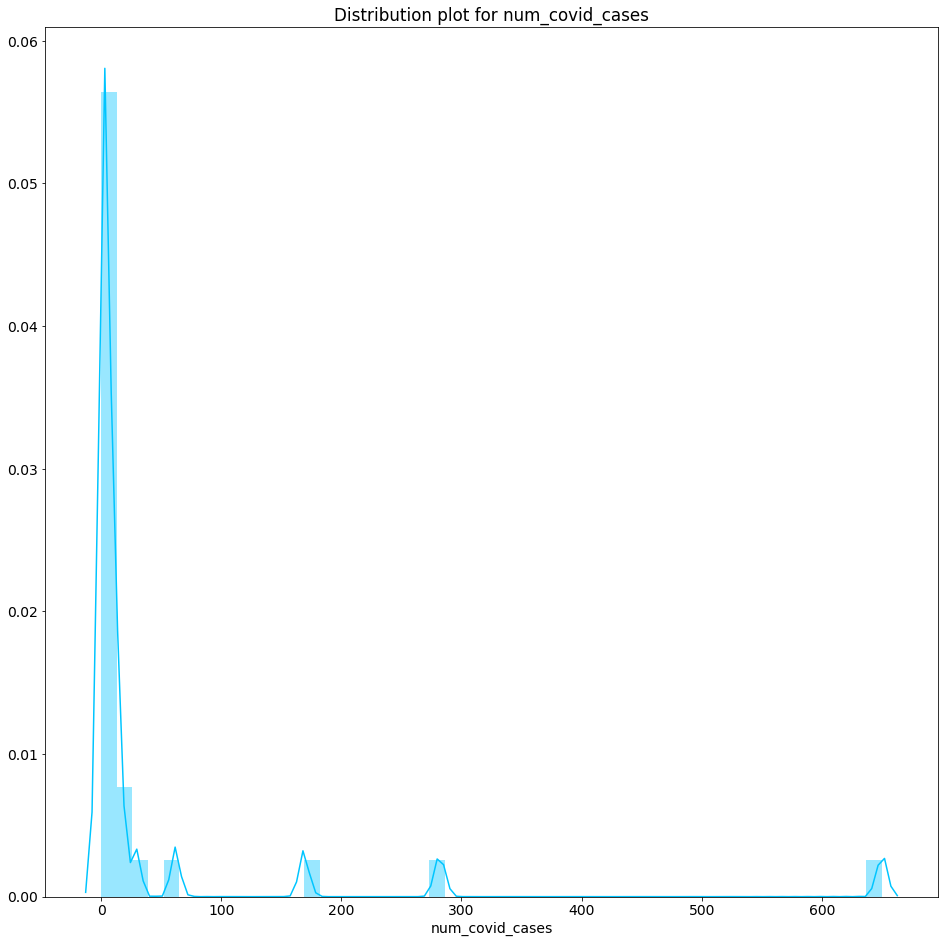

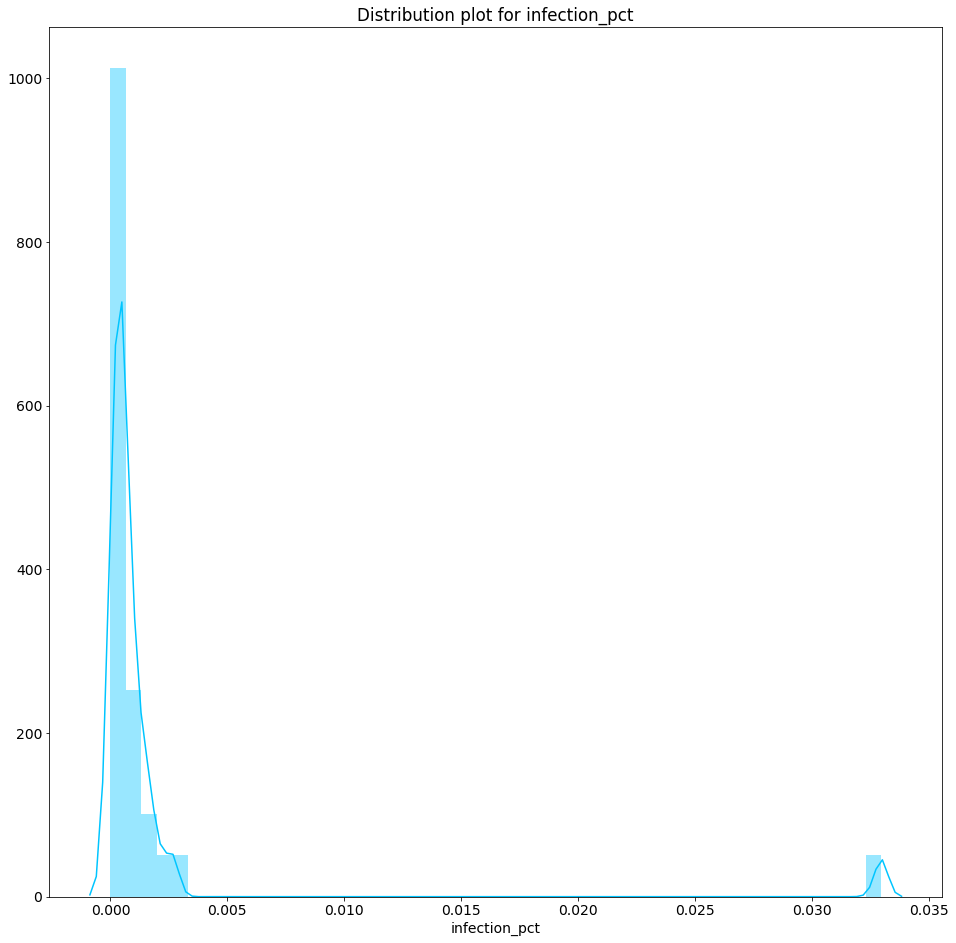

In [14]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_2)

### Distribution Plots for Region 3

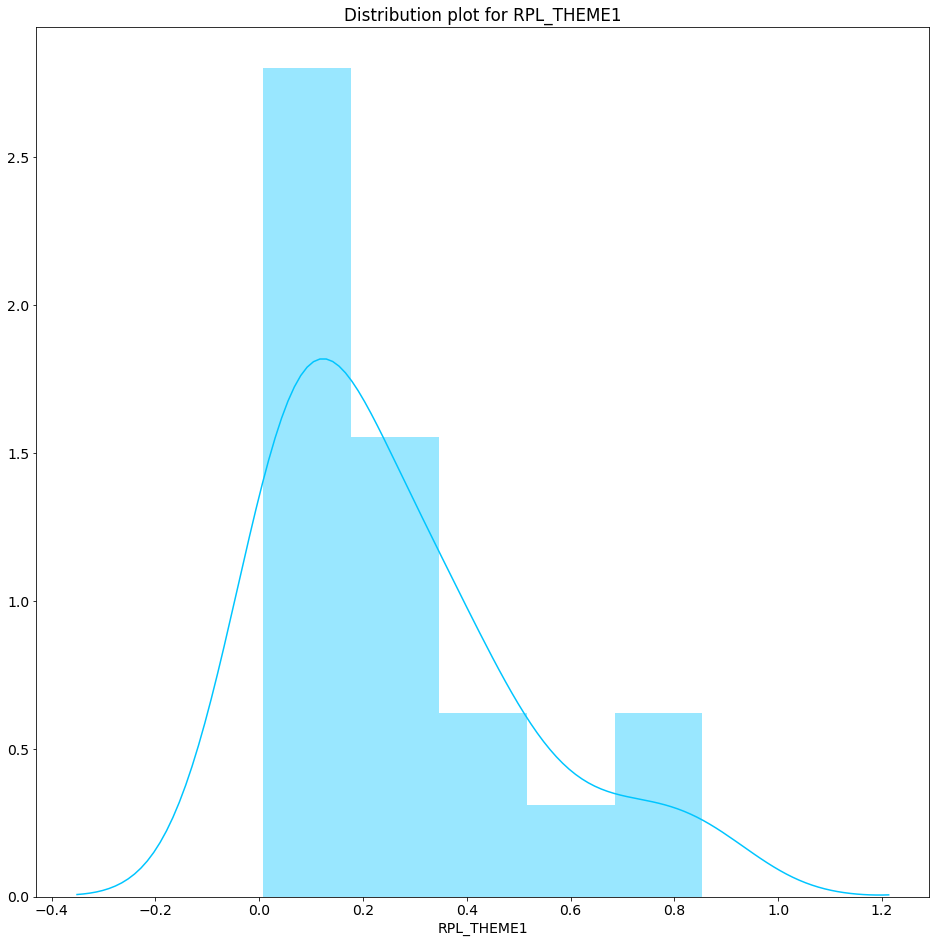

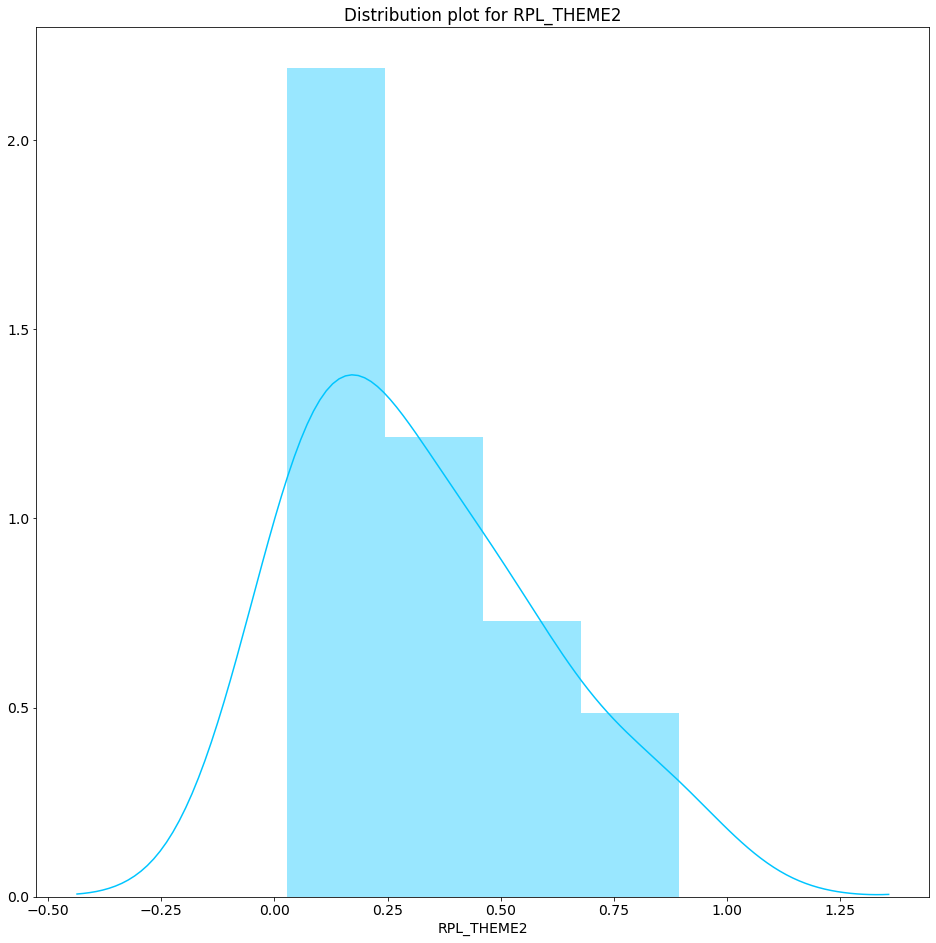

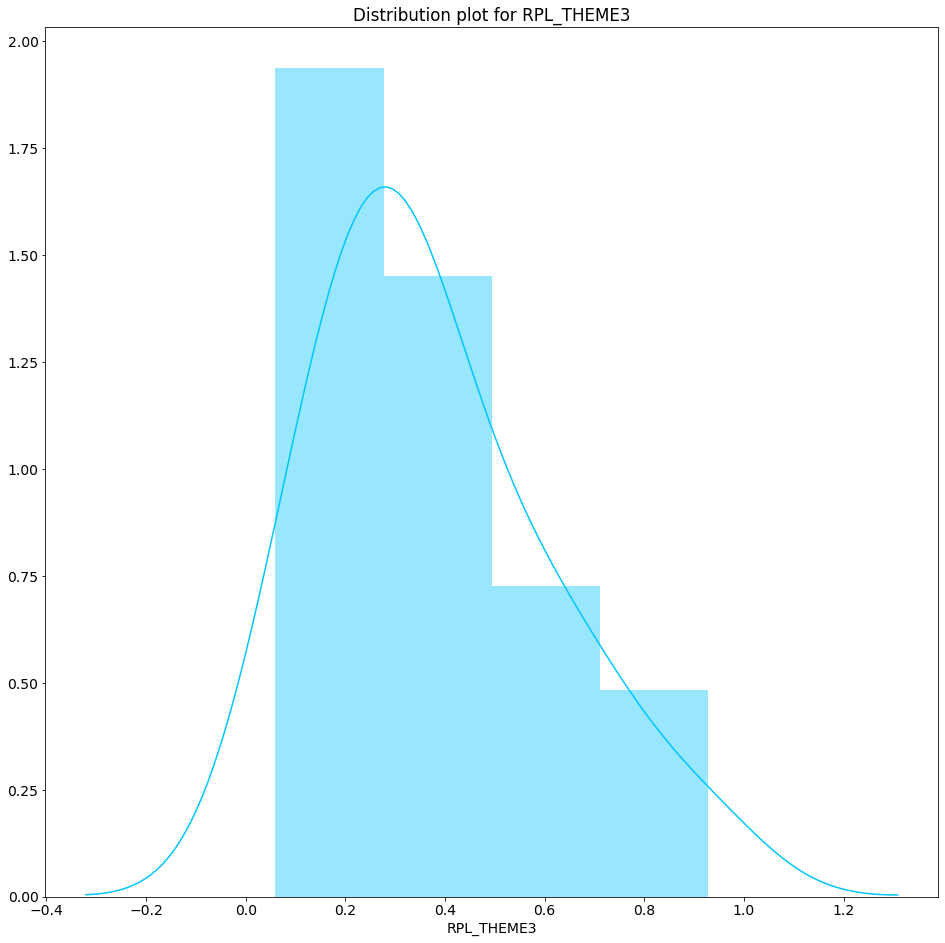

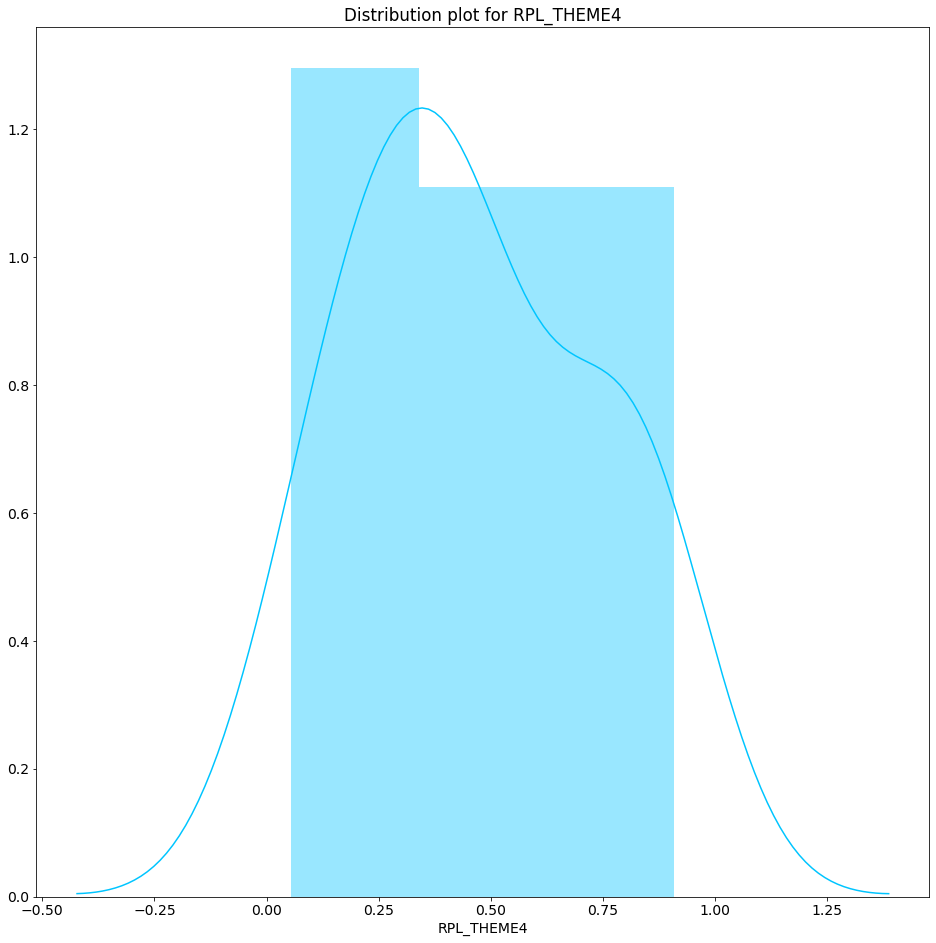

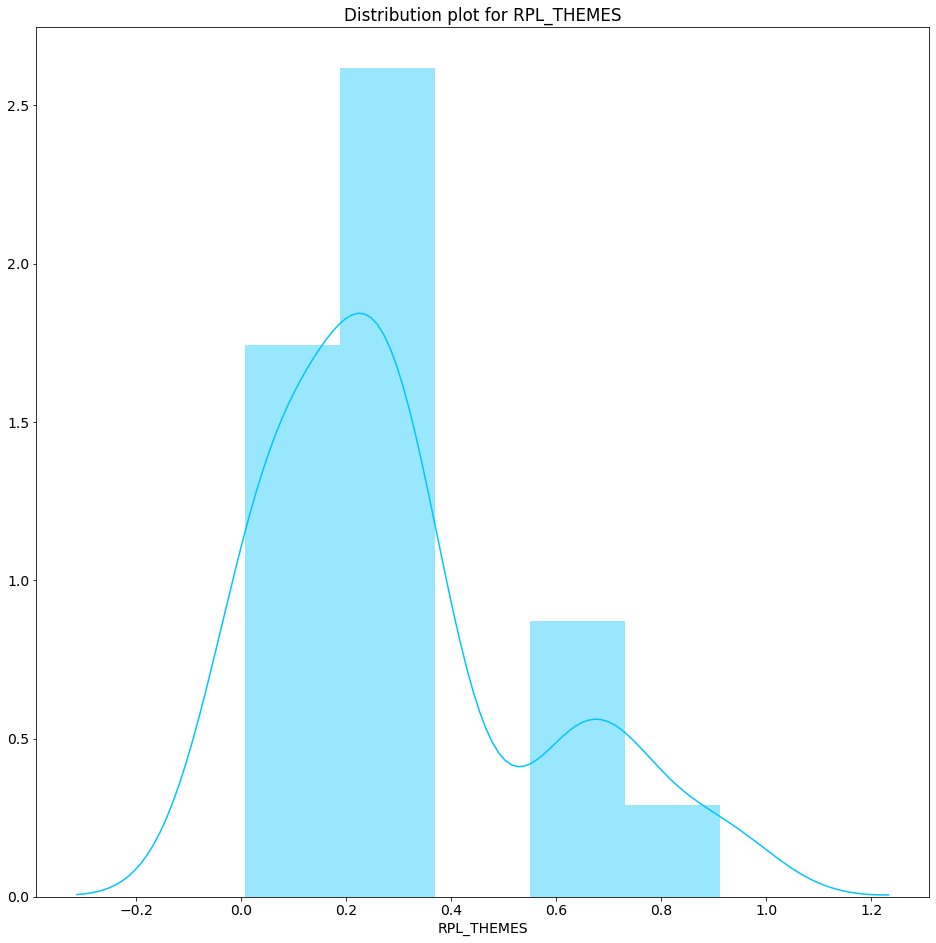

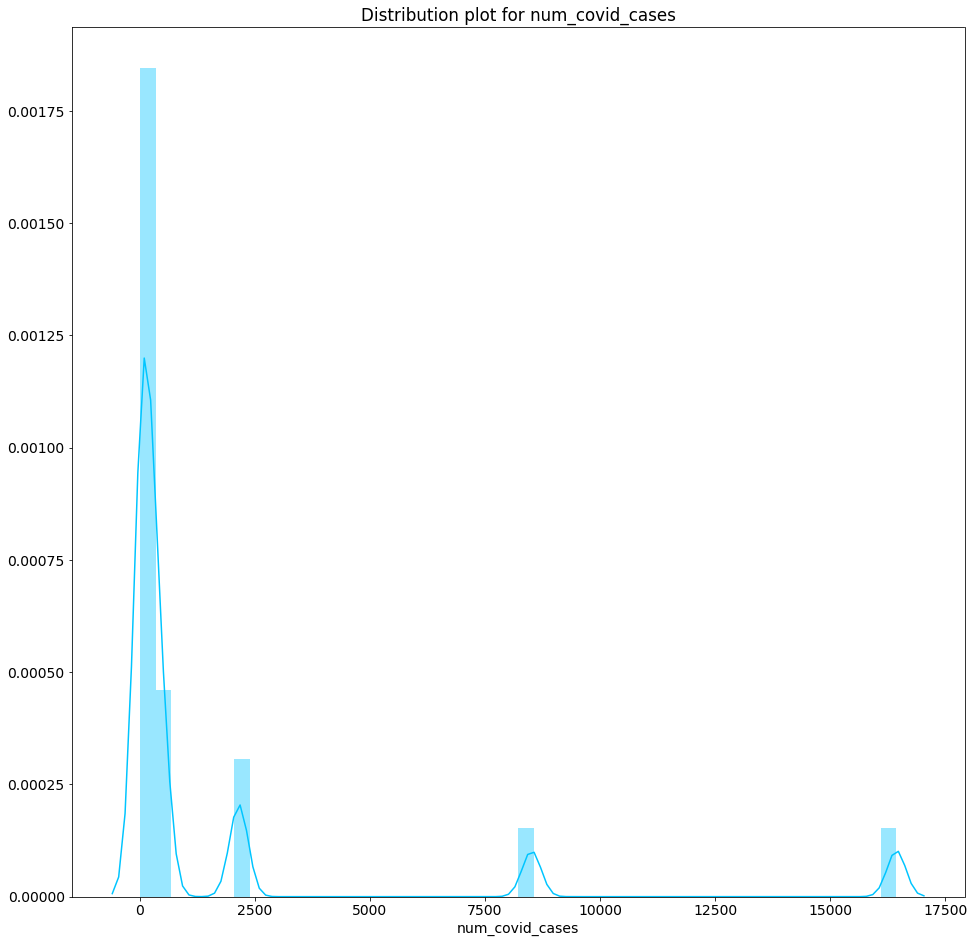

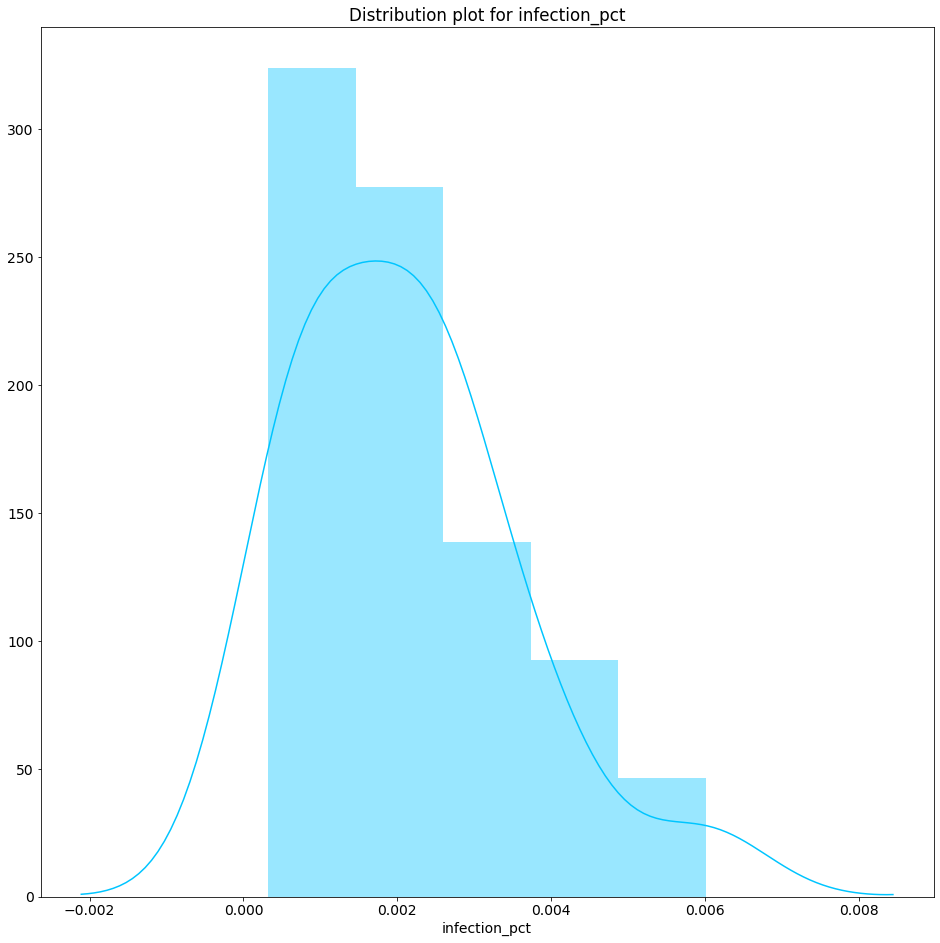

In [15]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_3)

### Distribution Plots for Region 4

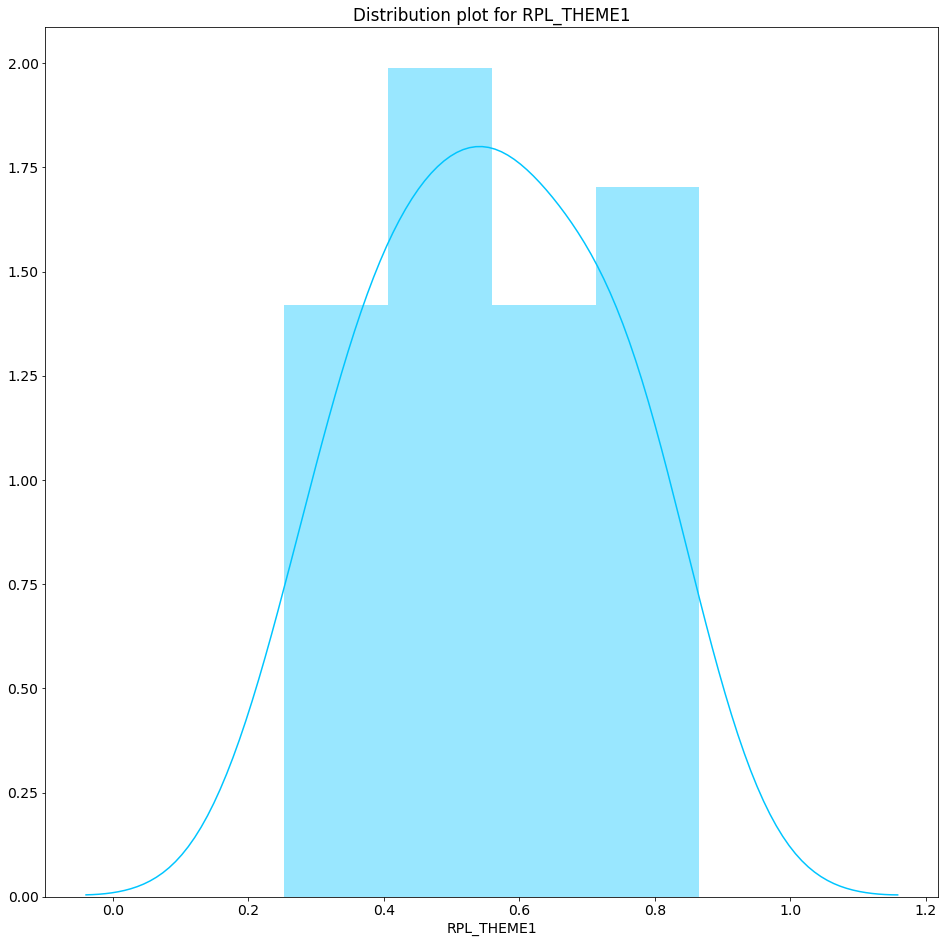

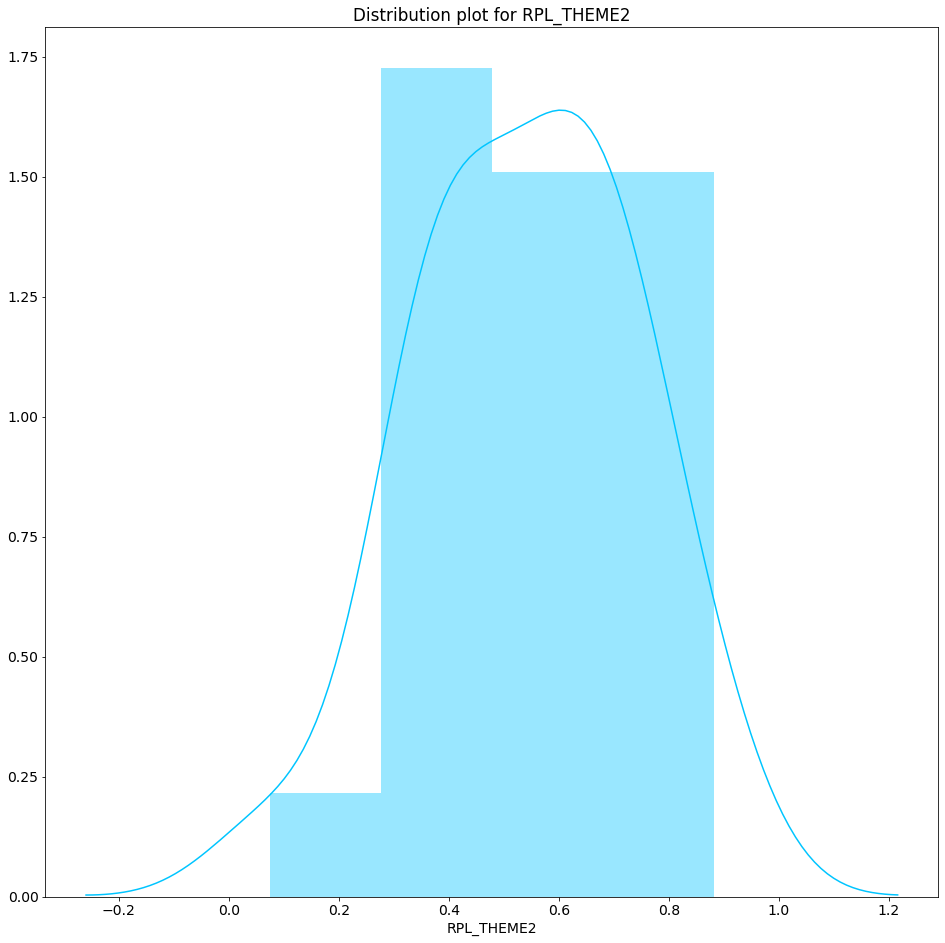

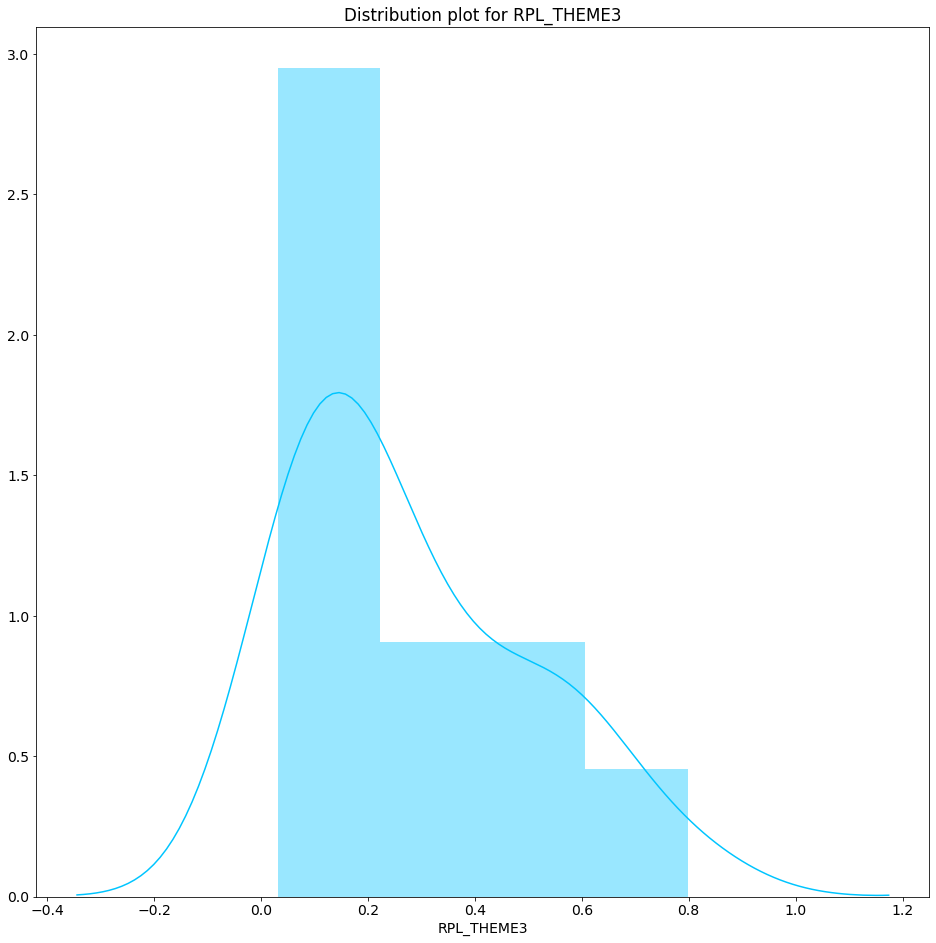

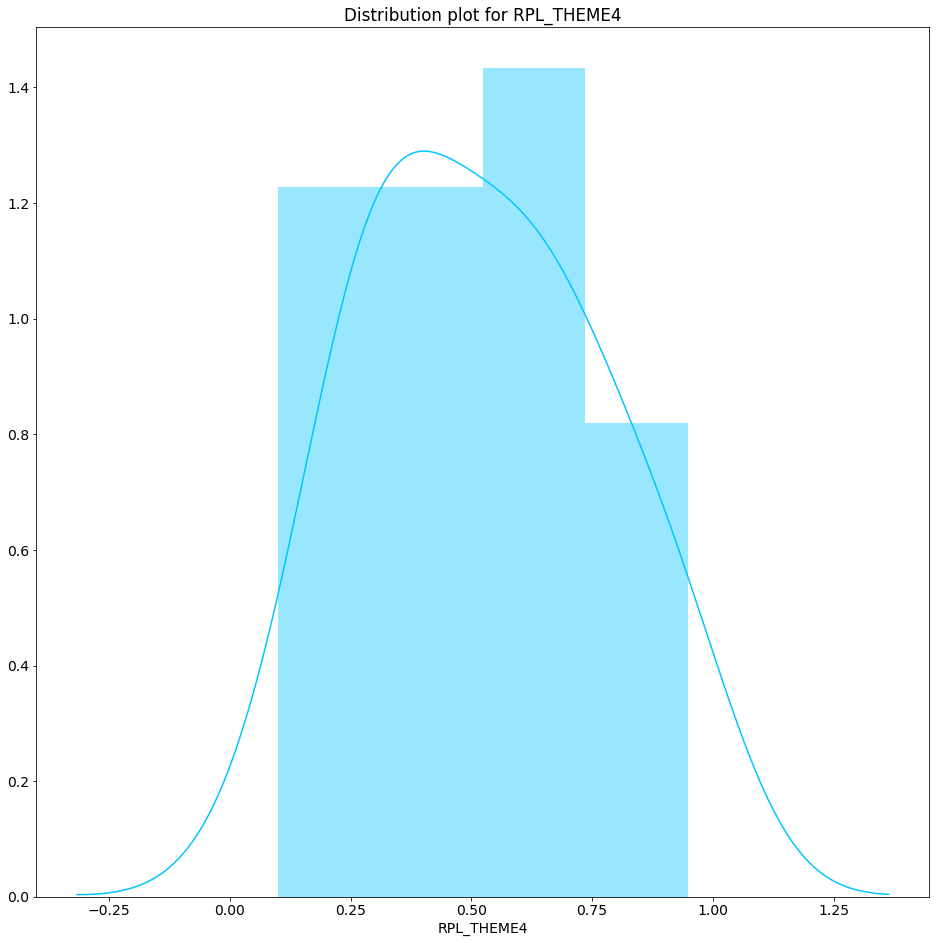

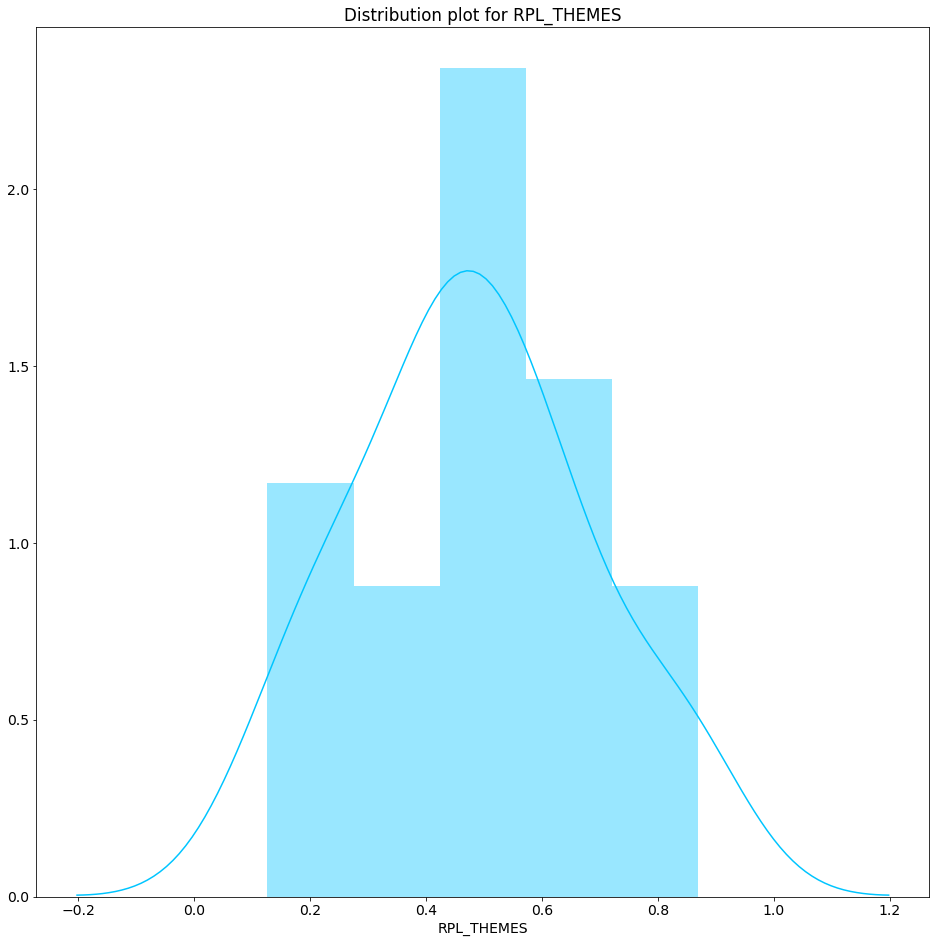

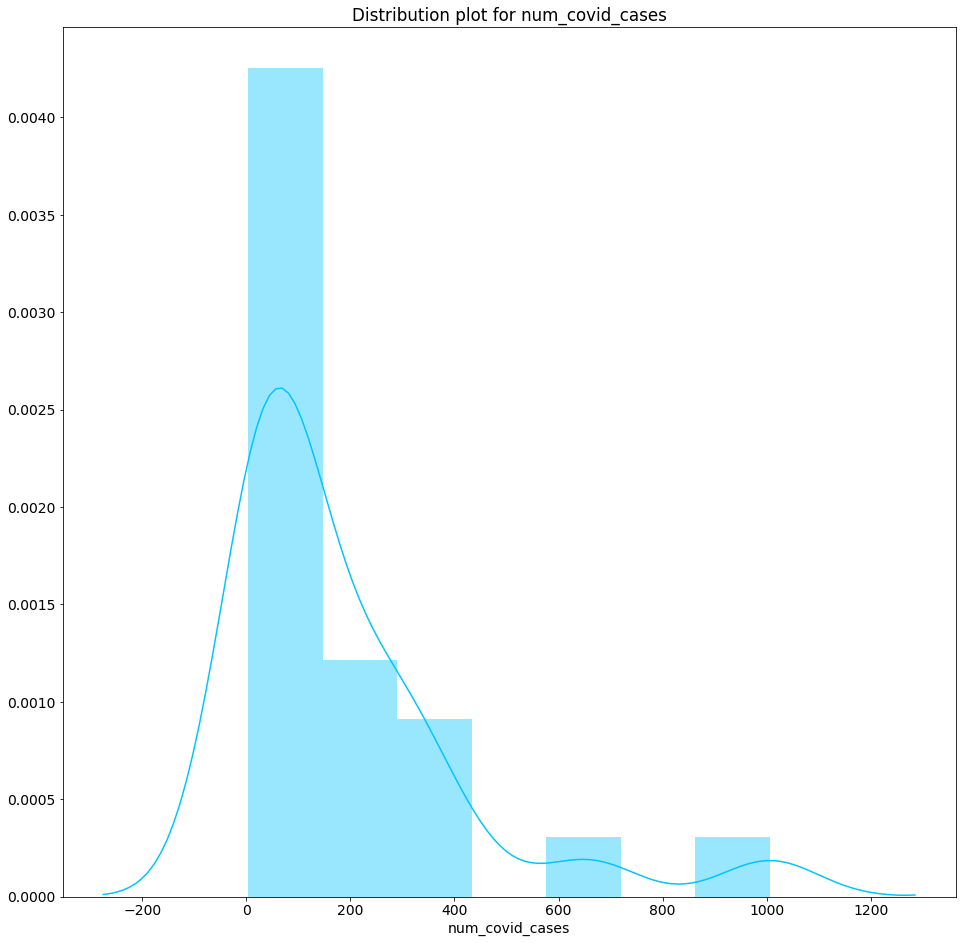

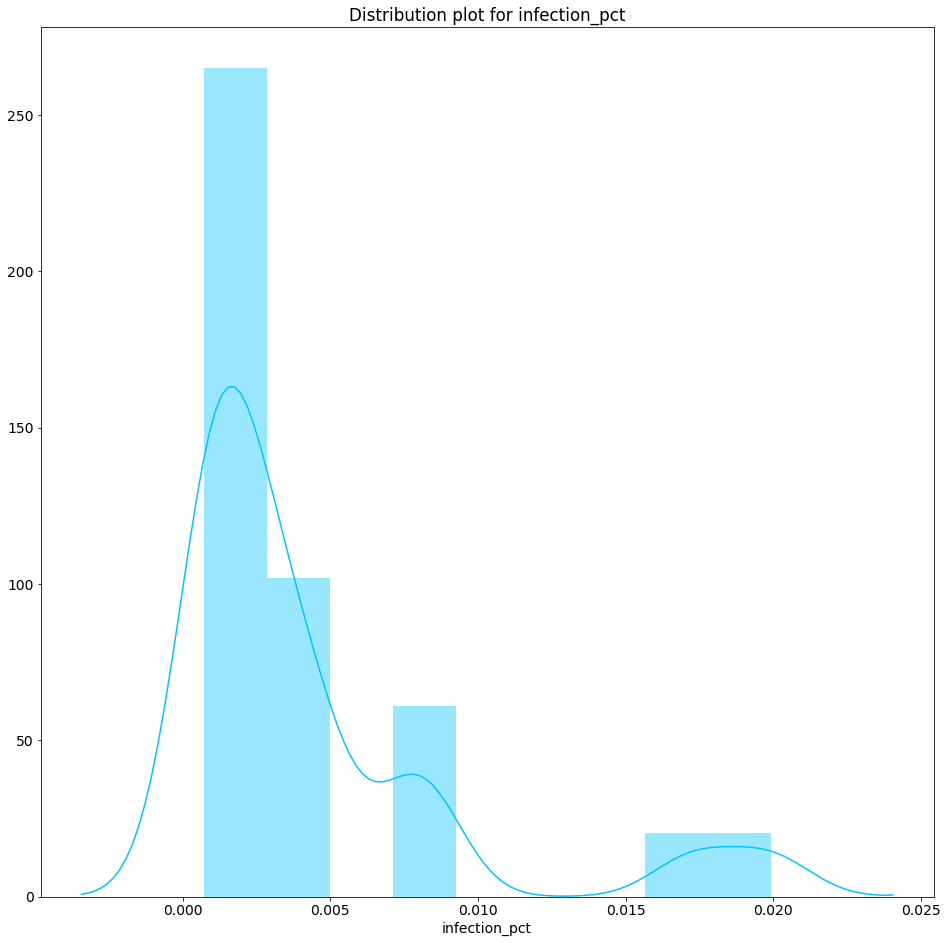

In [16]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_4)

### Distribution Plots for Region 5

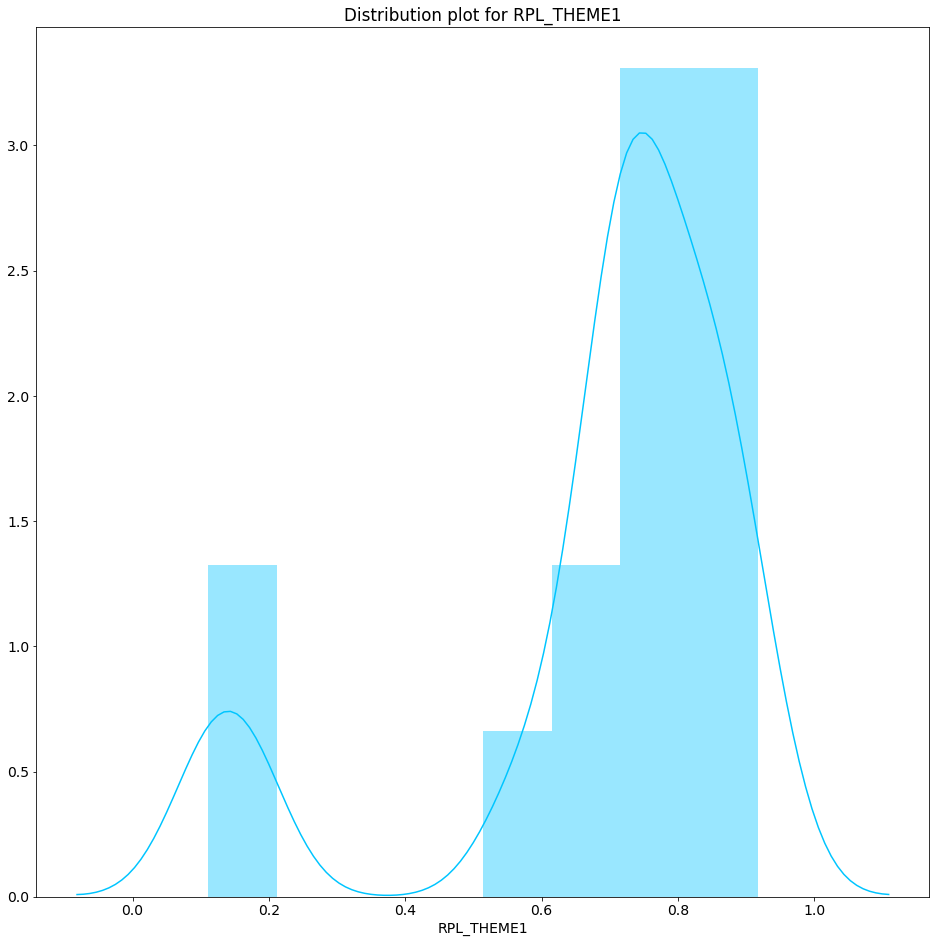

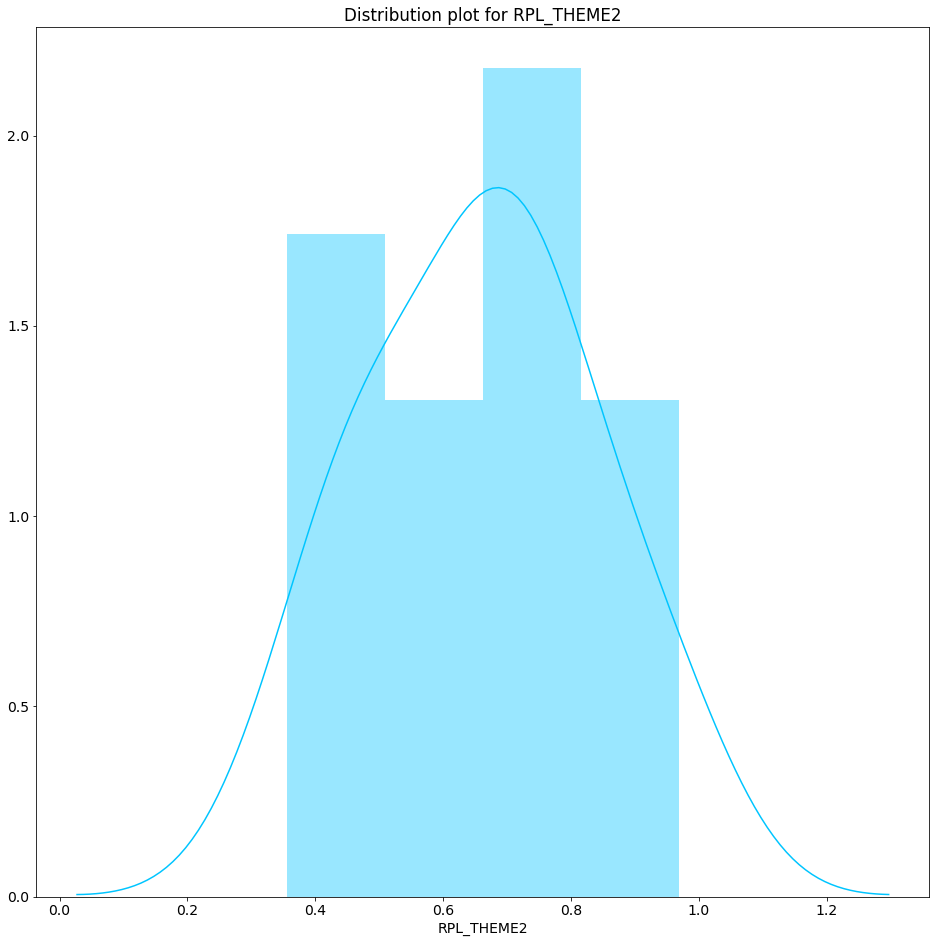

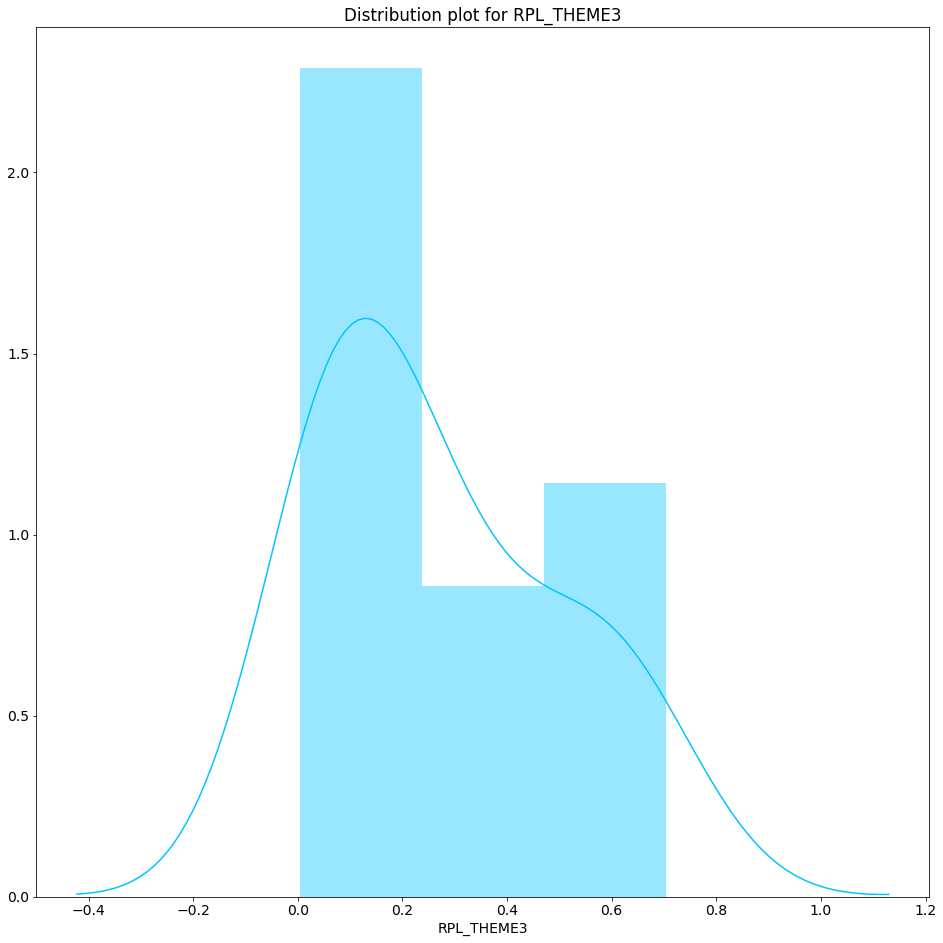

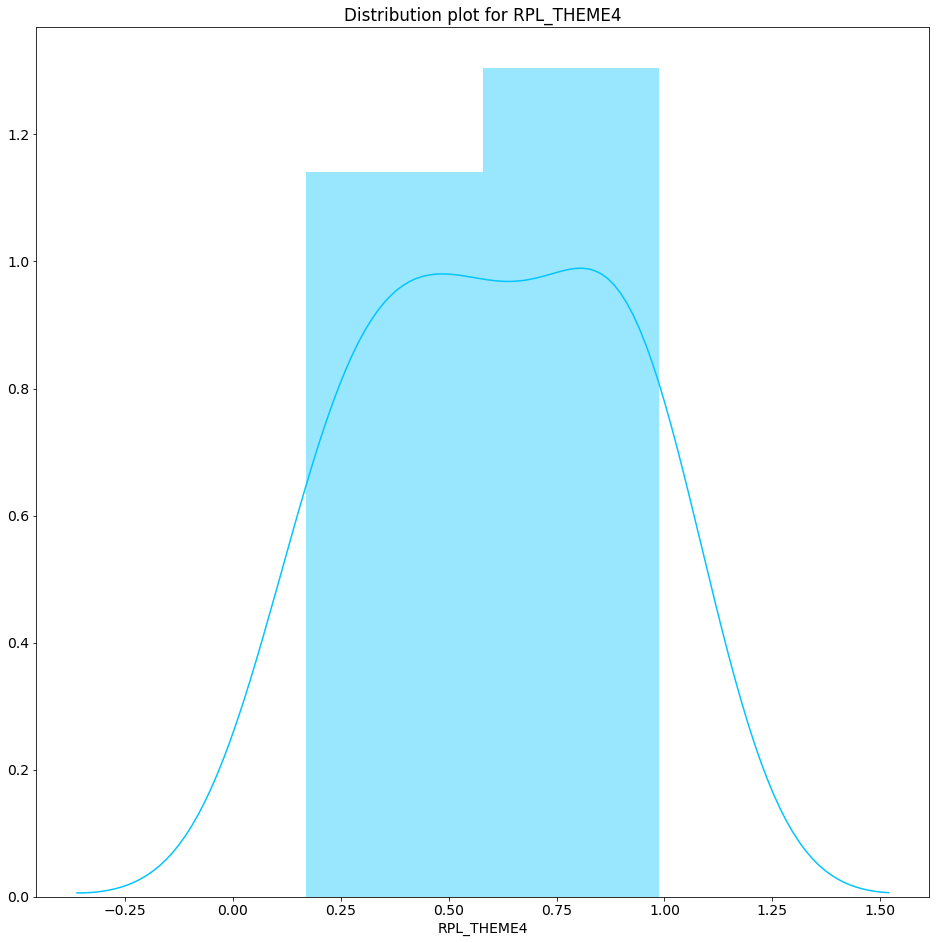

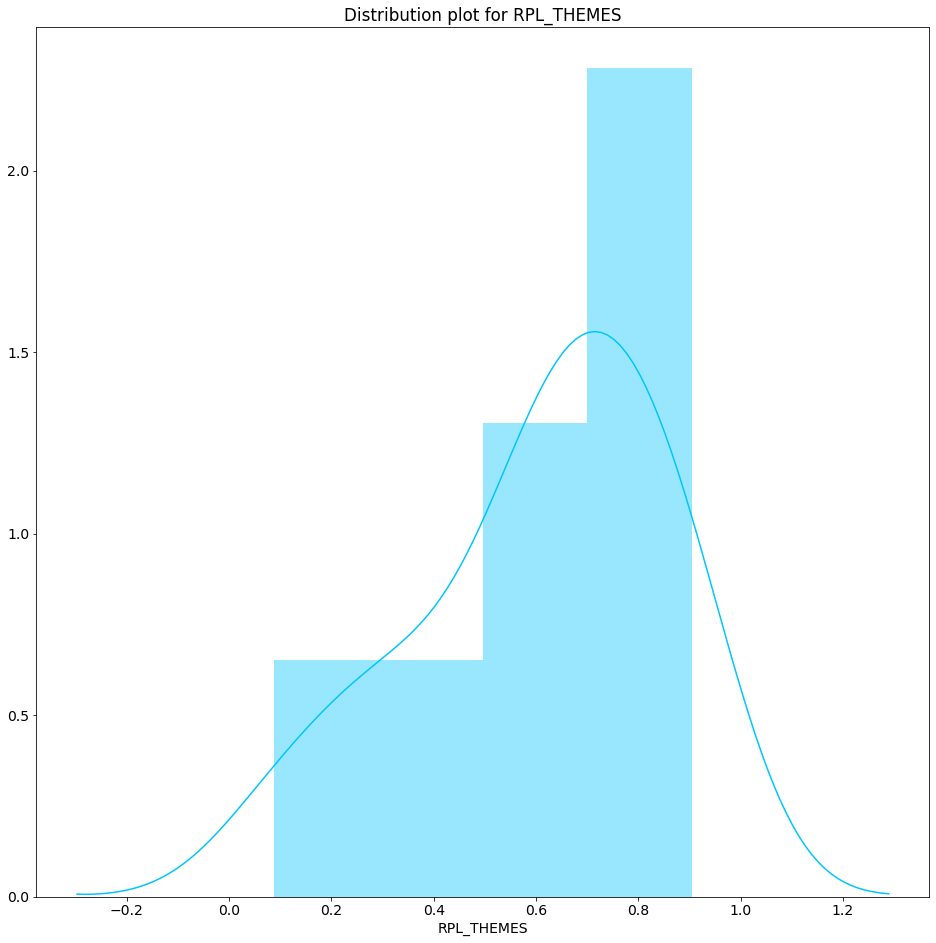

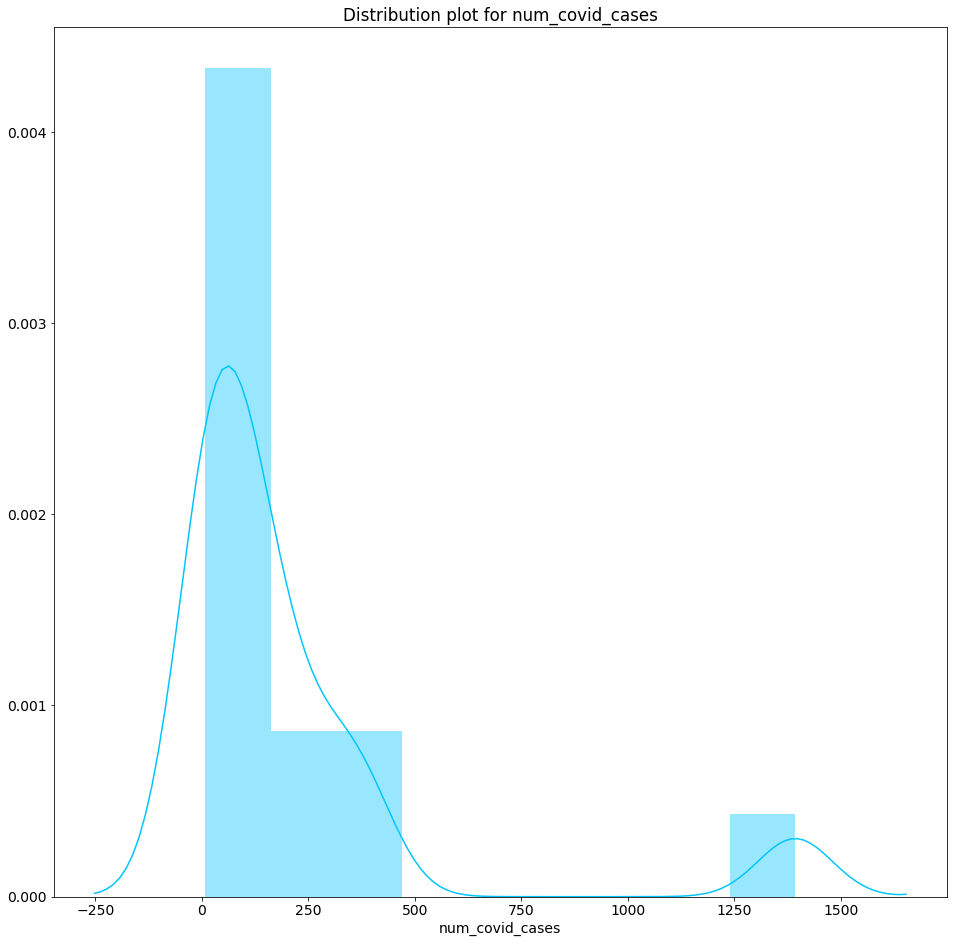

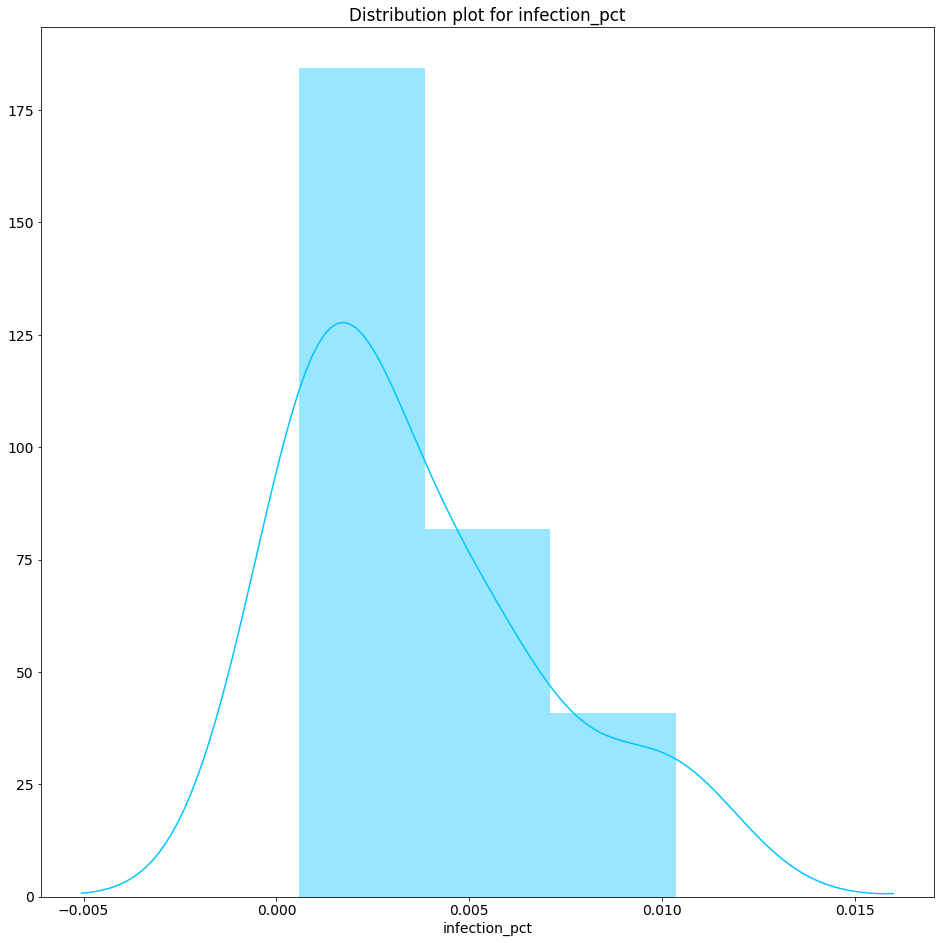

In [17]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_5)

### Distribution Plots for Region 6

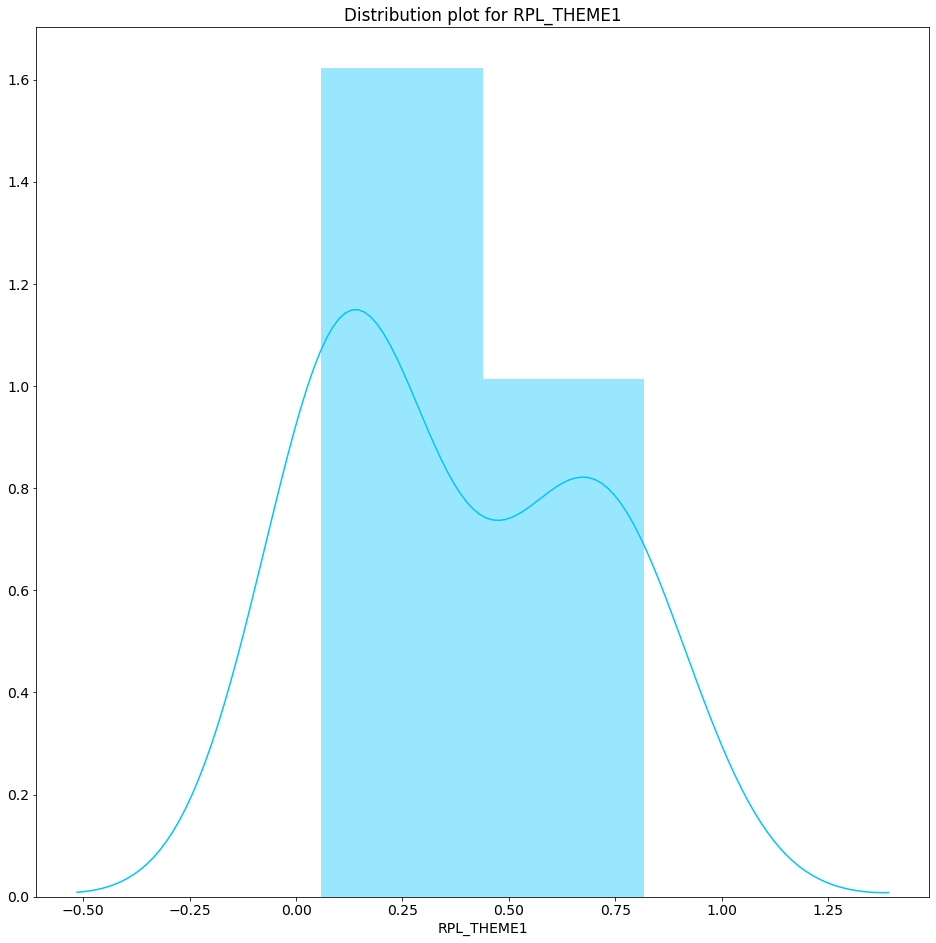

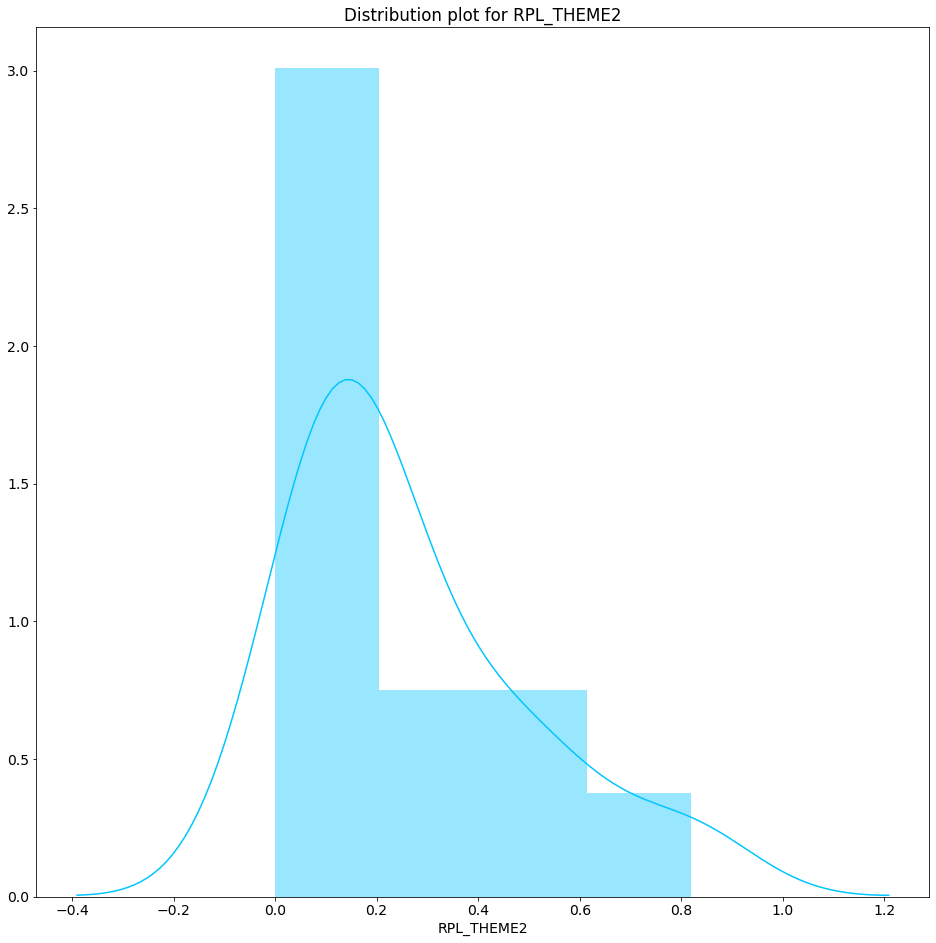

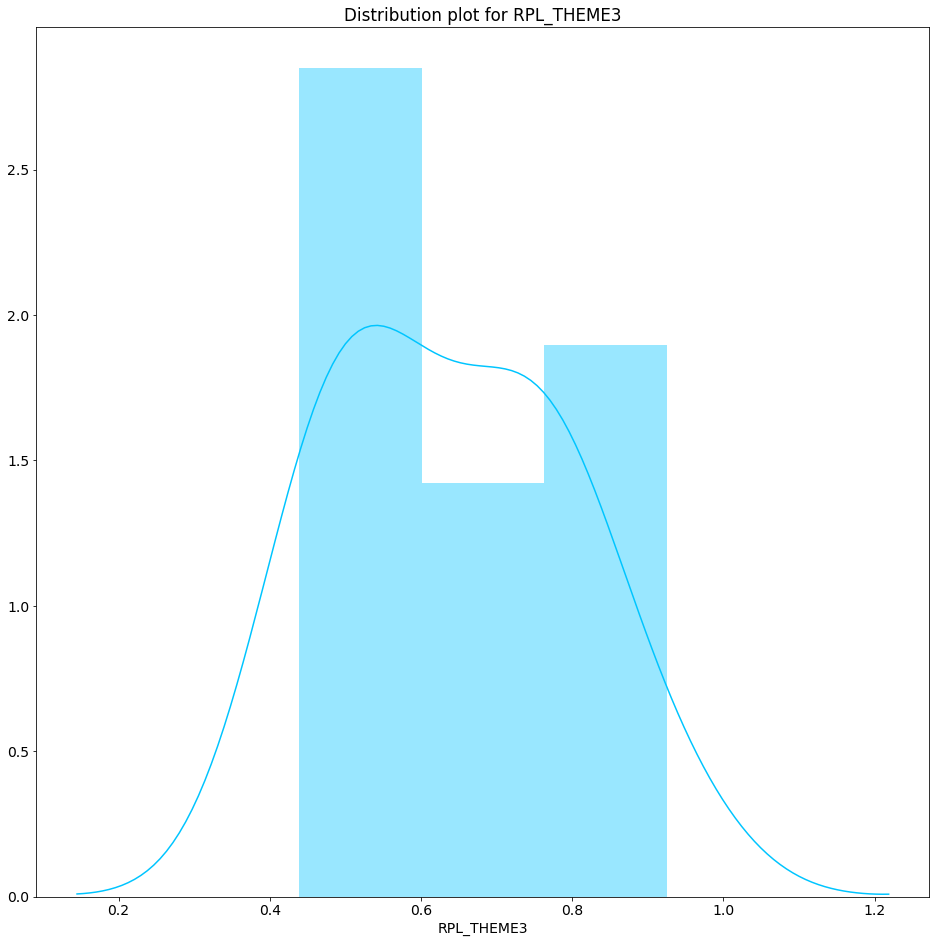

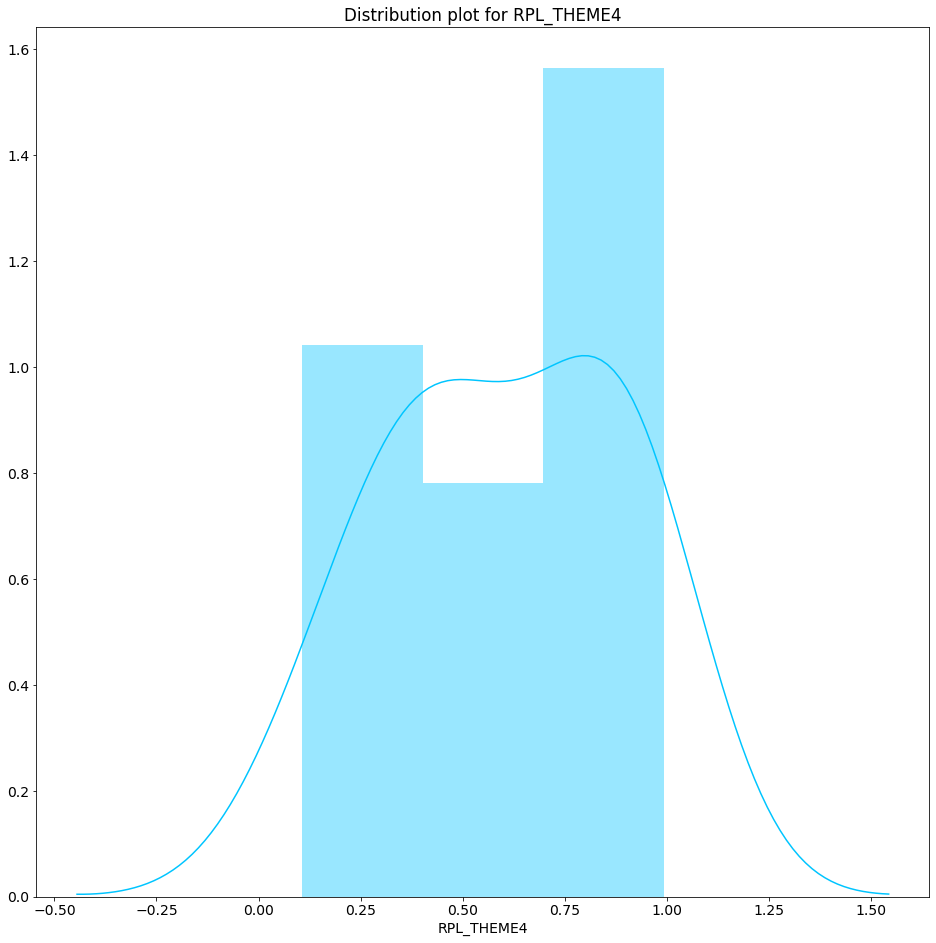

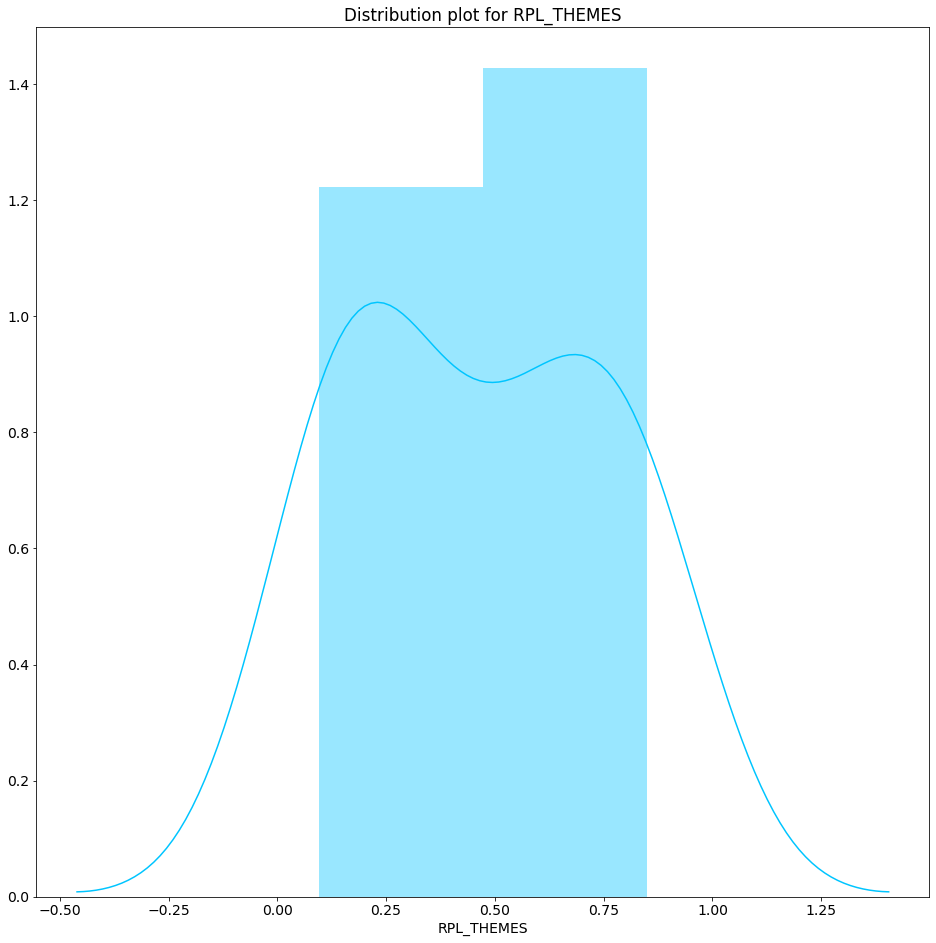

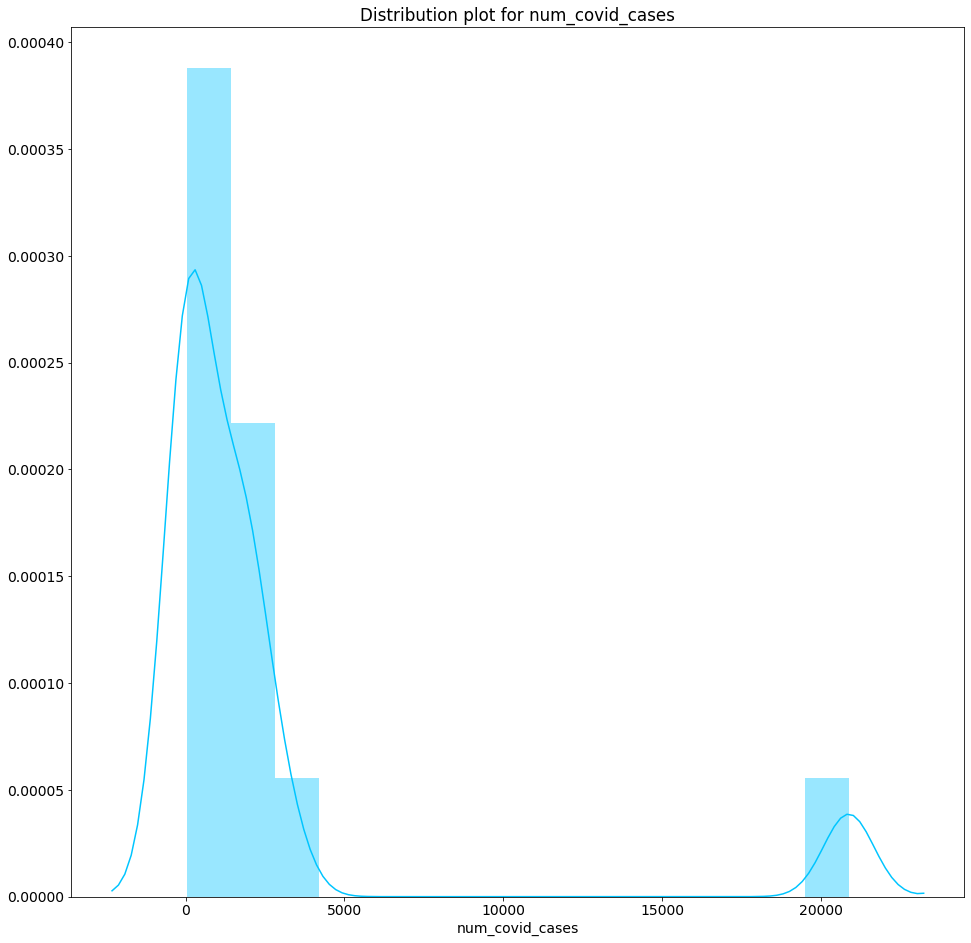

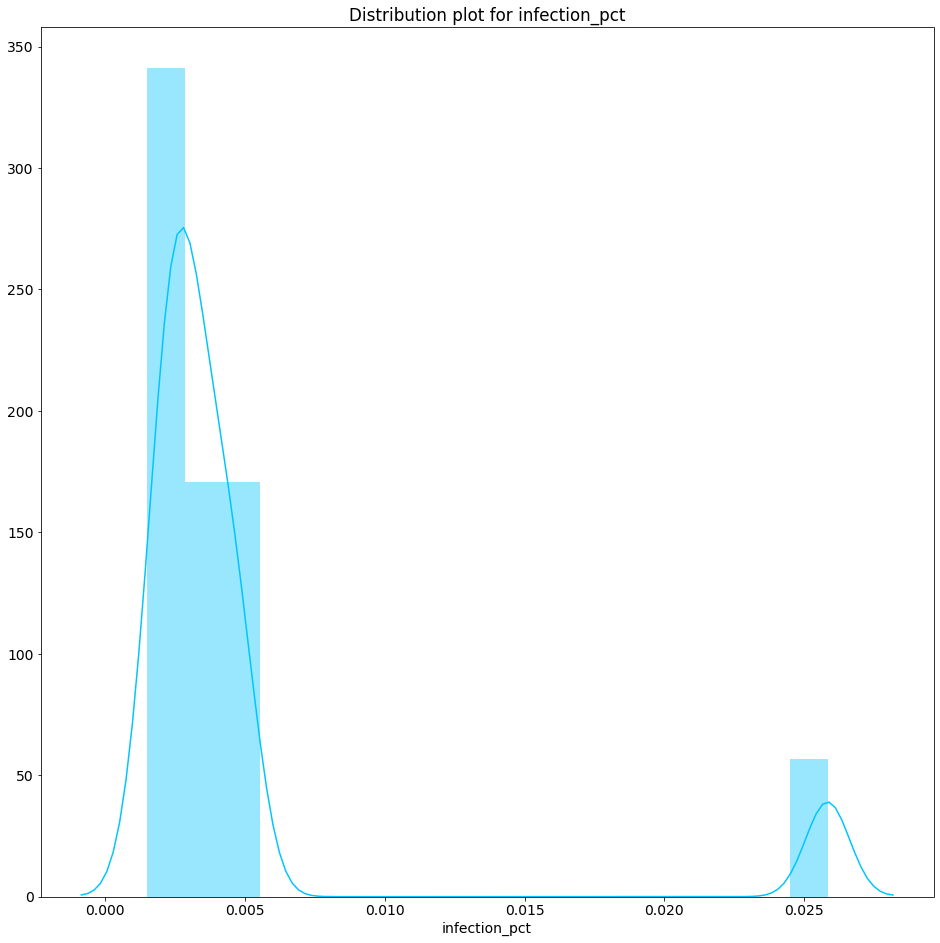

In [18]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_6)

### Distribution Plots for Region 7

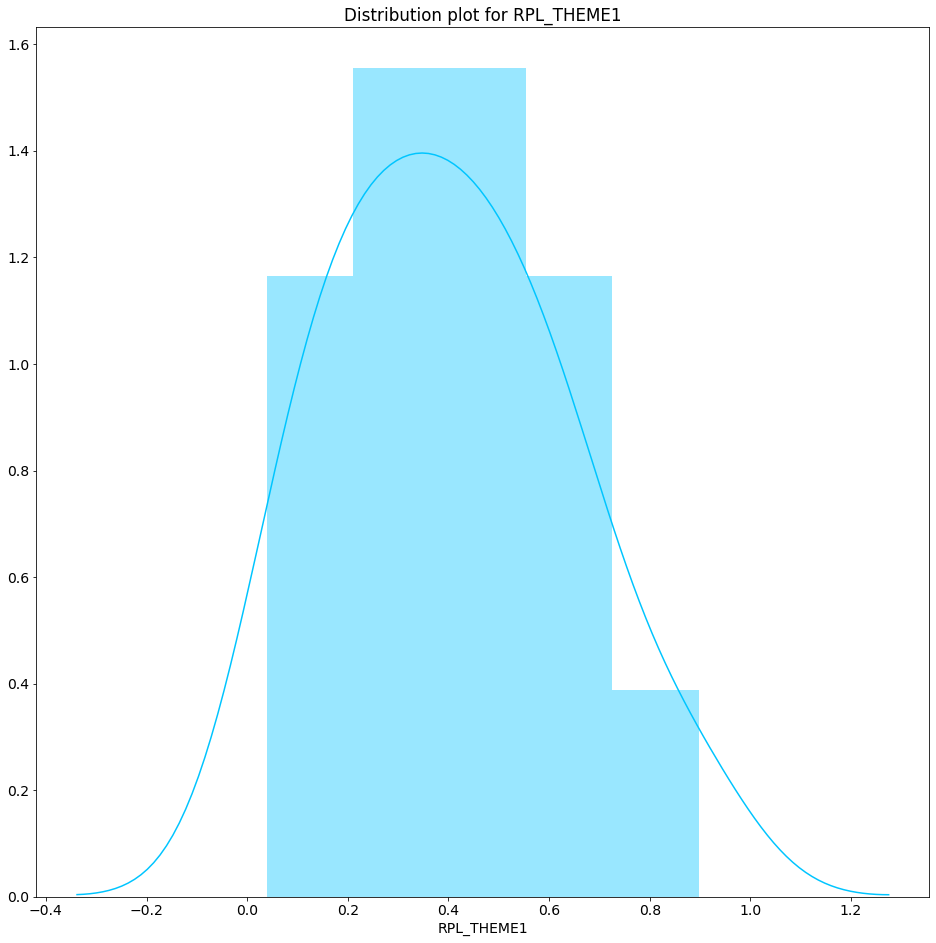

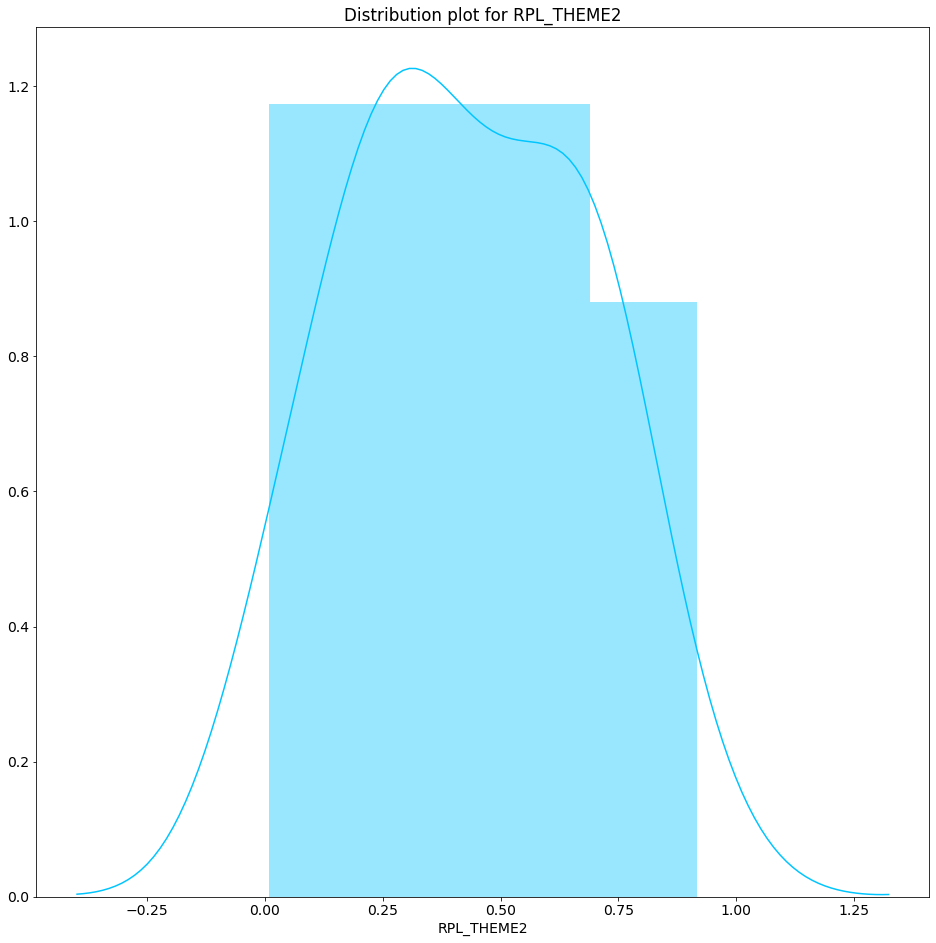

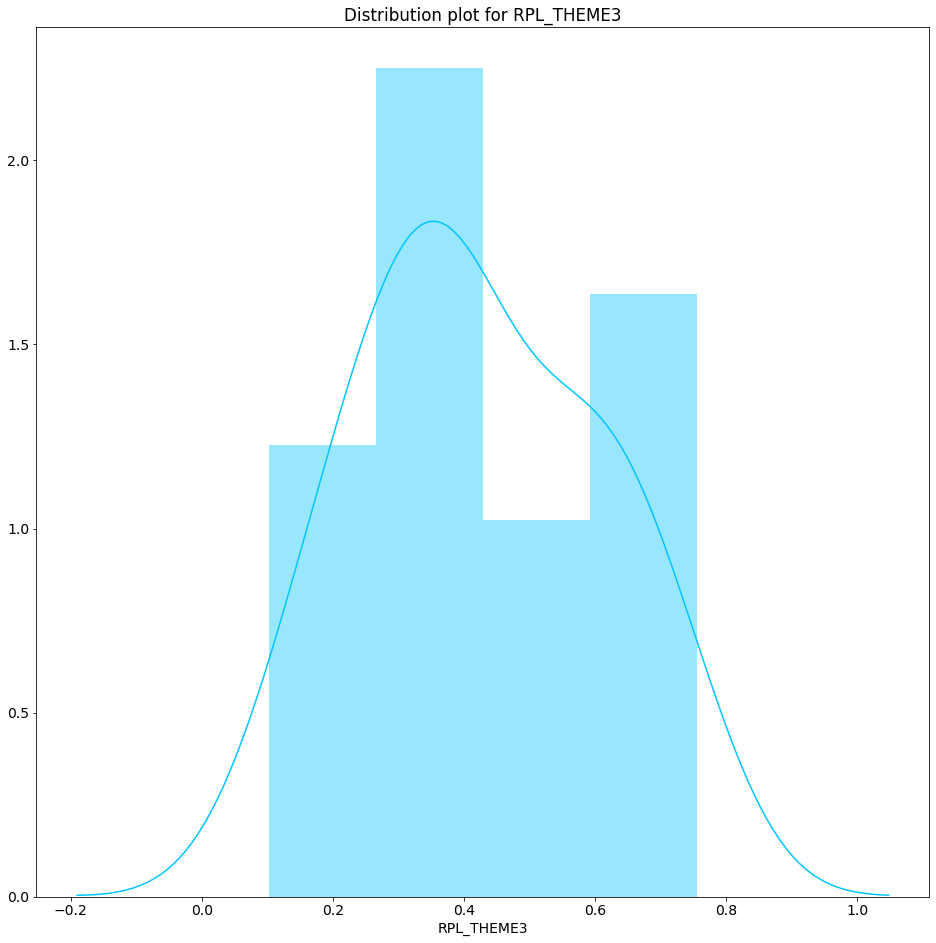

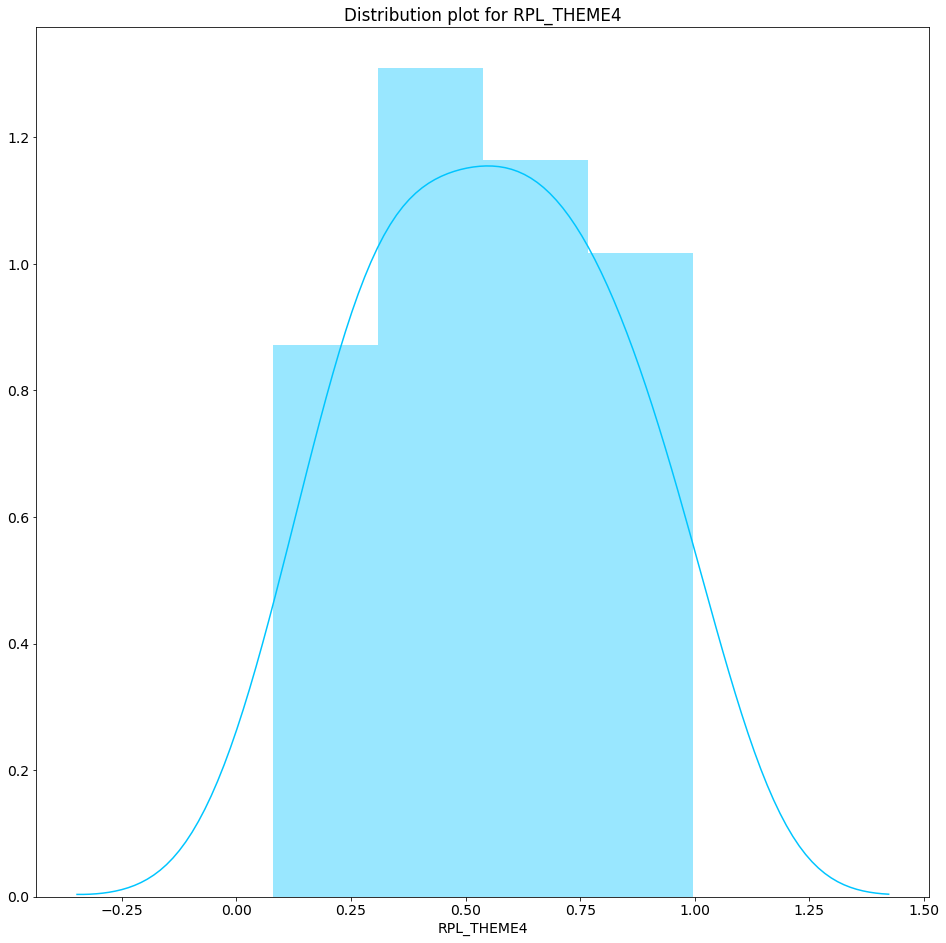

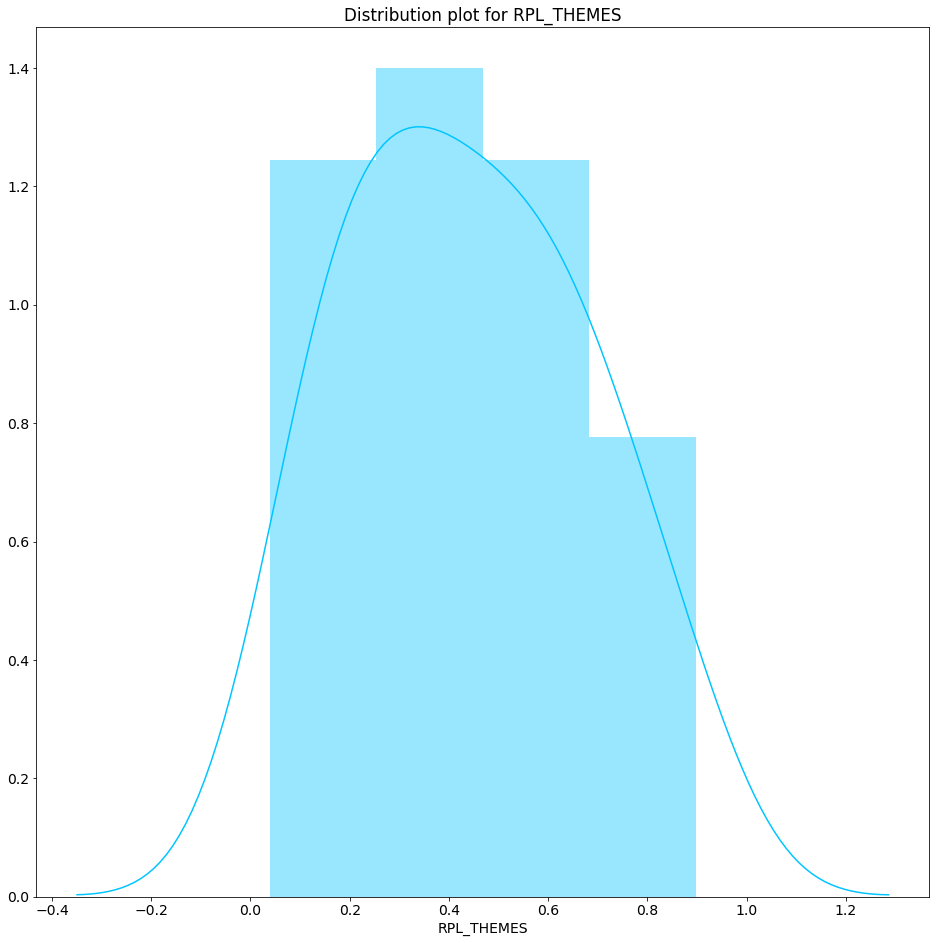

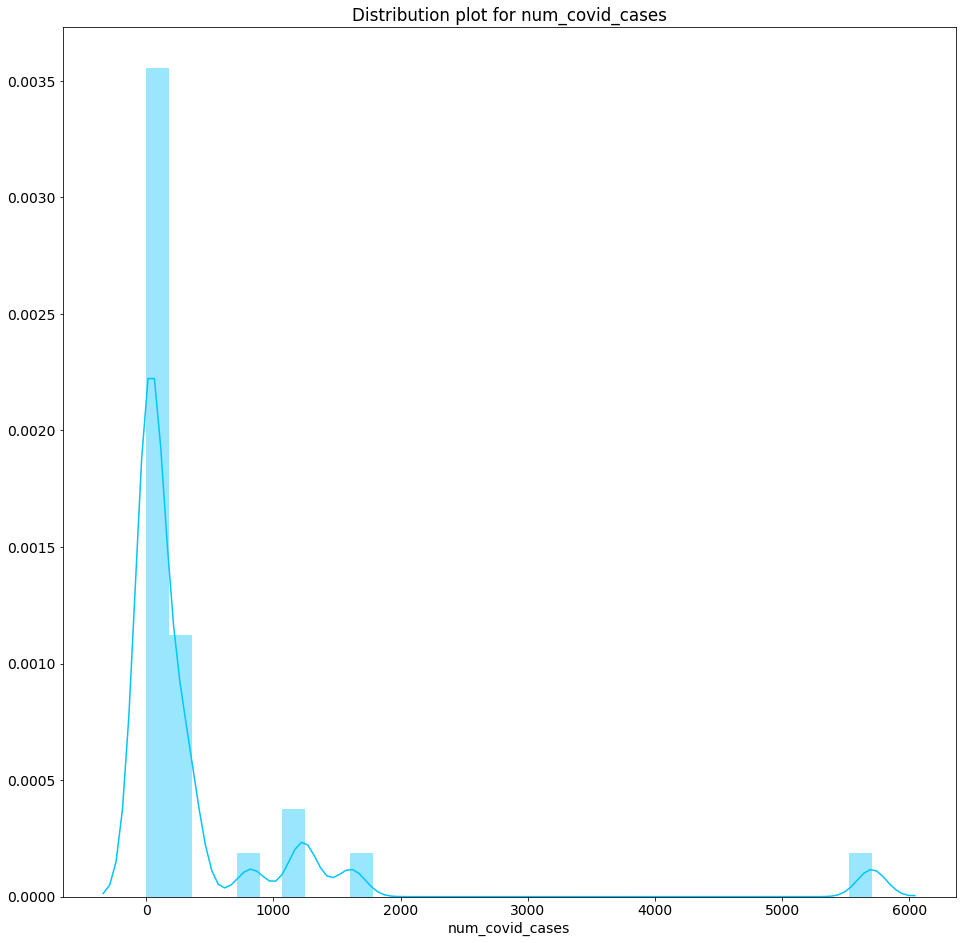

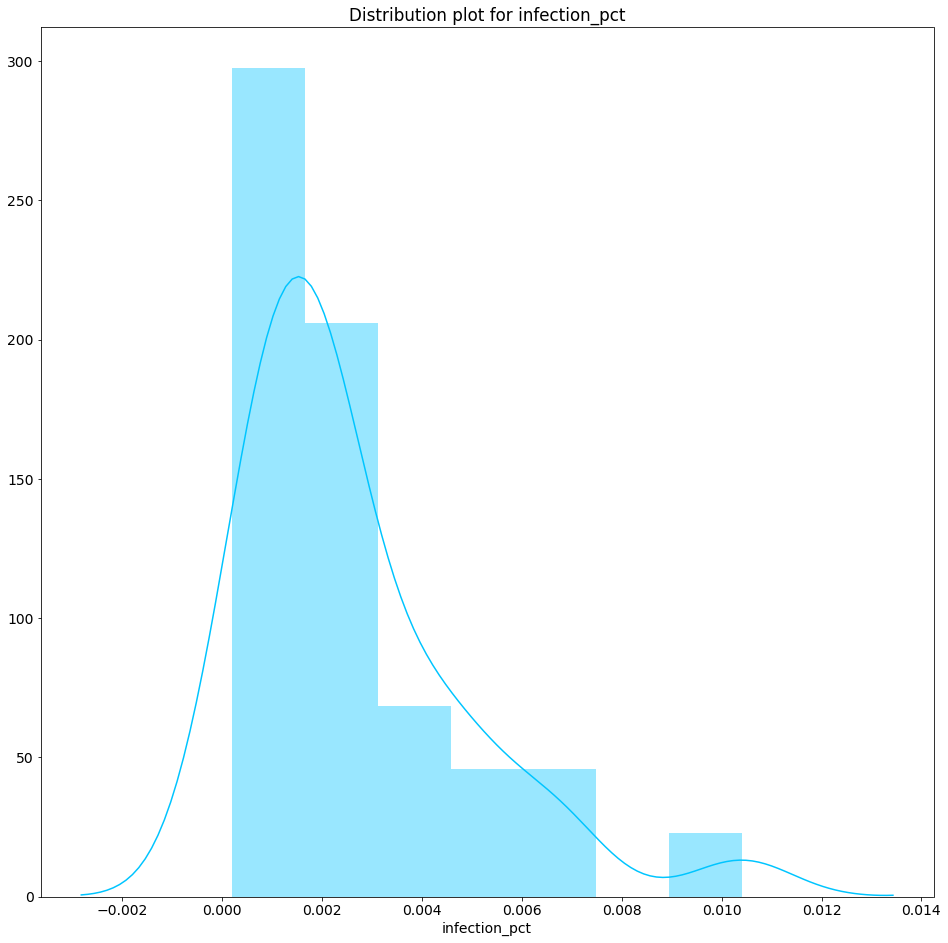

In [19]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_7)

### Distribution Plots for Region 8

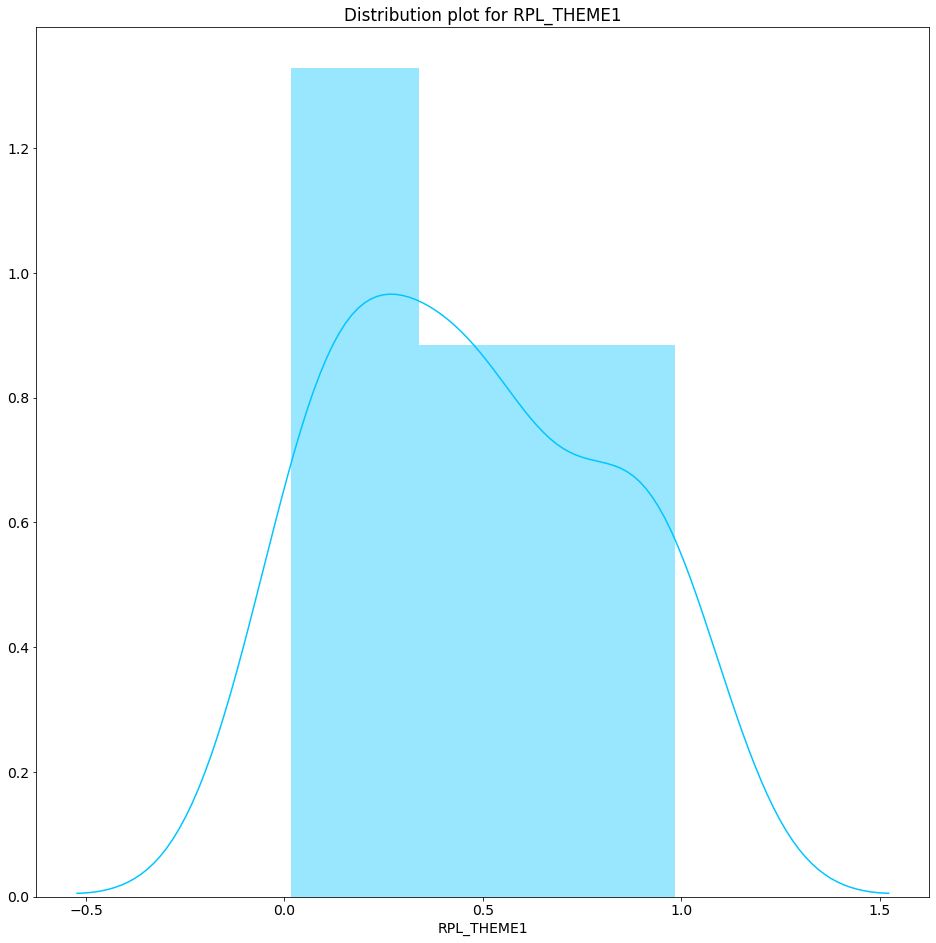

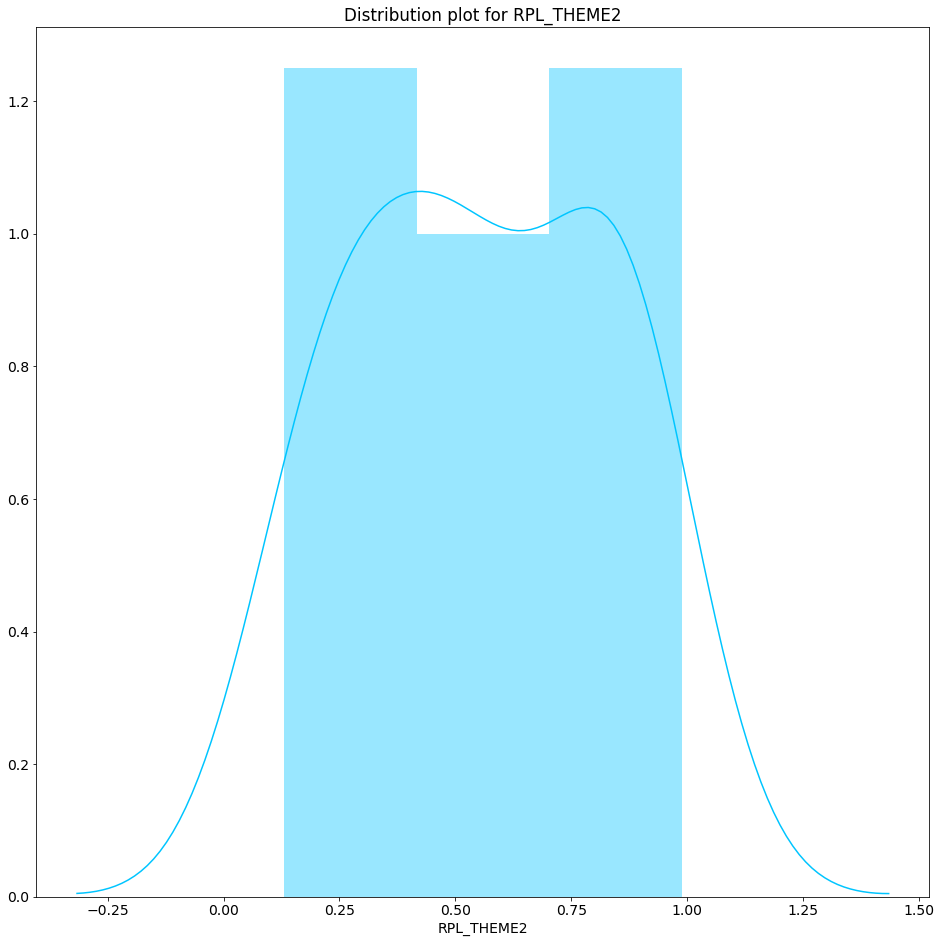

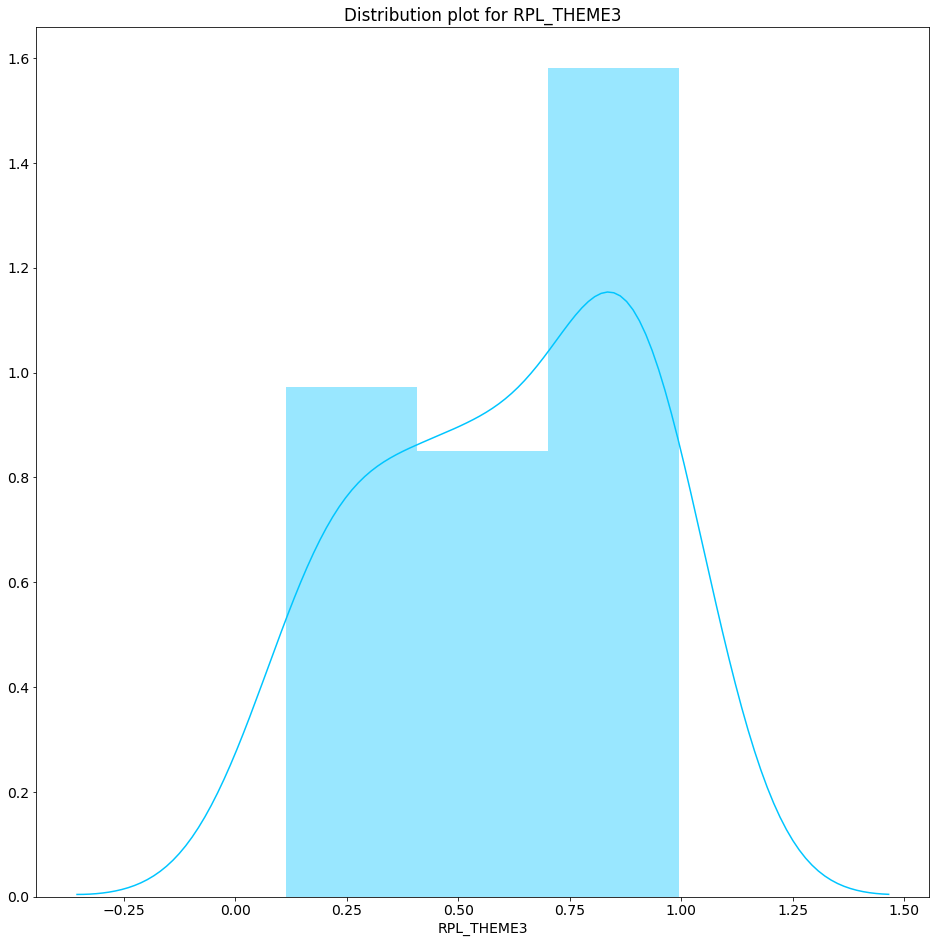

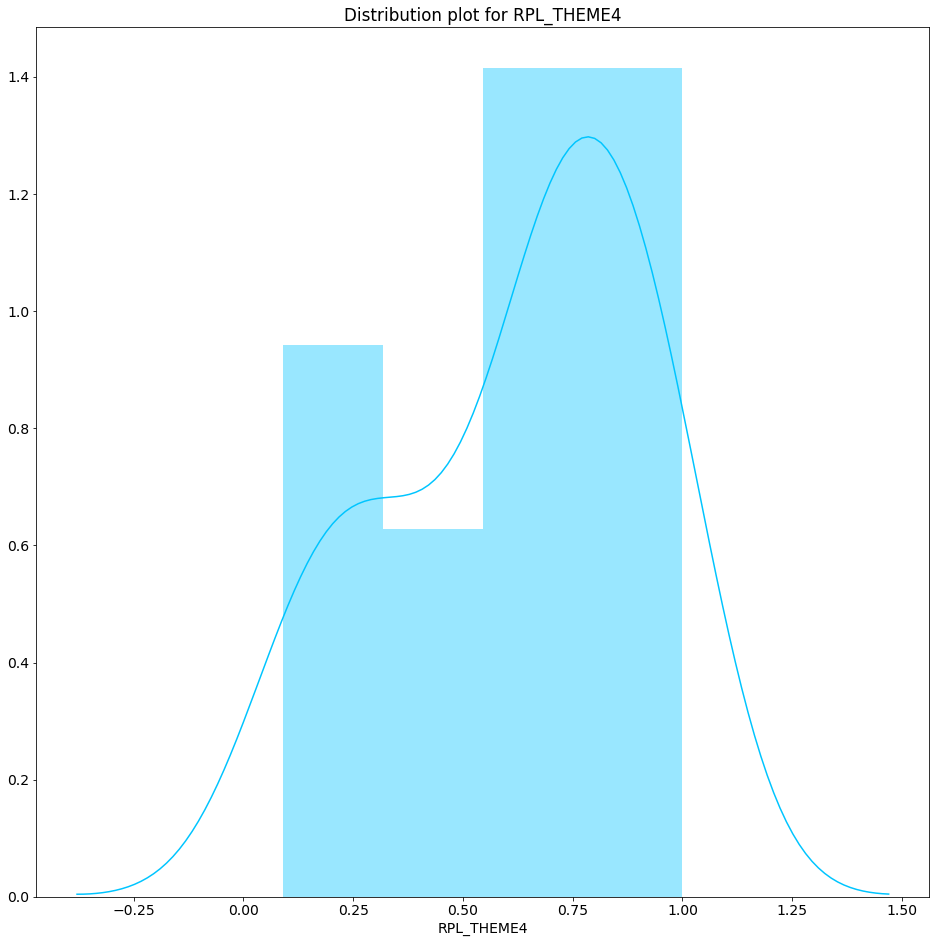

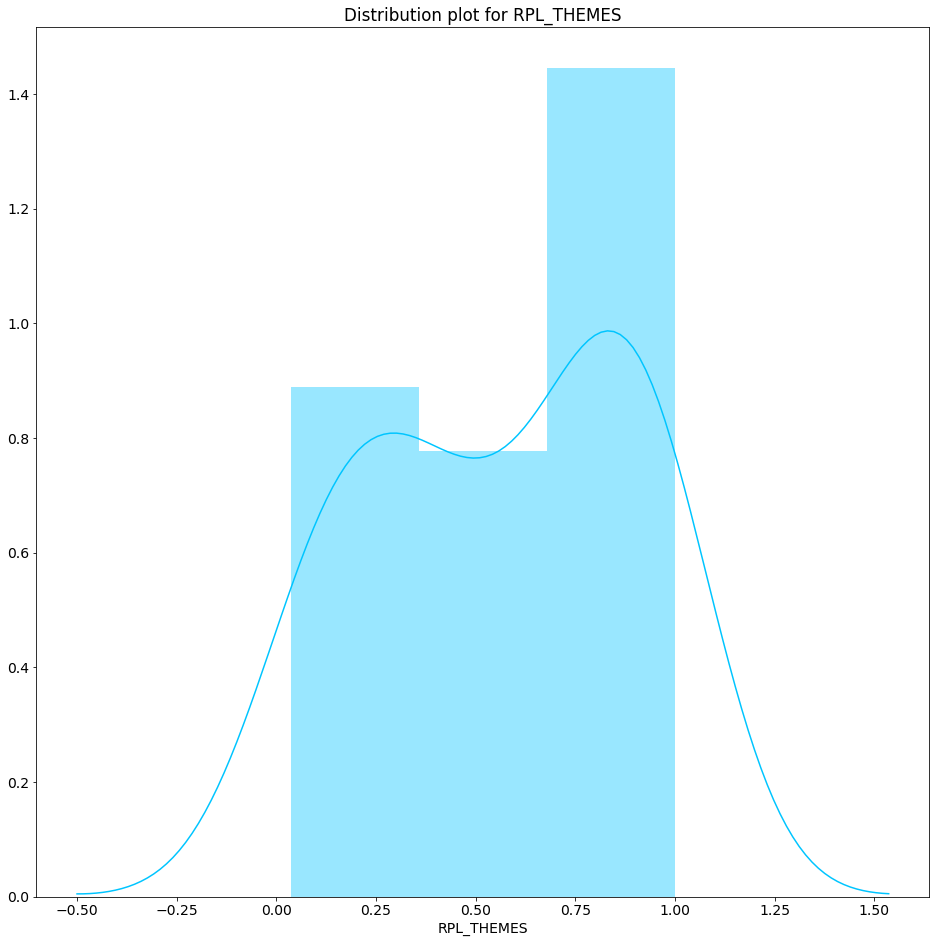

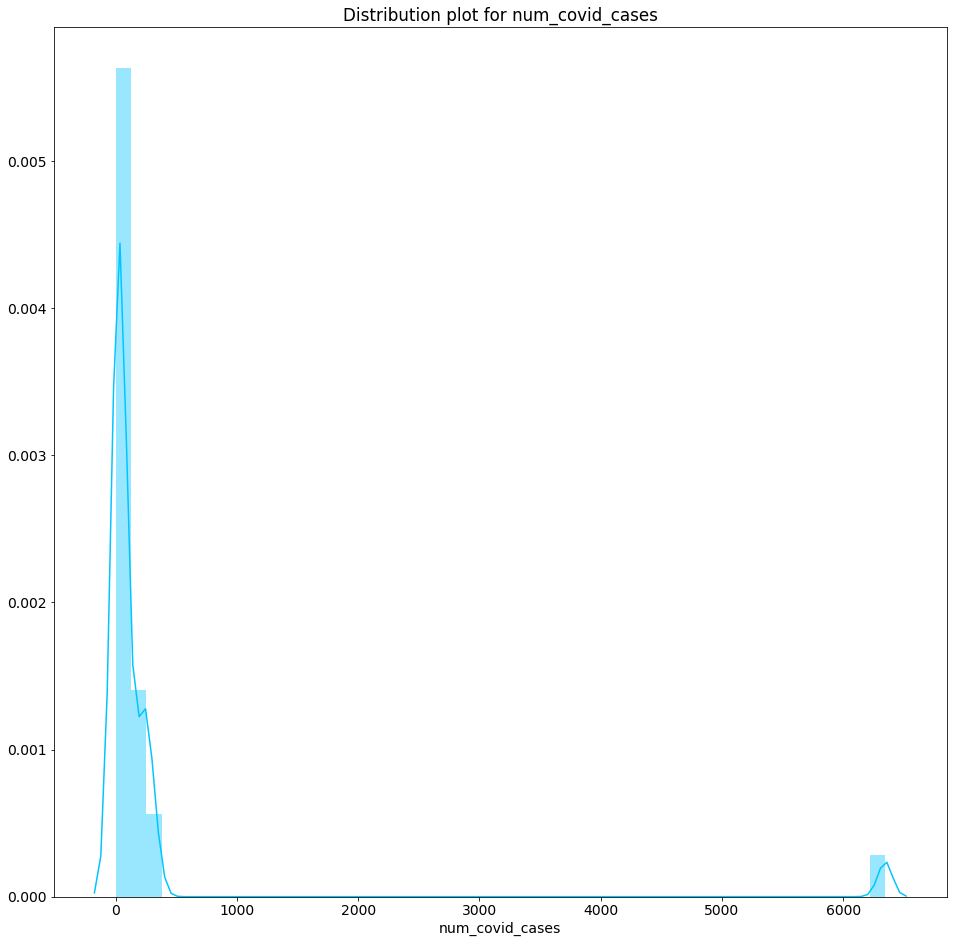

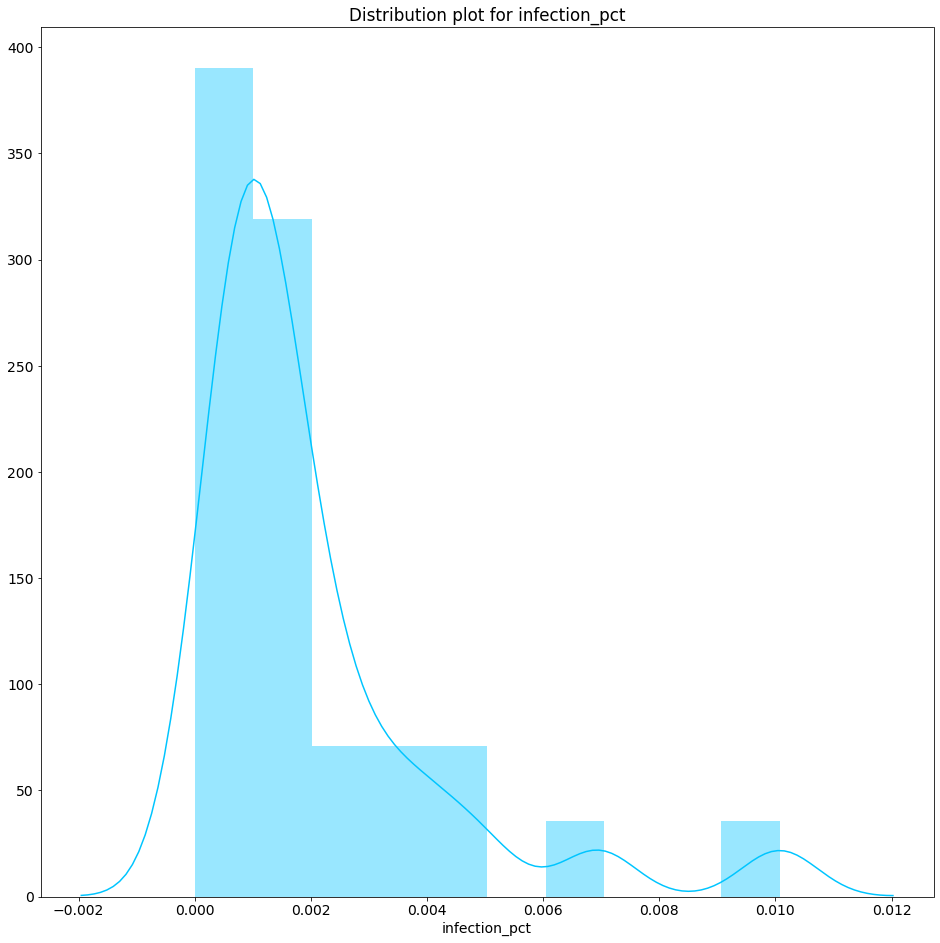

In [20]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_8)

### Distribution Plots for Region 9

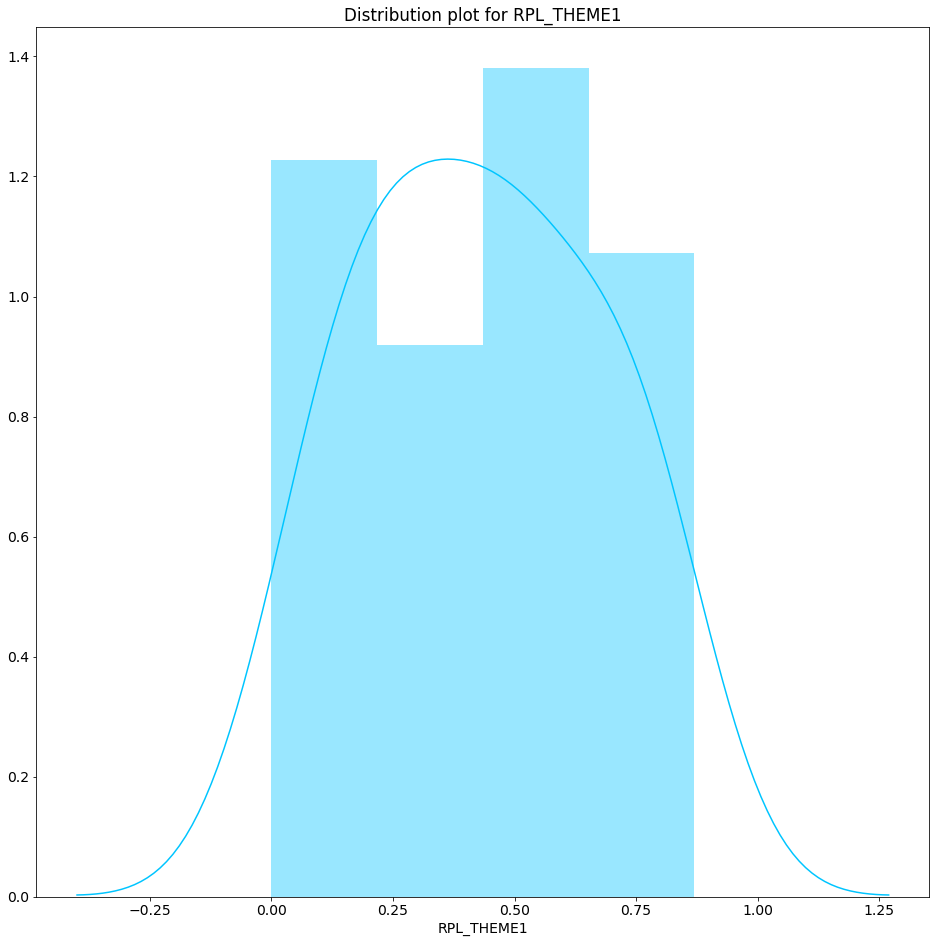

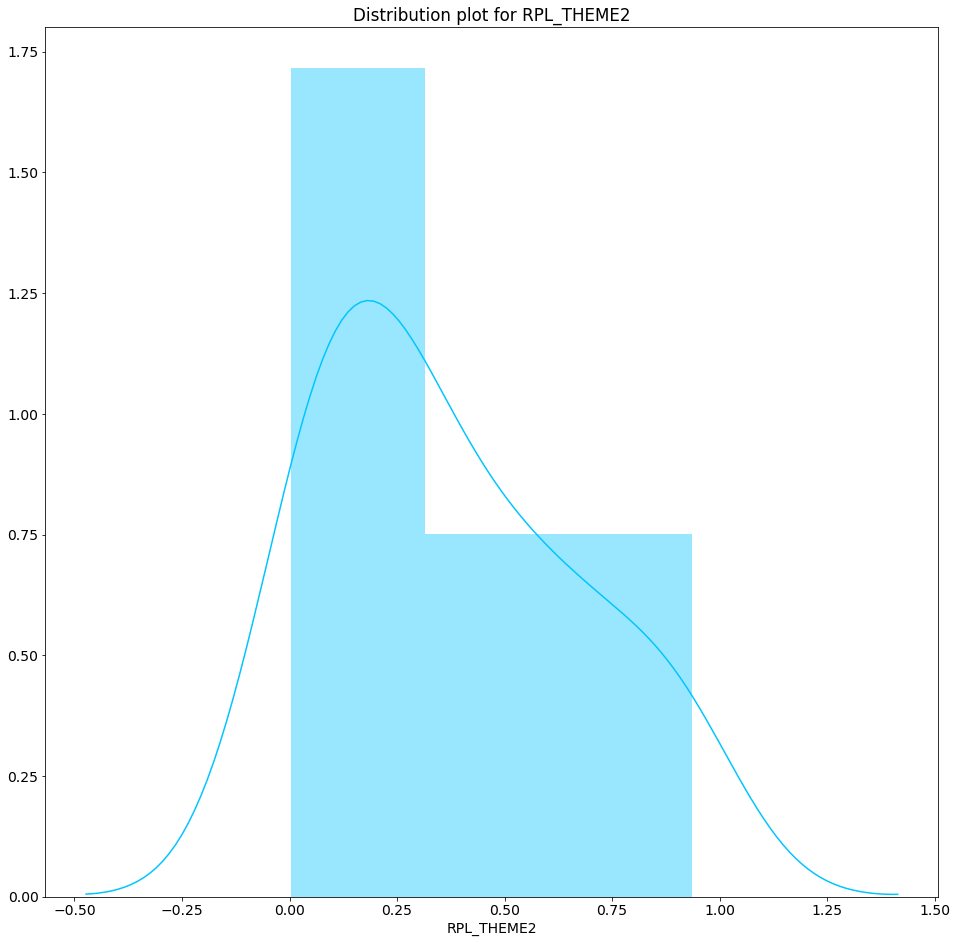

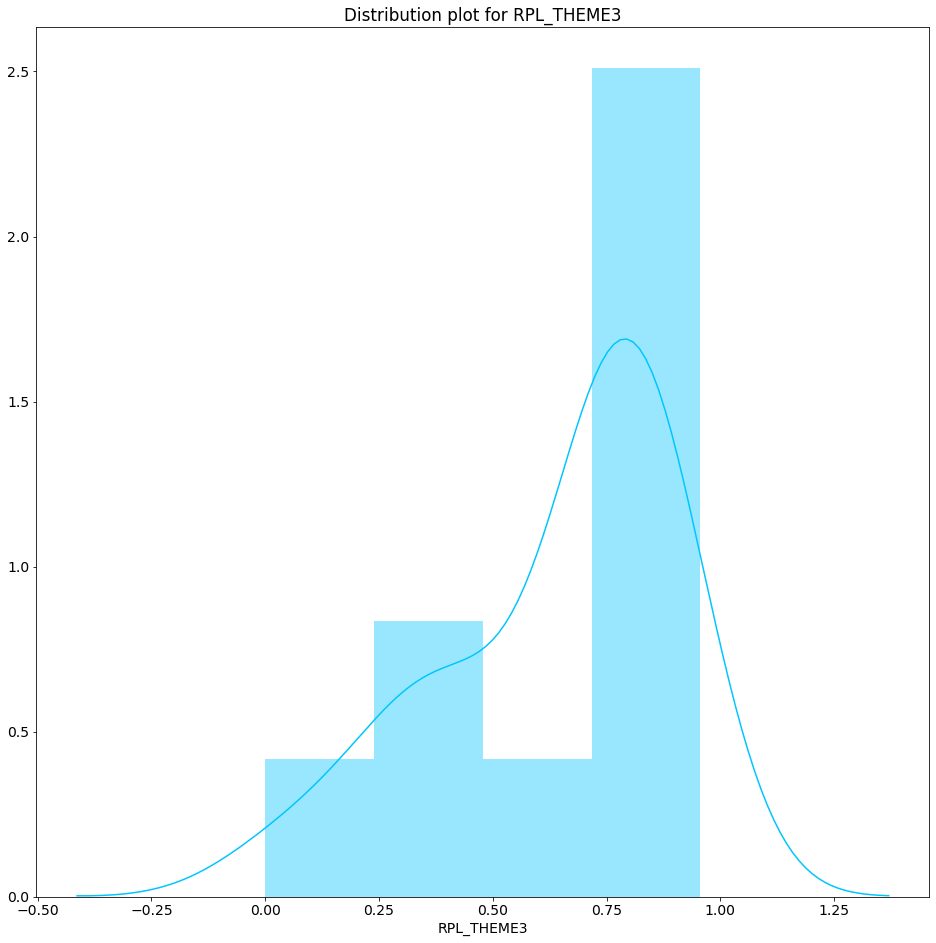

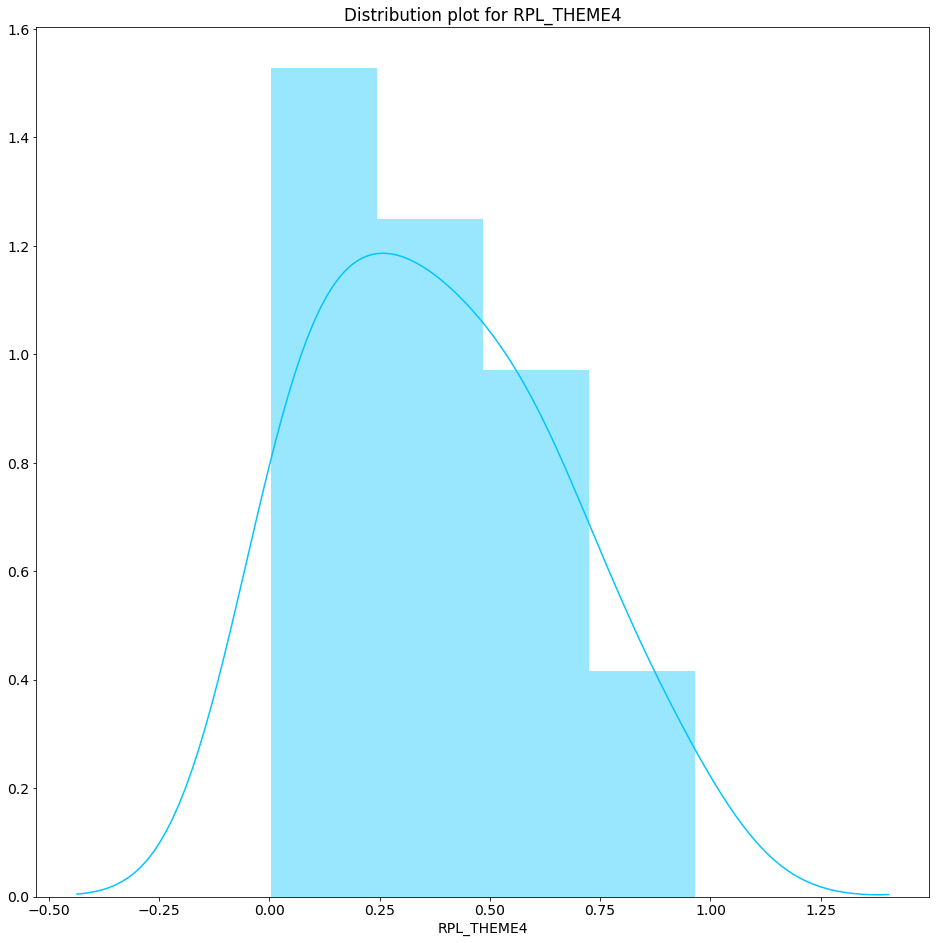

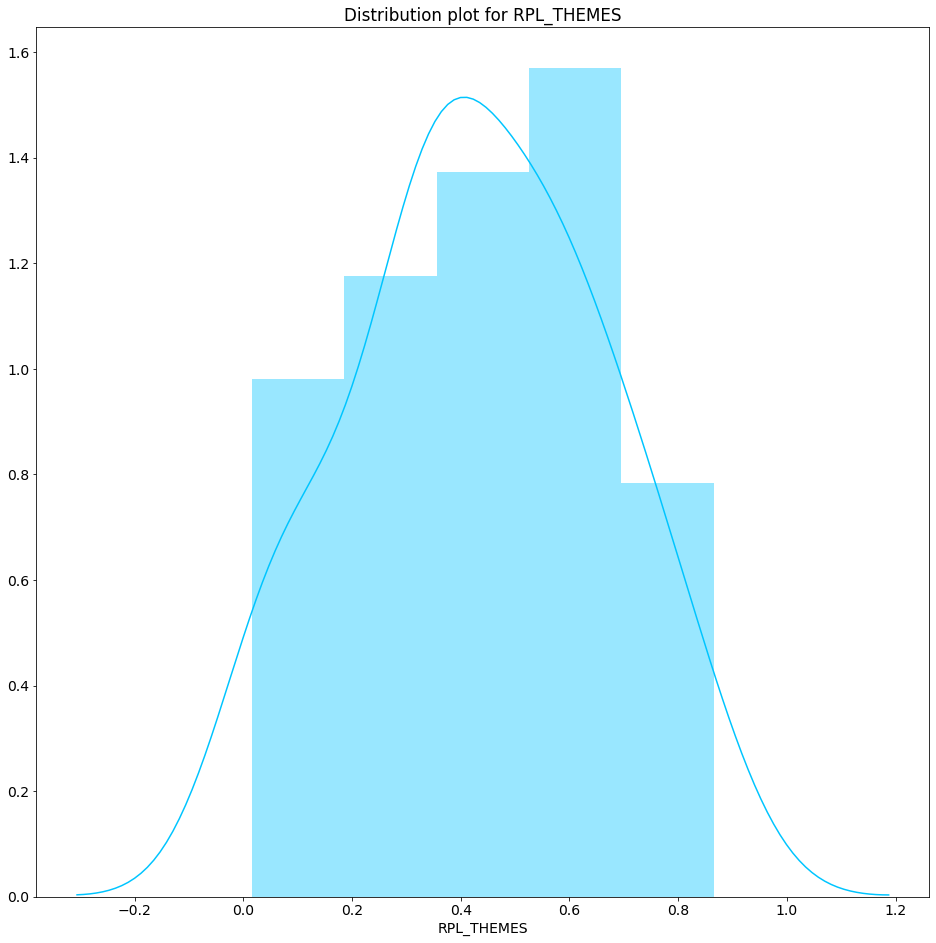

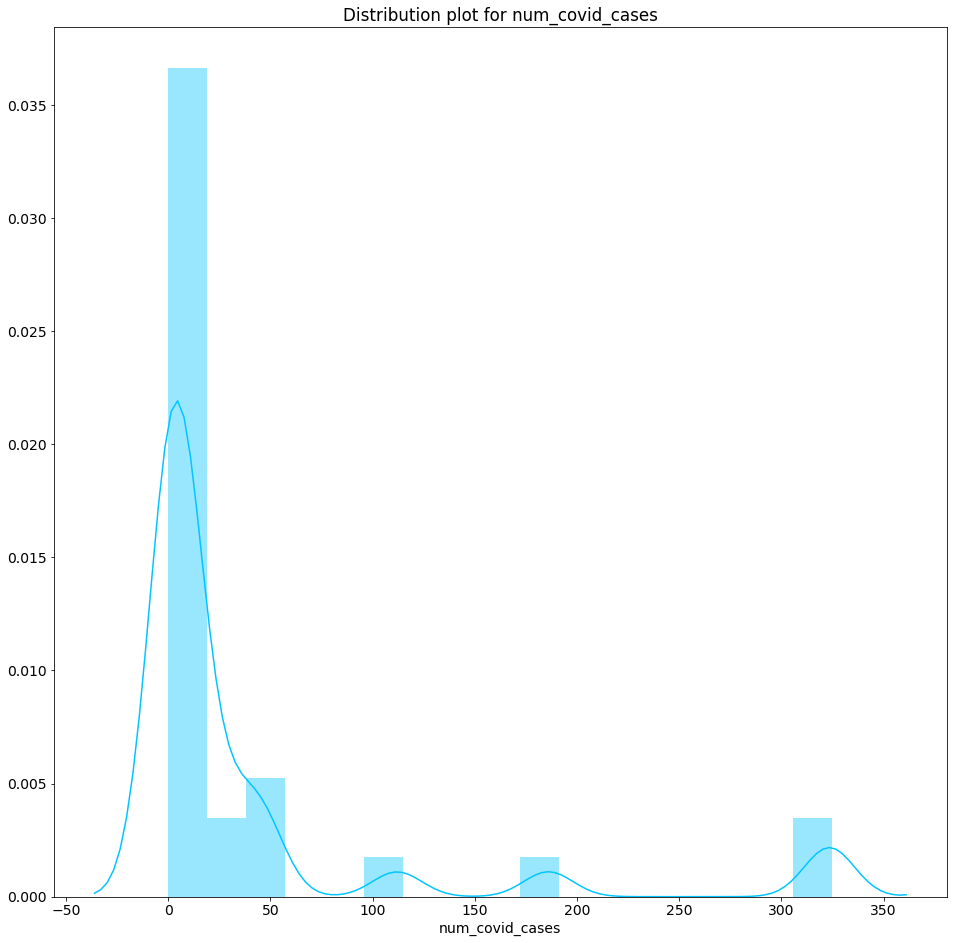

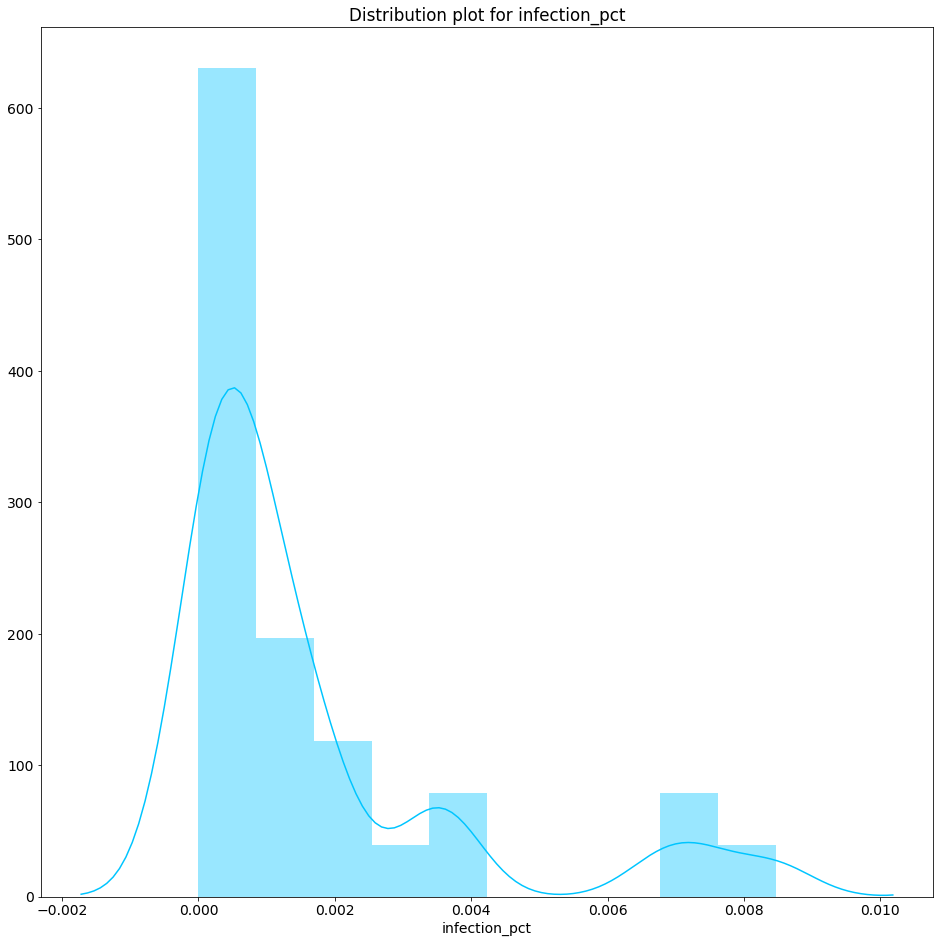

In [21]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_9)

### Distribution Plots for Region 10

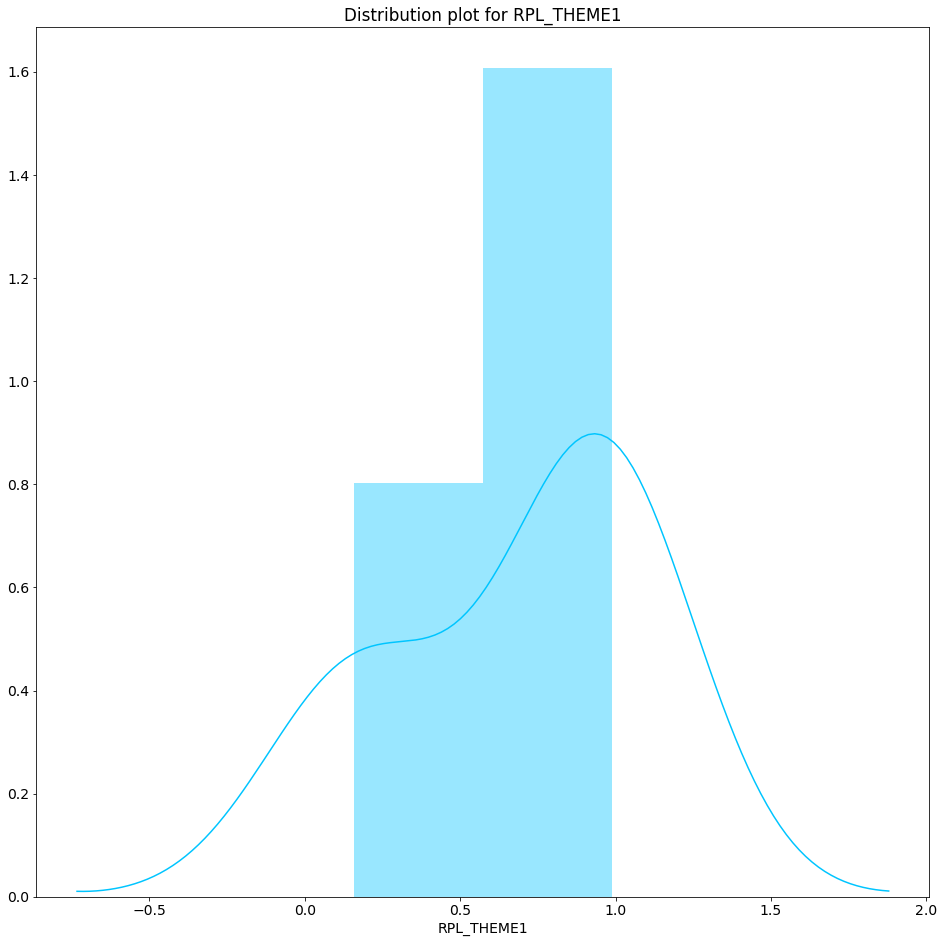

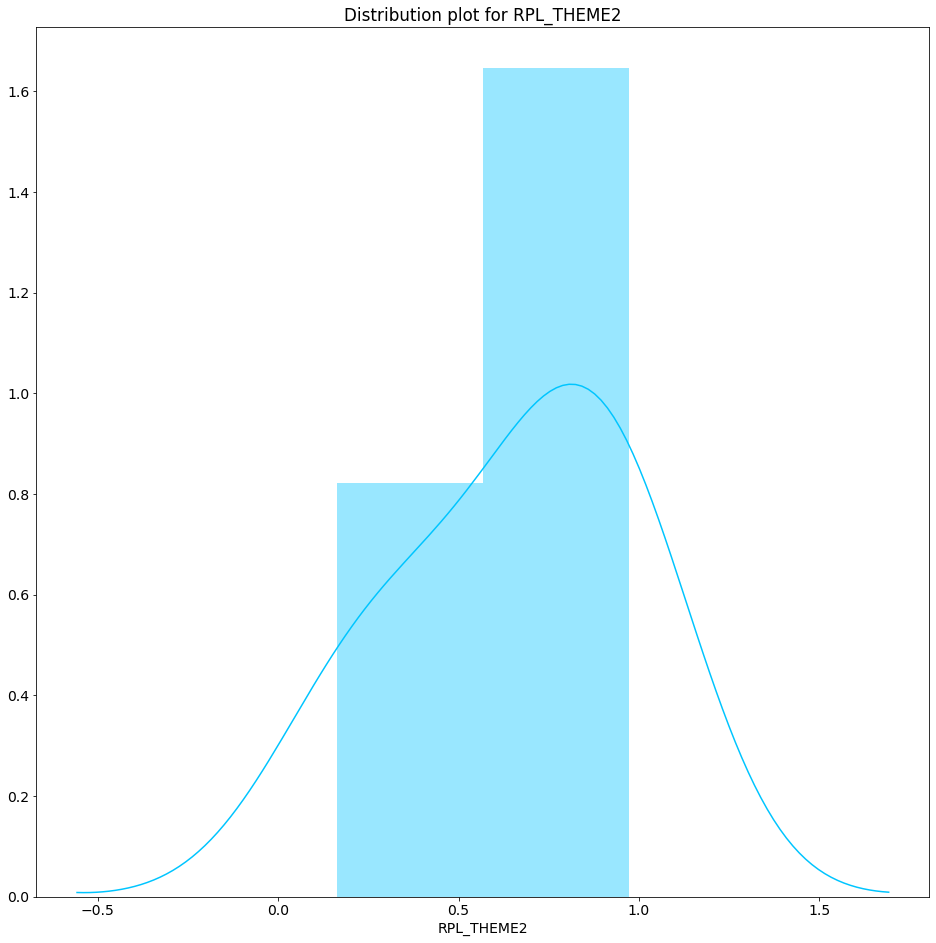

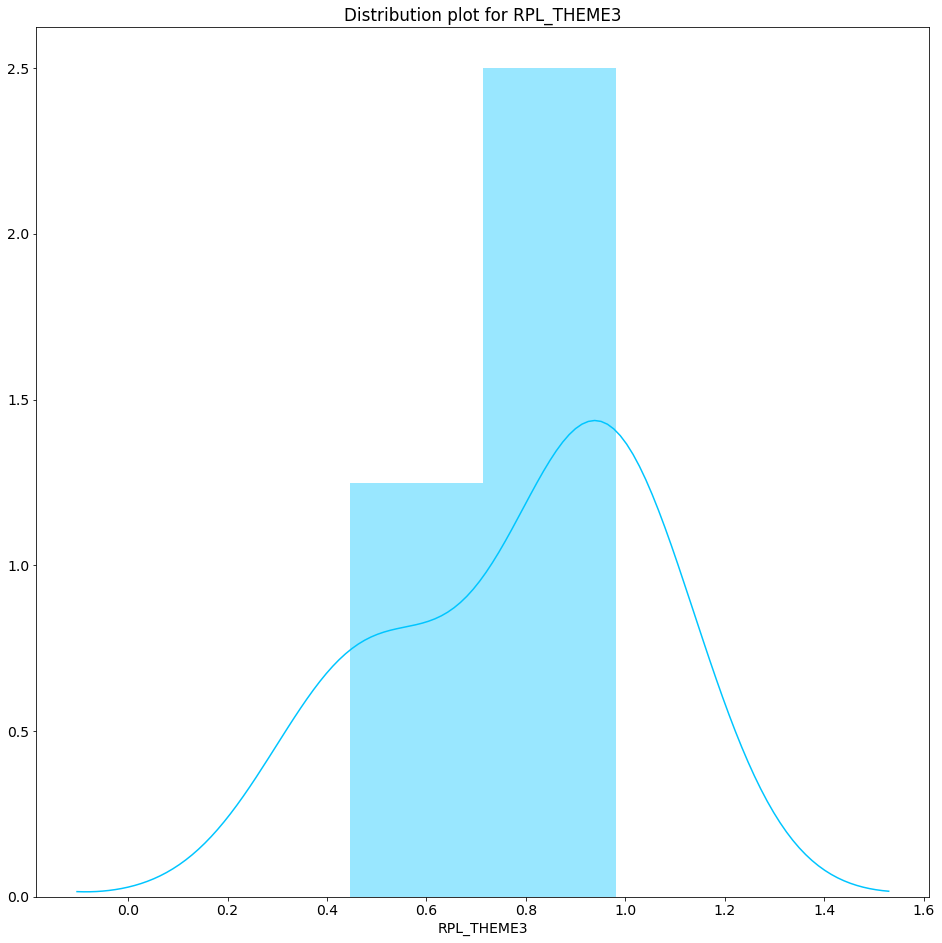

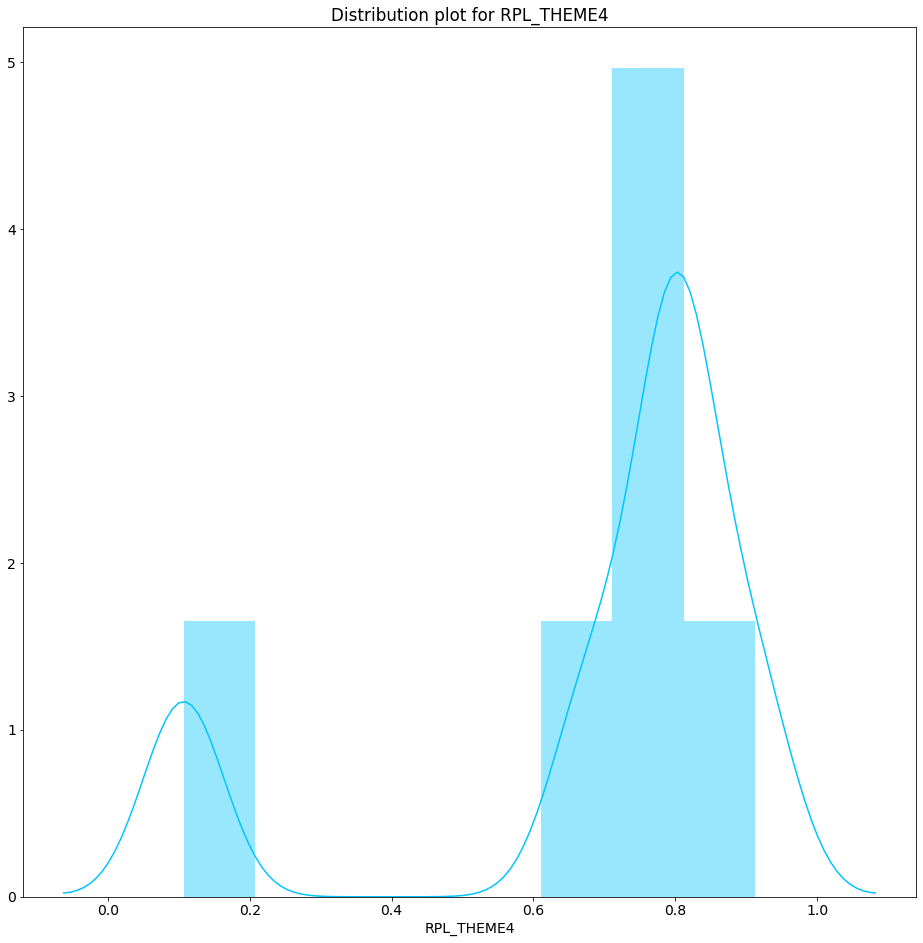

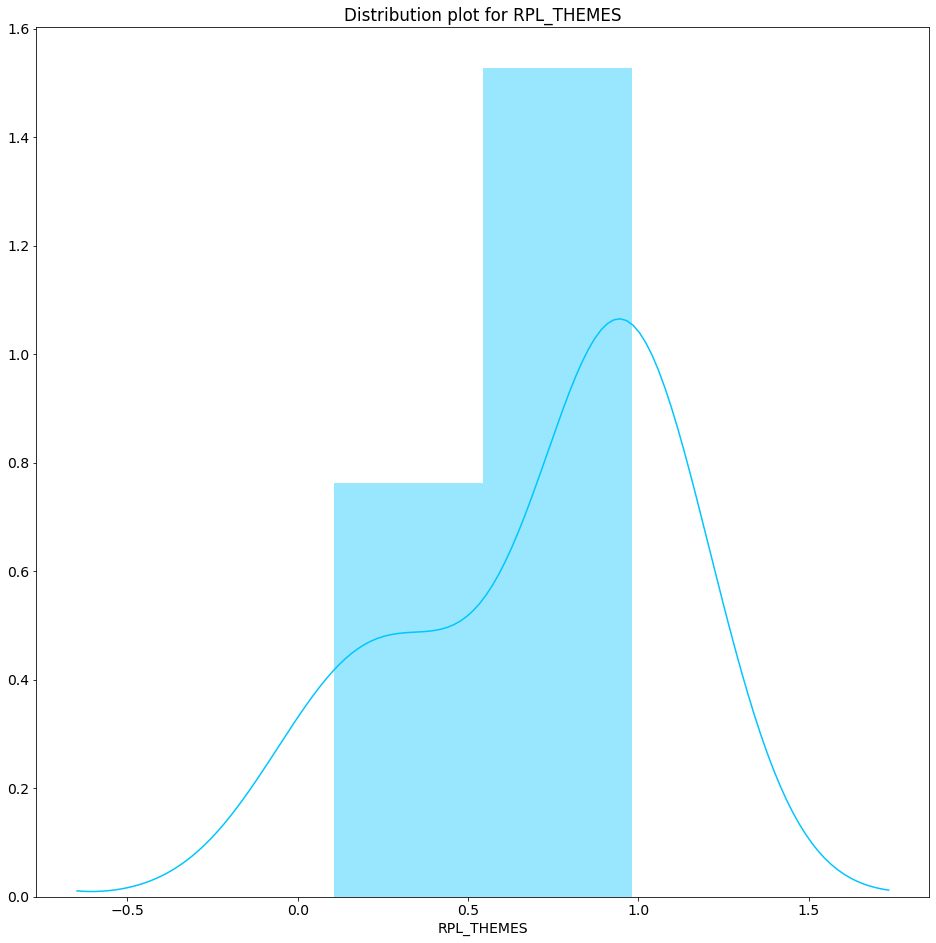

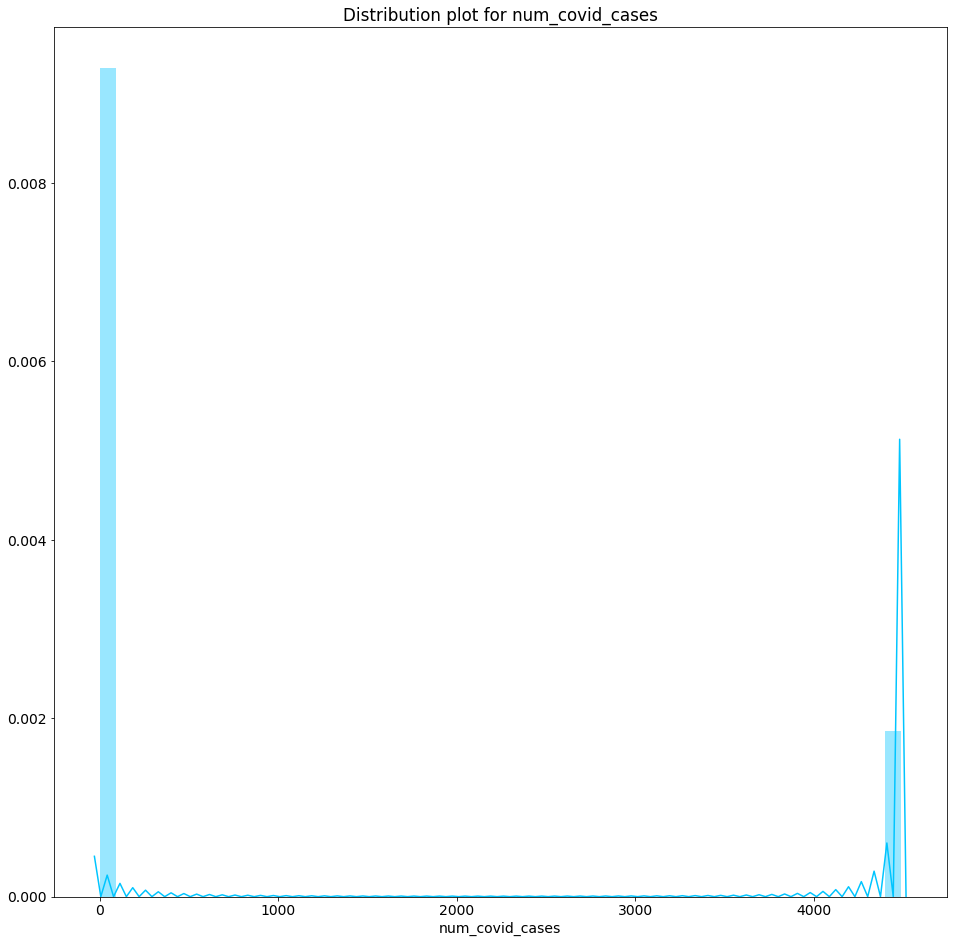

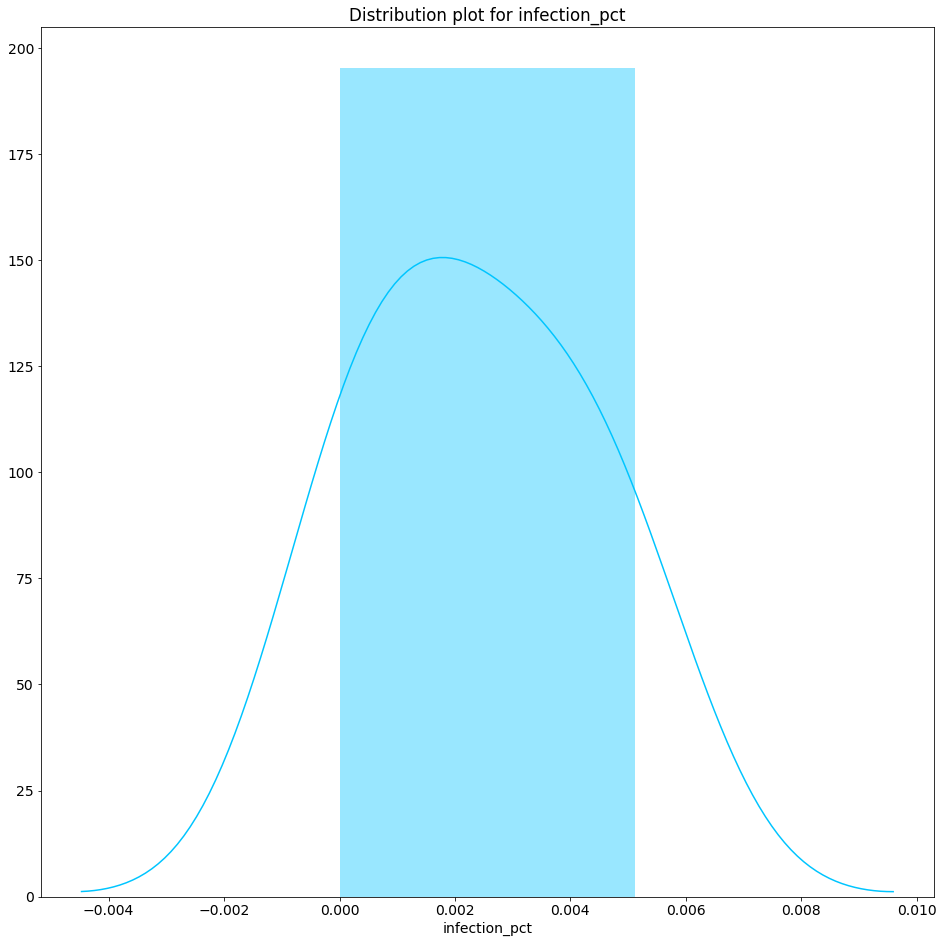

In [22]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_10)

### Distribution Plots for Region 11

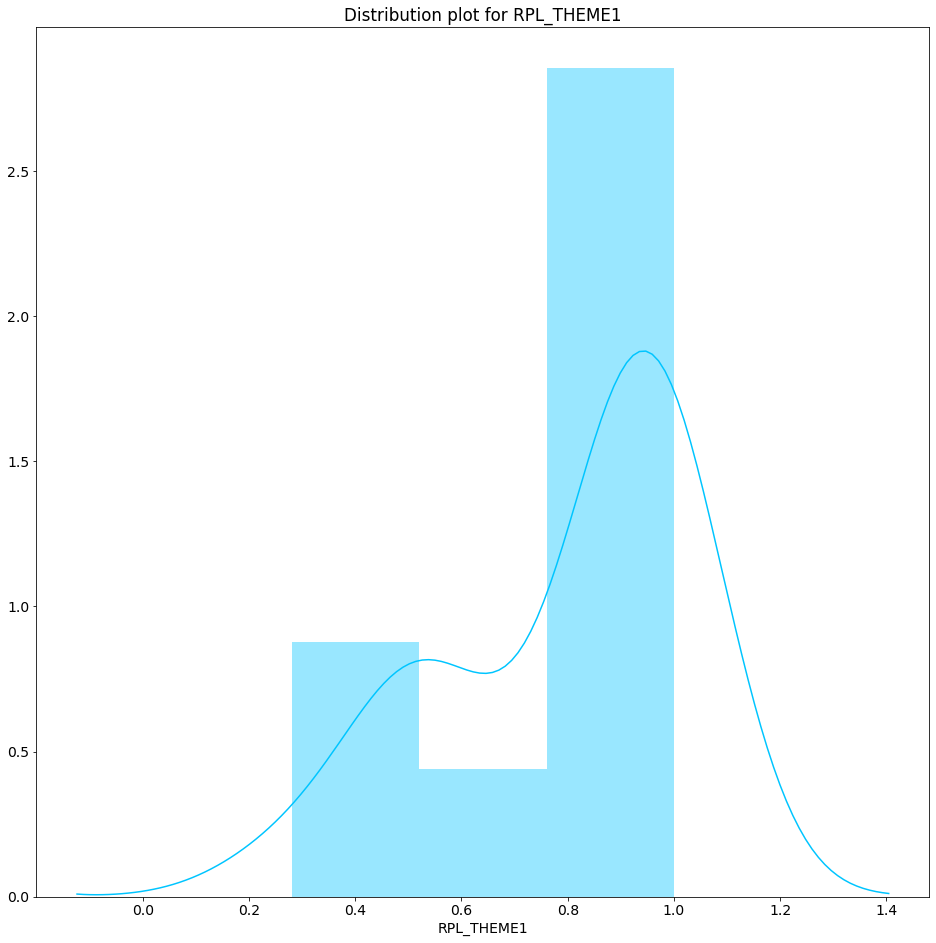

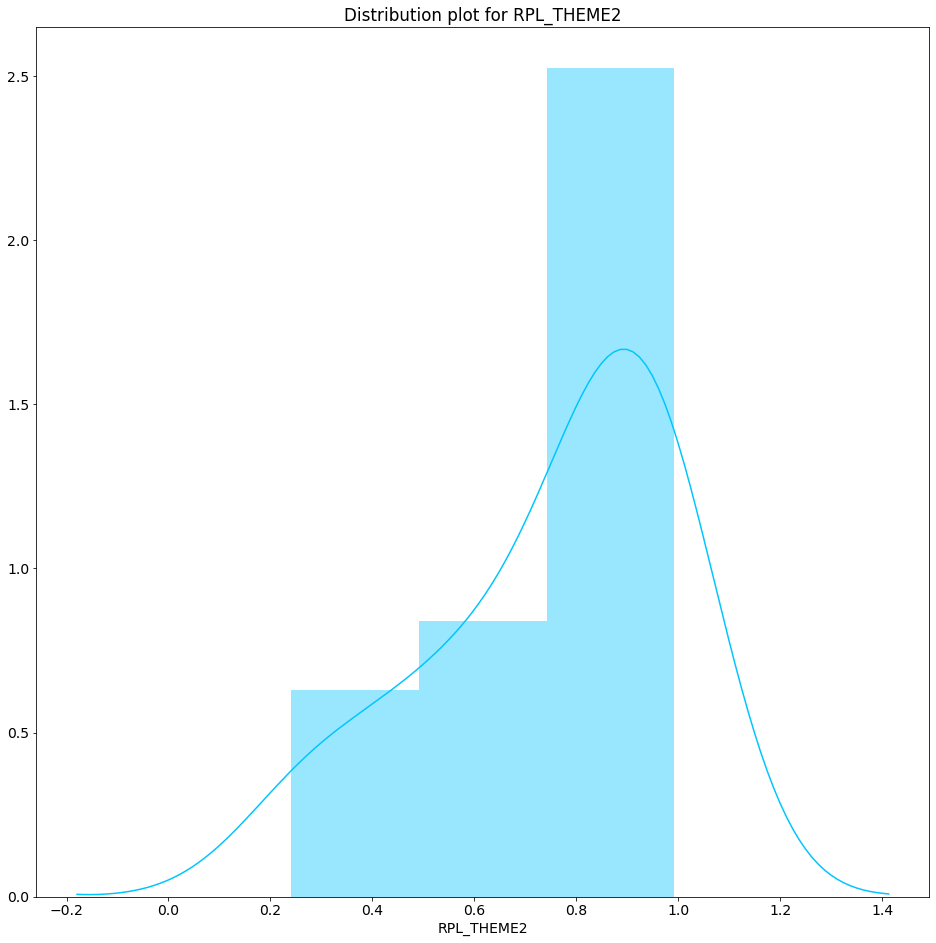

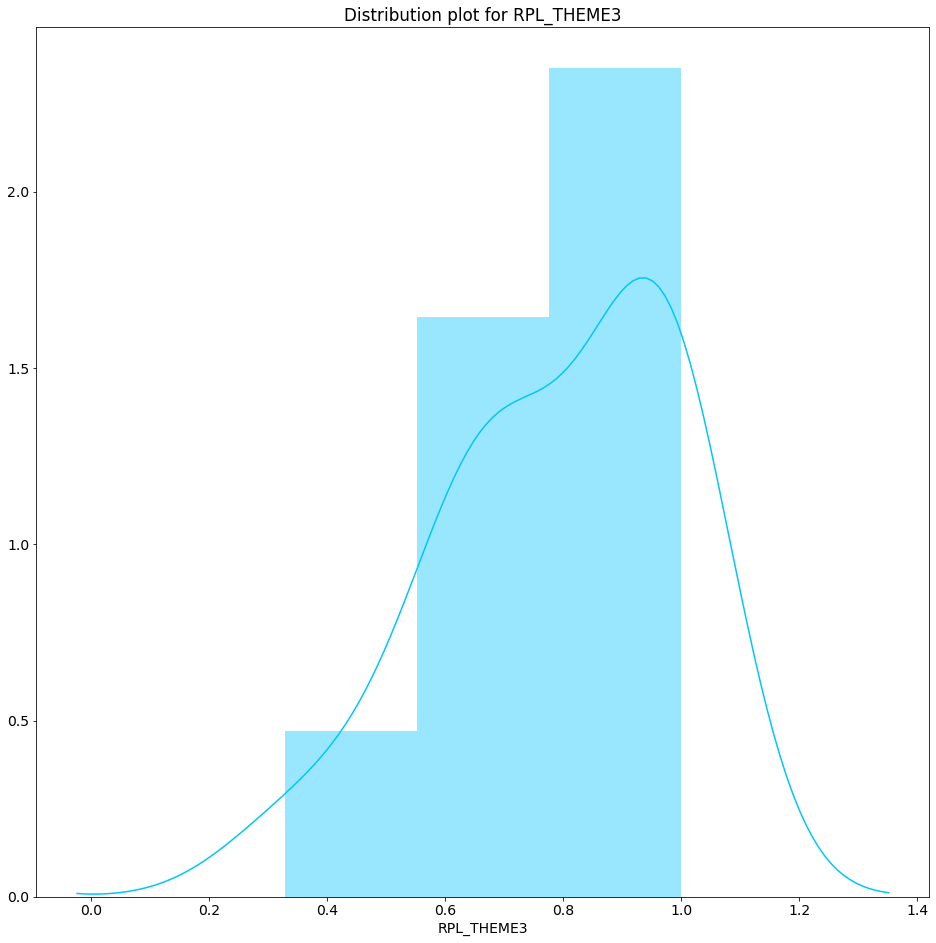

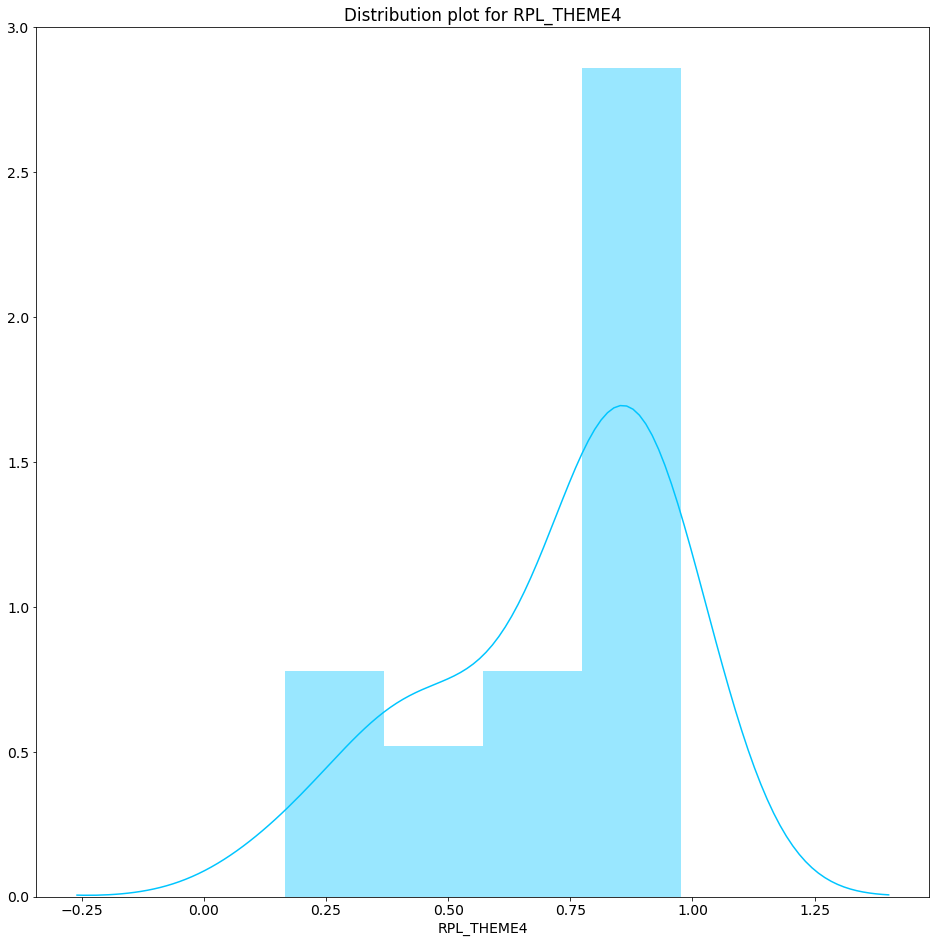

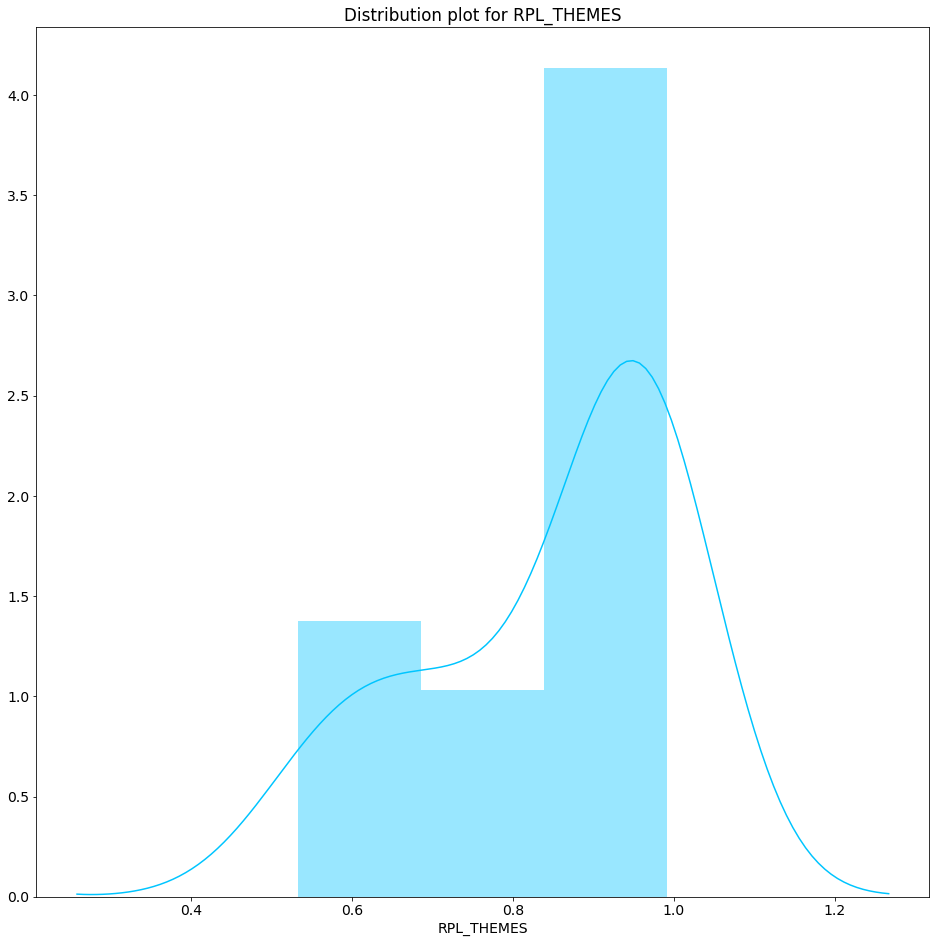

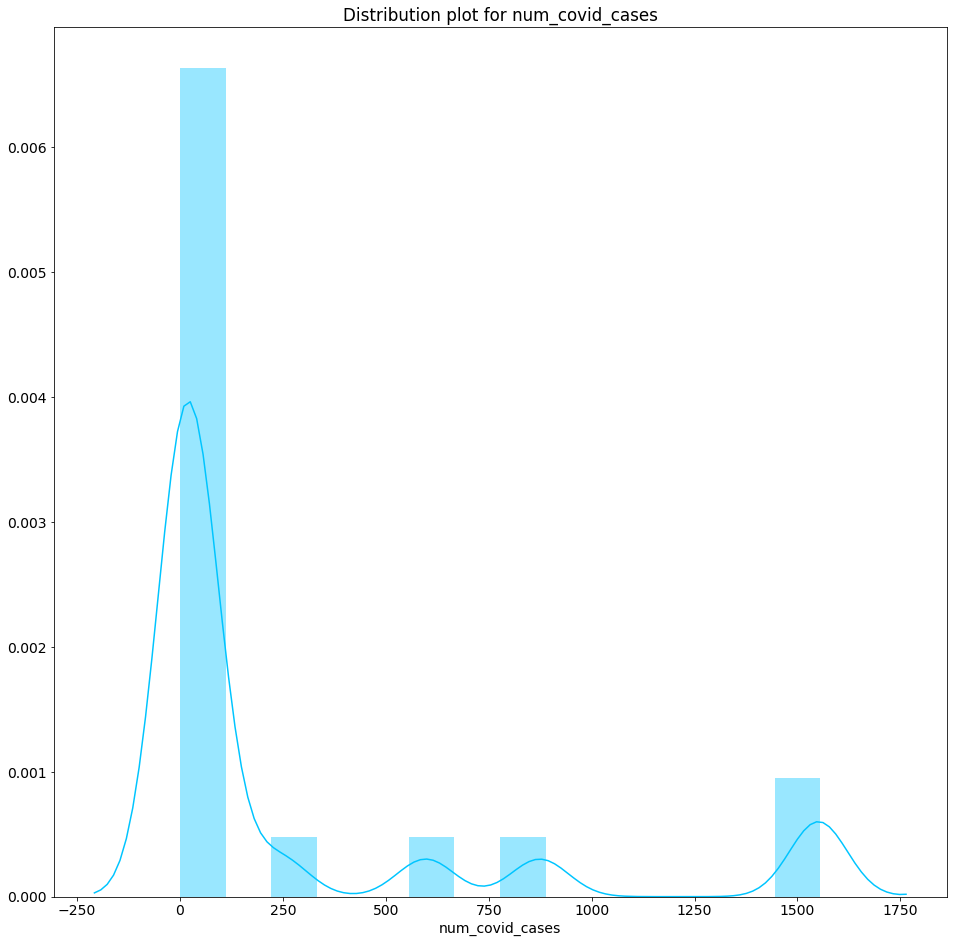

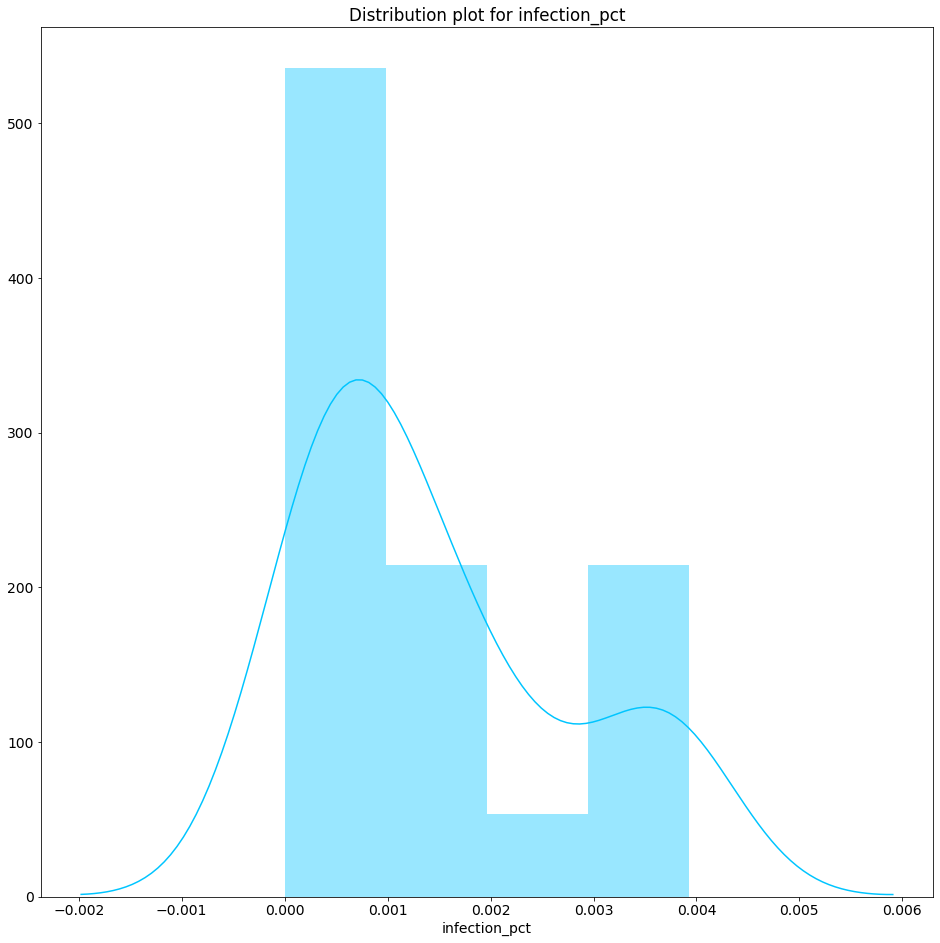

In [23]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_11)

## What does the Distribution of our Data look like when we use the Categorical column for population density?

- Here we will look at the same columns as we did by Region but will use the ```pop_density_category```

1. **Low** - This will be all the counties that have a population density that are in the bottom 25%
2. **High** - This will be all the counties that have a population density that are in the top 25%
3. **Mid** - These will be the remaining counties

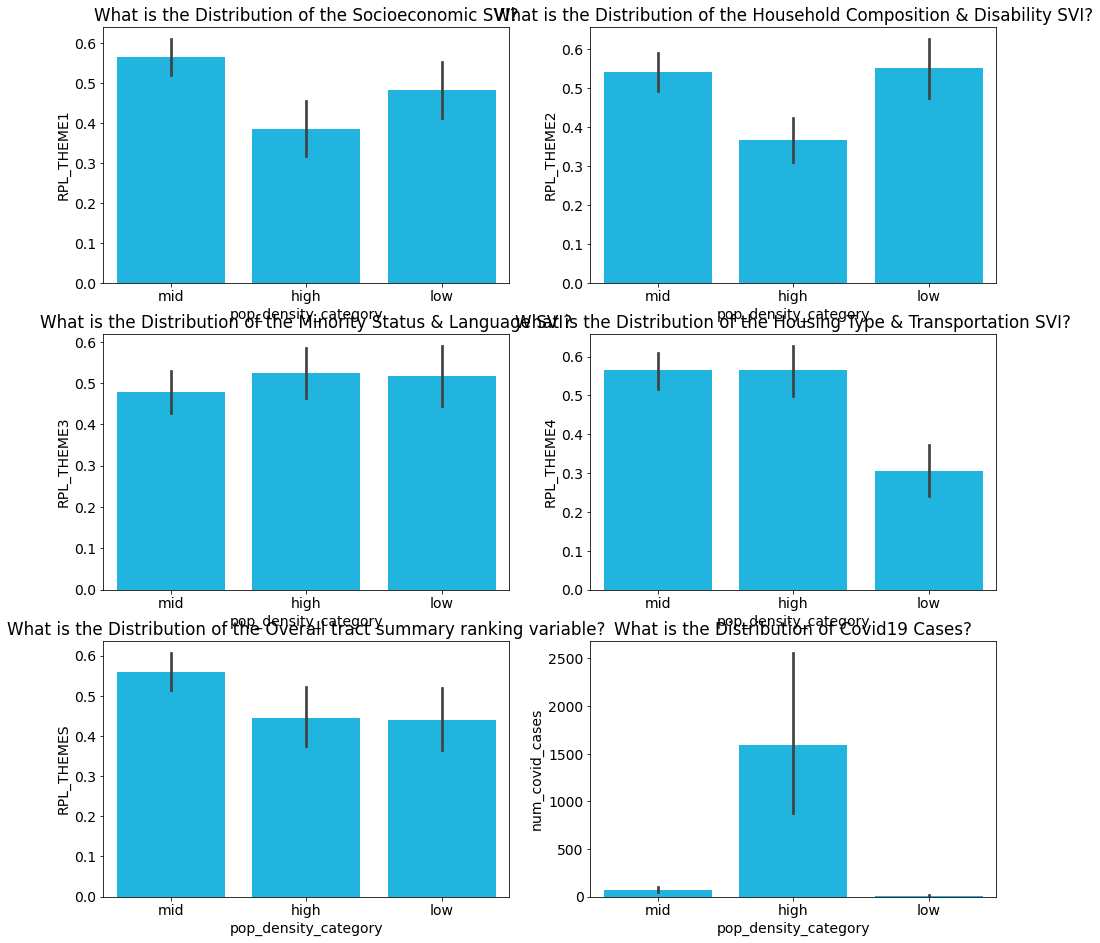

In [24]:
explore.plot_categorical_pop_density_barplots(df)

In [25]:
# Subset the data into Low, Mid and Hight Population Density Dataframes
df_low, df_mid, df_high = explore.pop_density_categoricaol_subset_for_distro_plots(df)

### Distribution Plots for Low Population Density

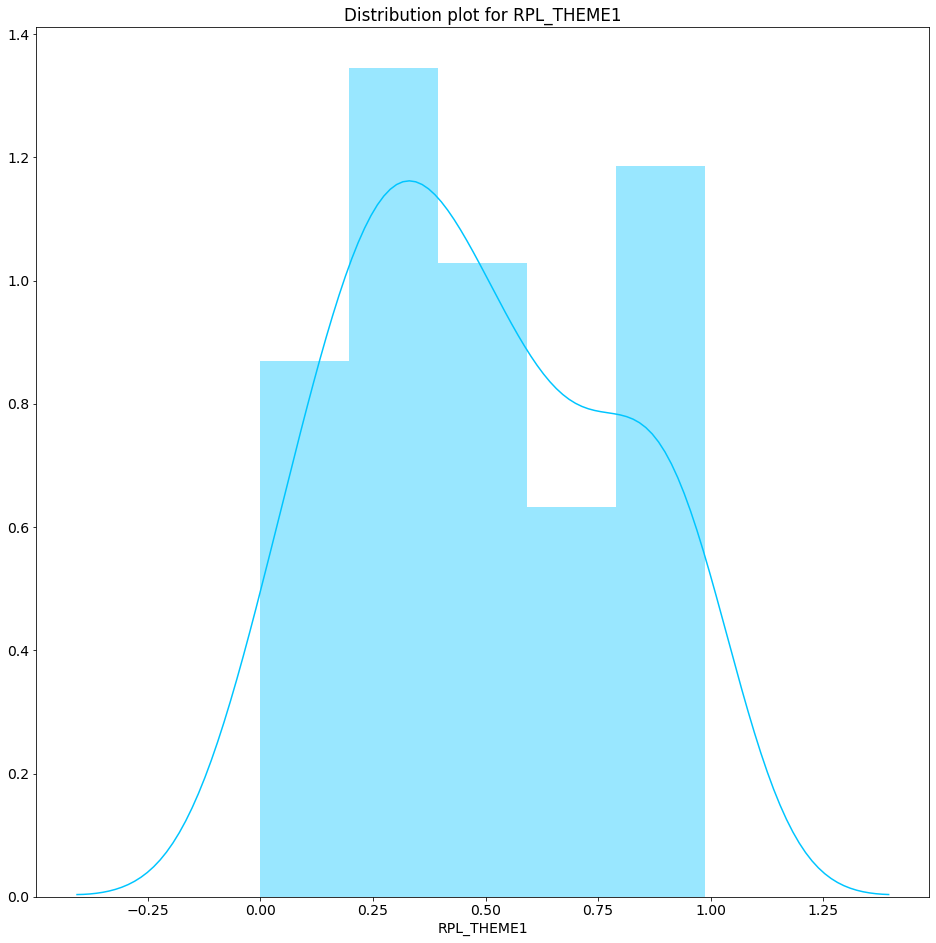

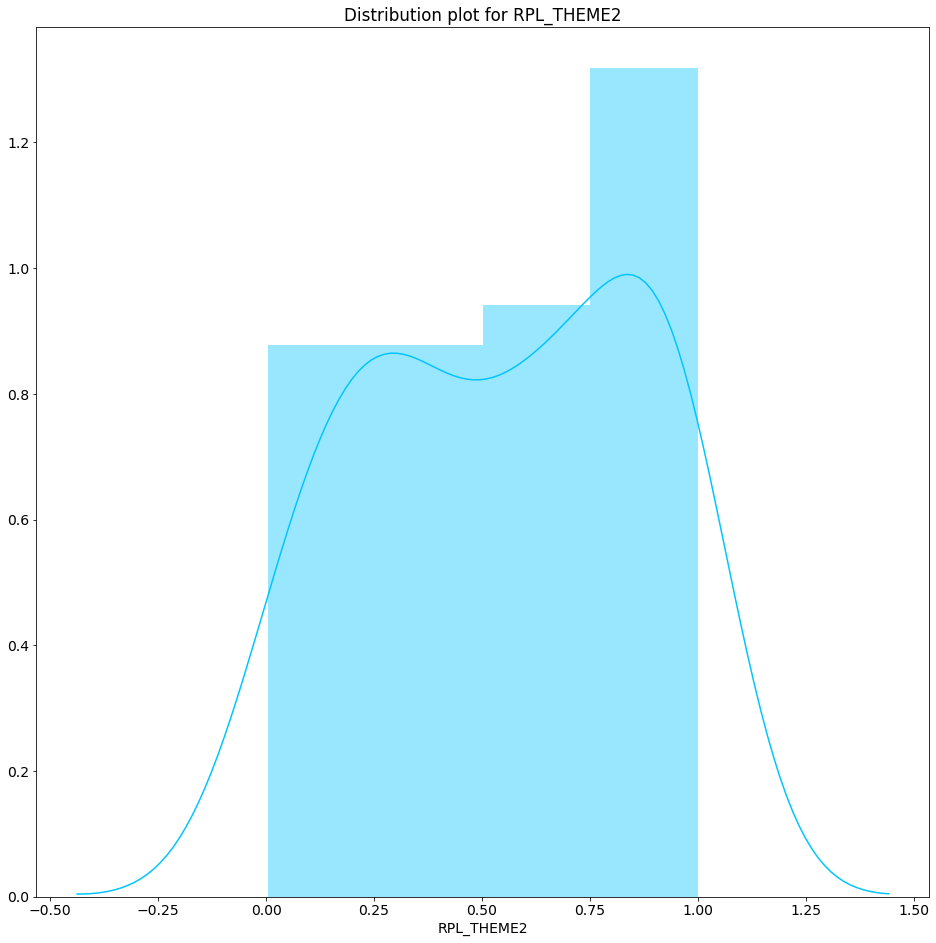

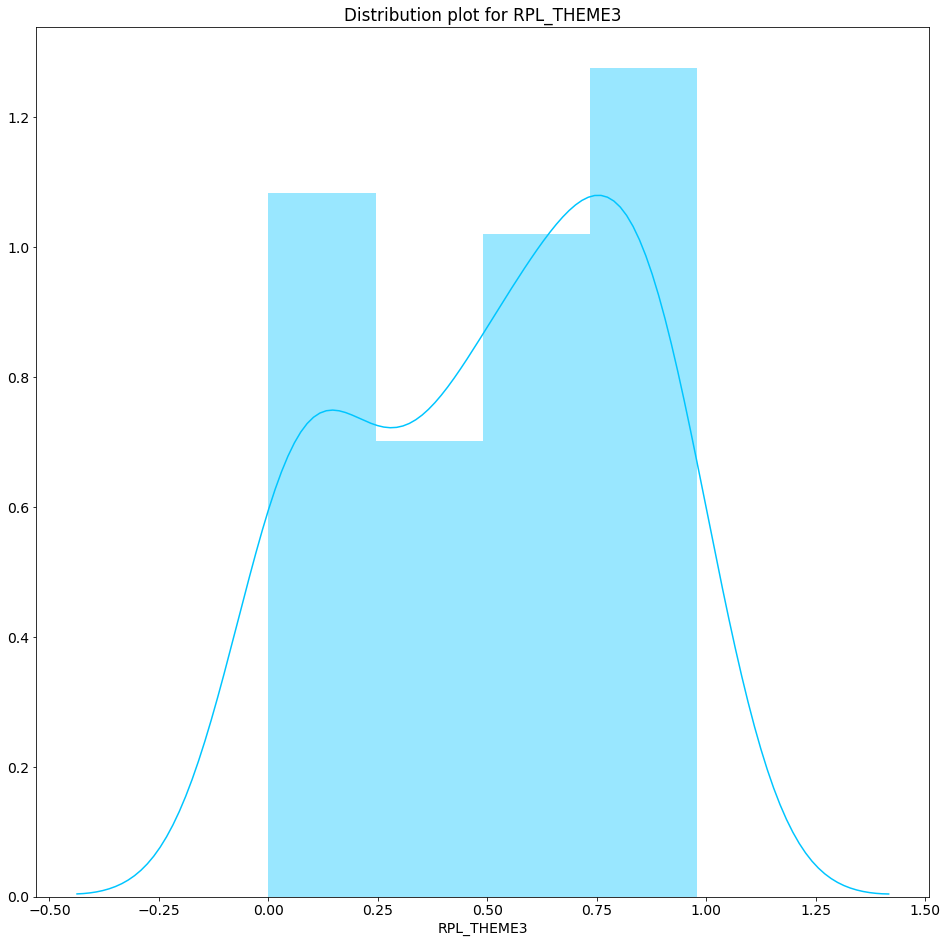

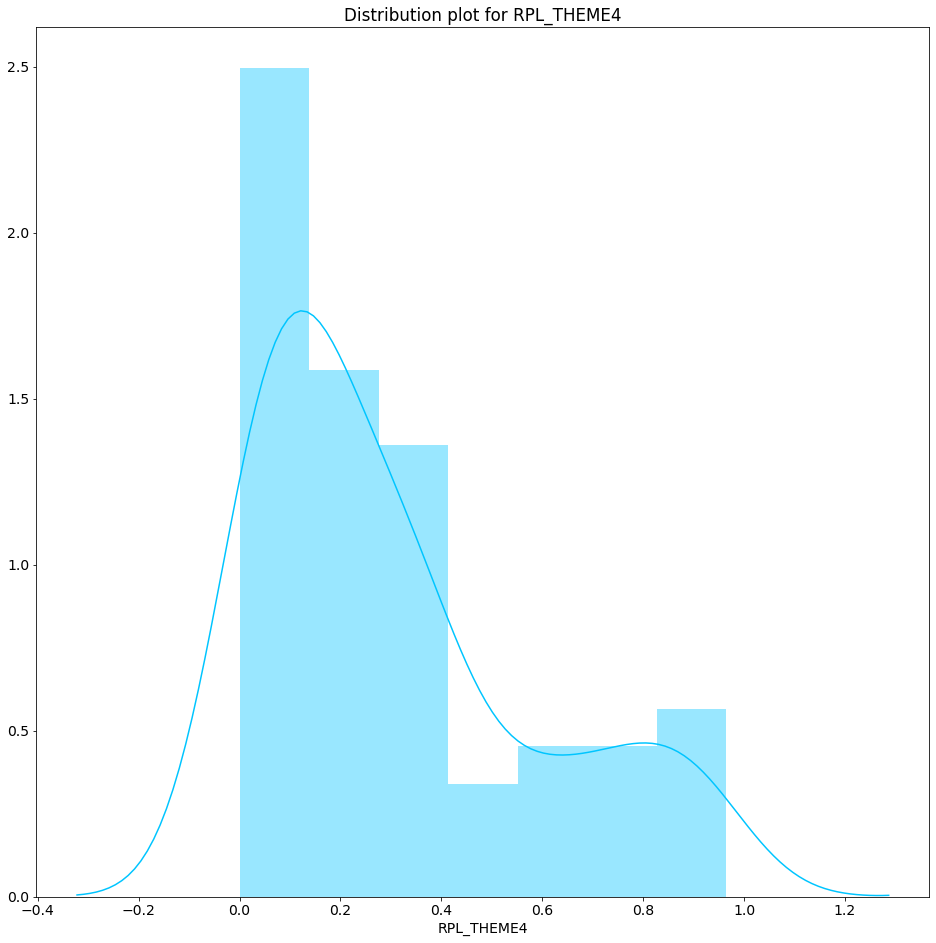

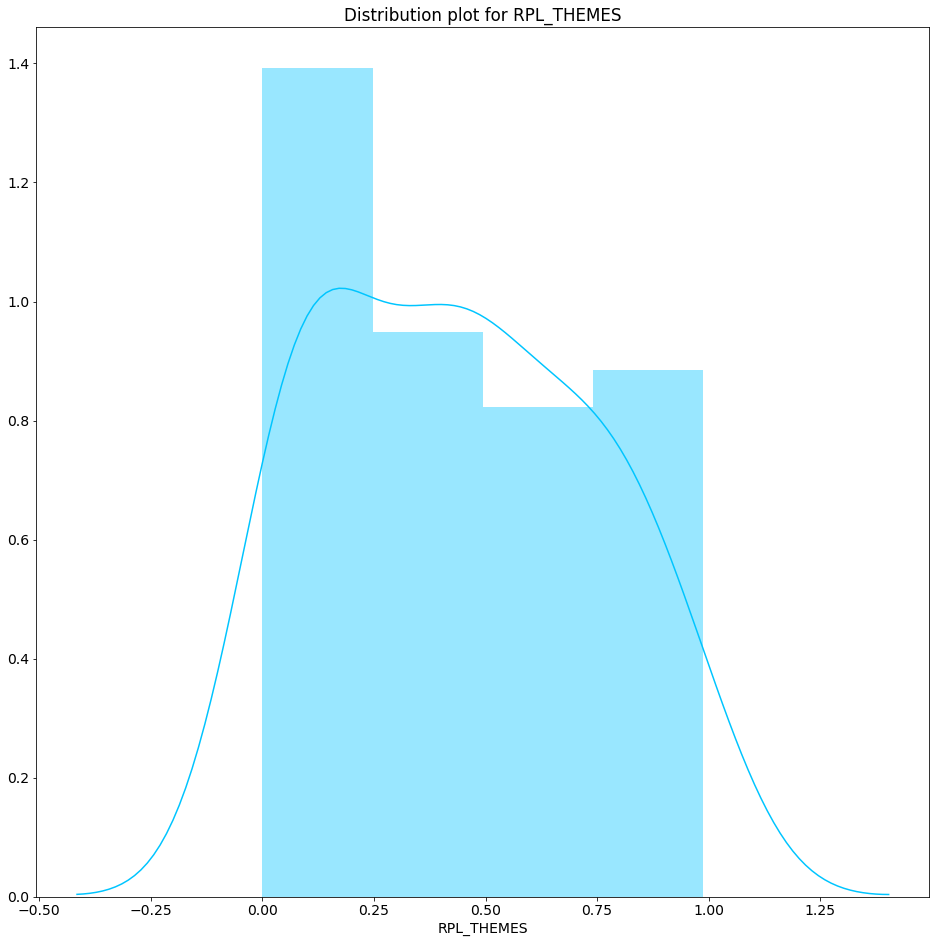

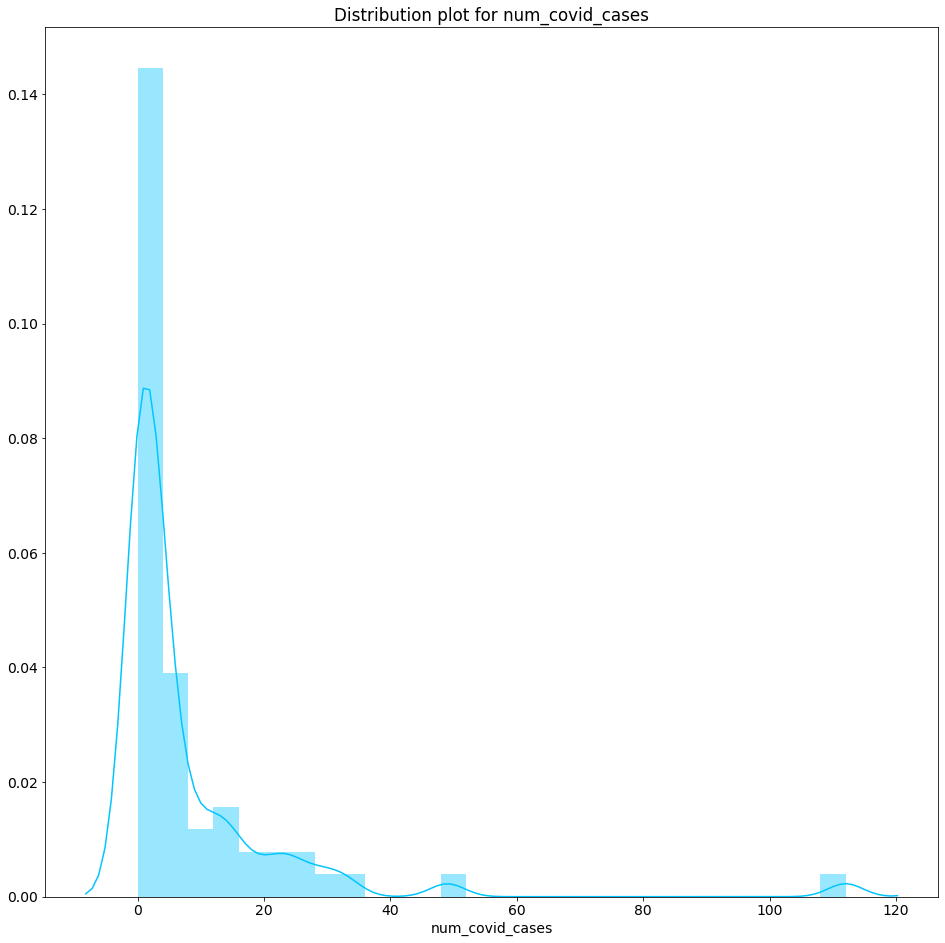

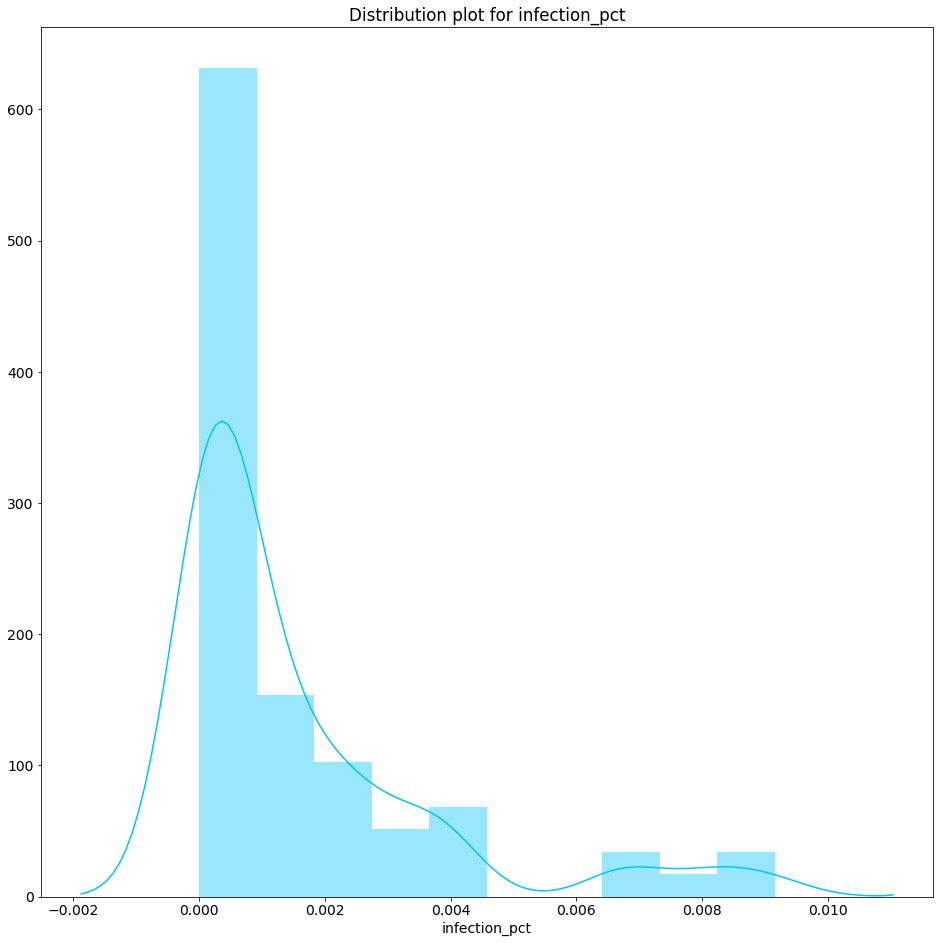

In [26]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_low)

### Distribution Plots for Low Population Density

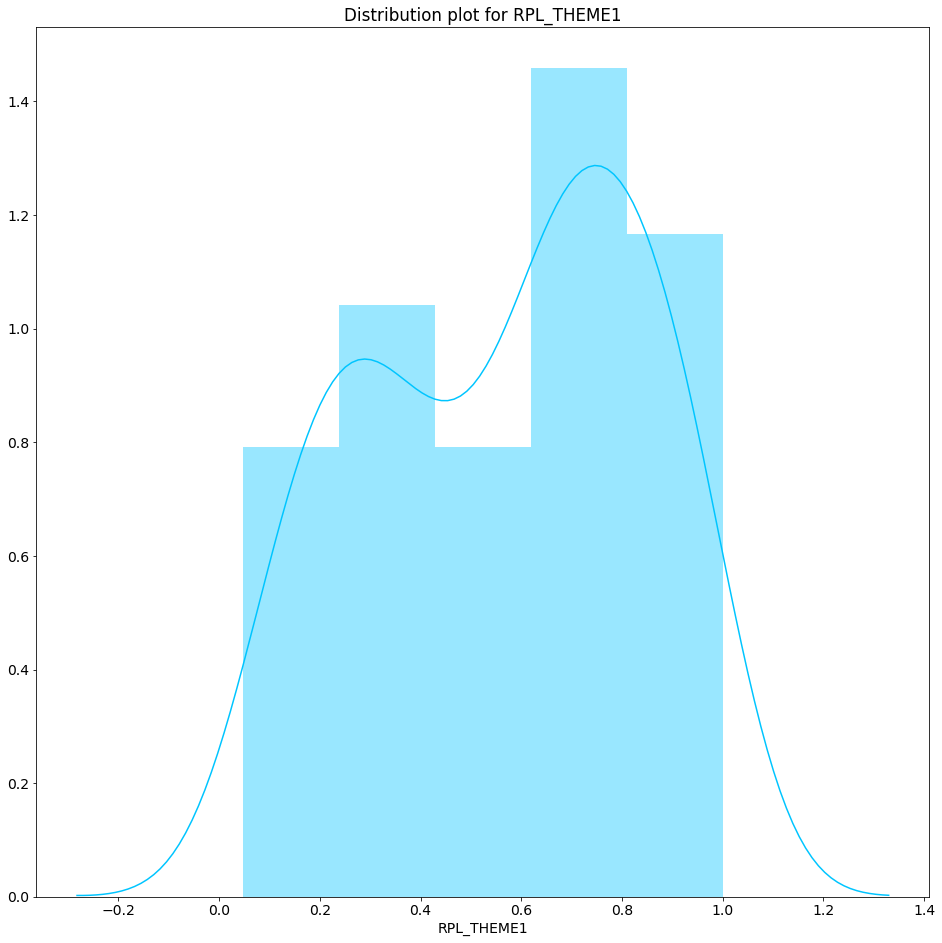

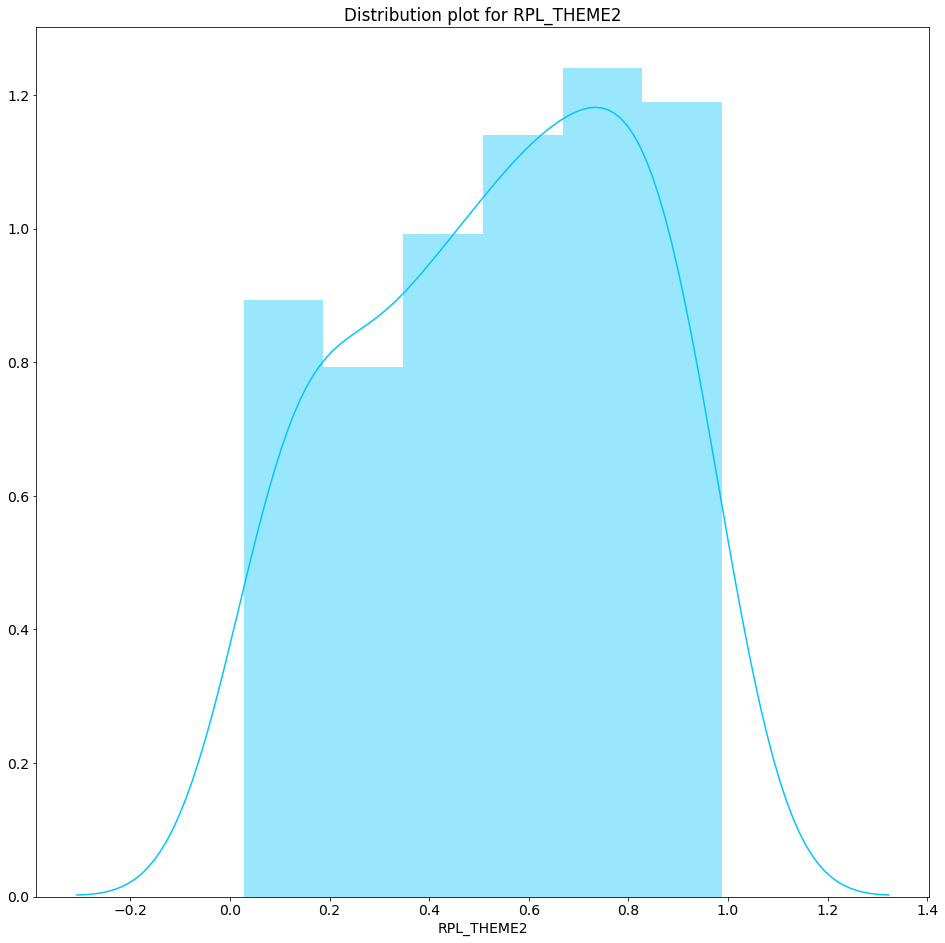

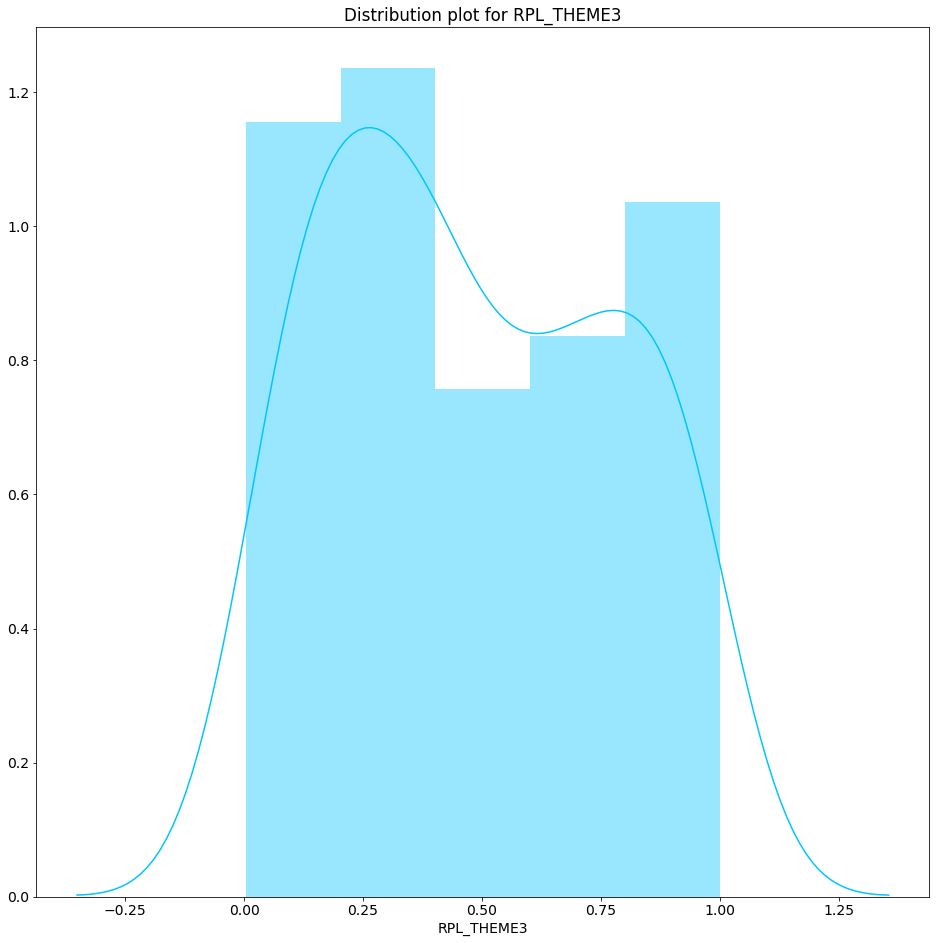

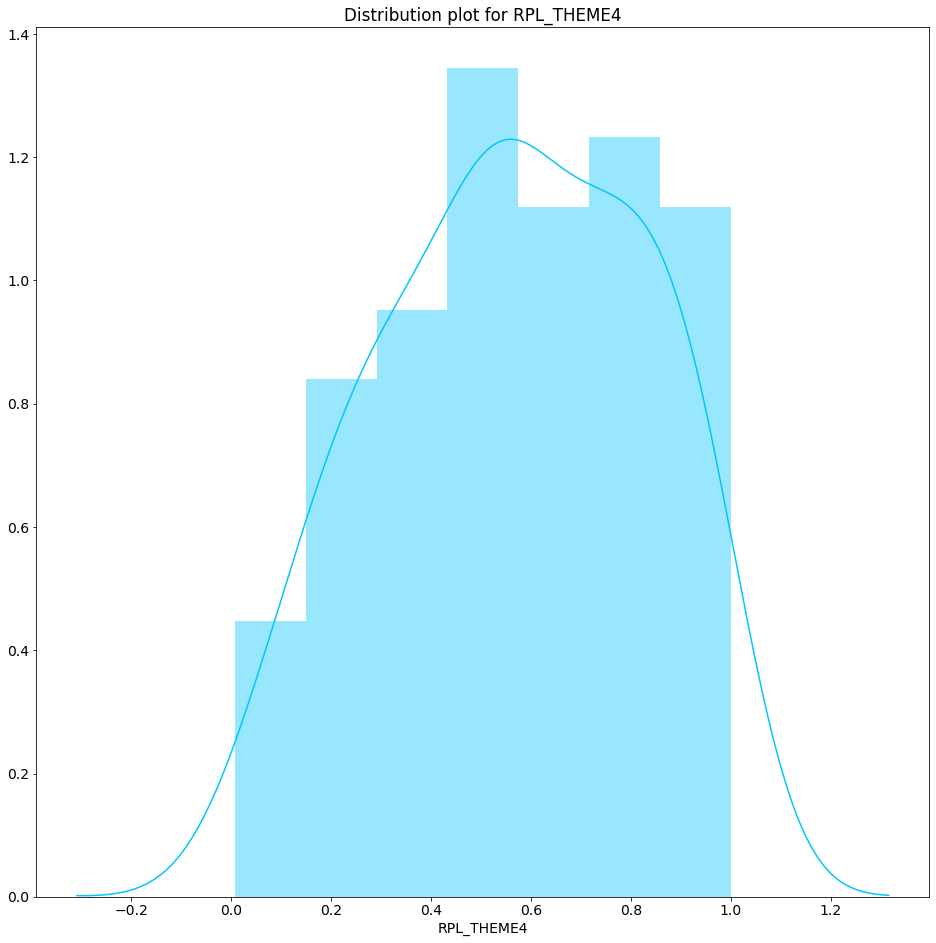

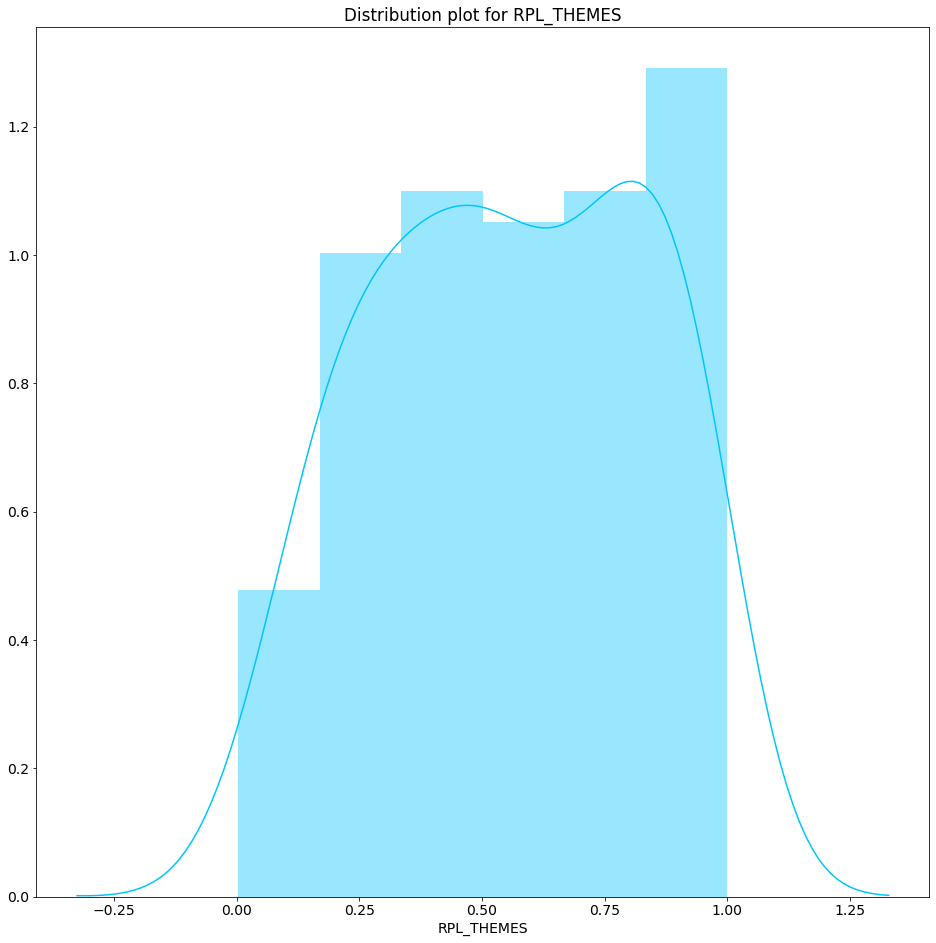

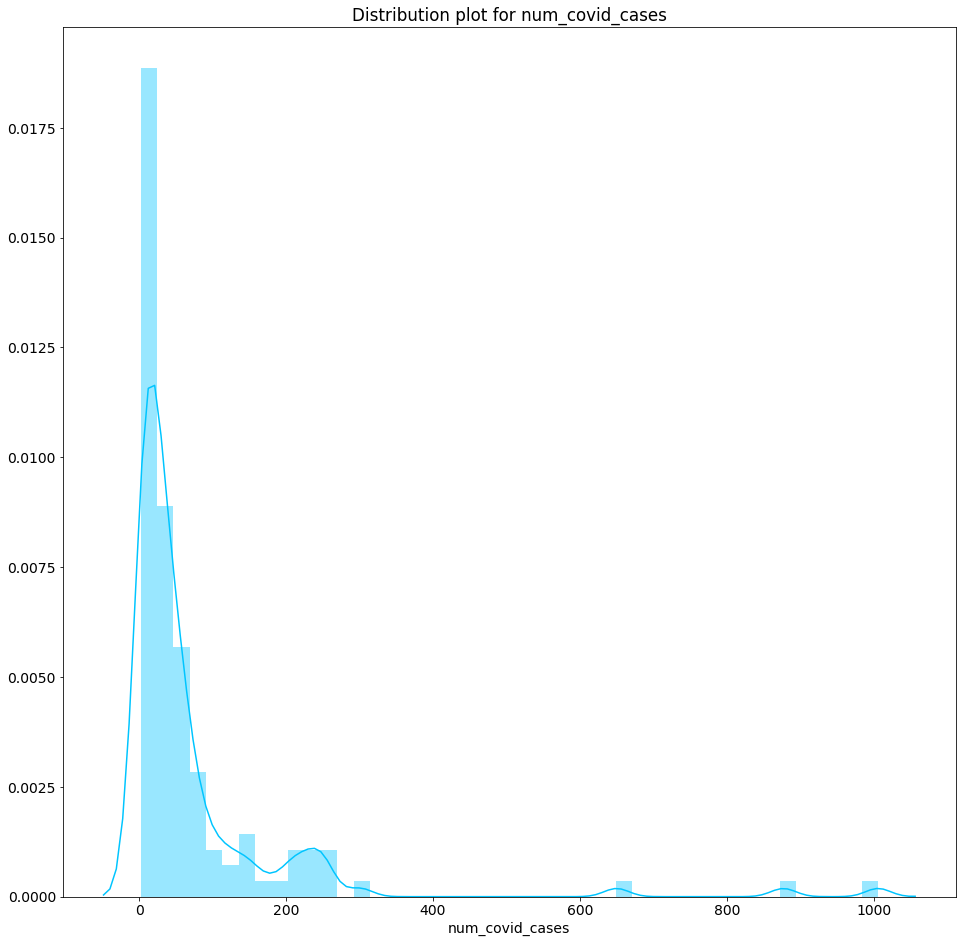

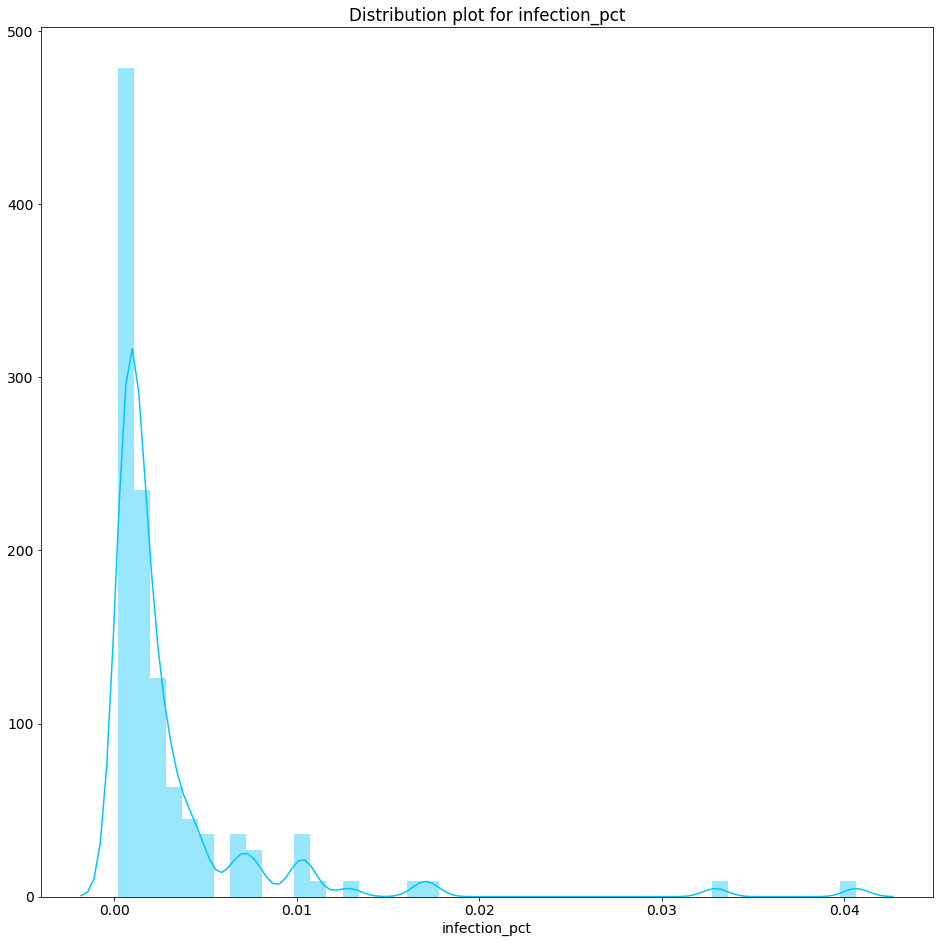

In [27]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_mid)

### Distribution Plots for Low Population Density

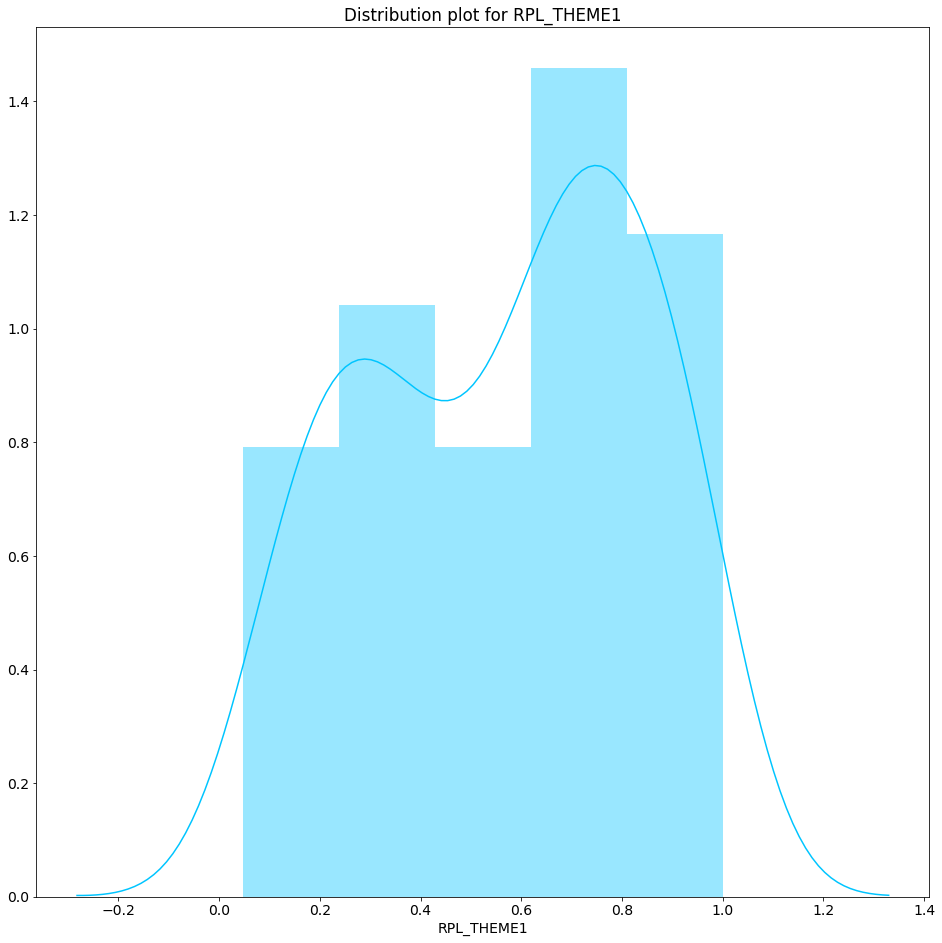

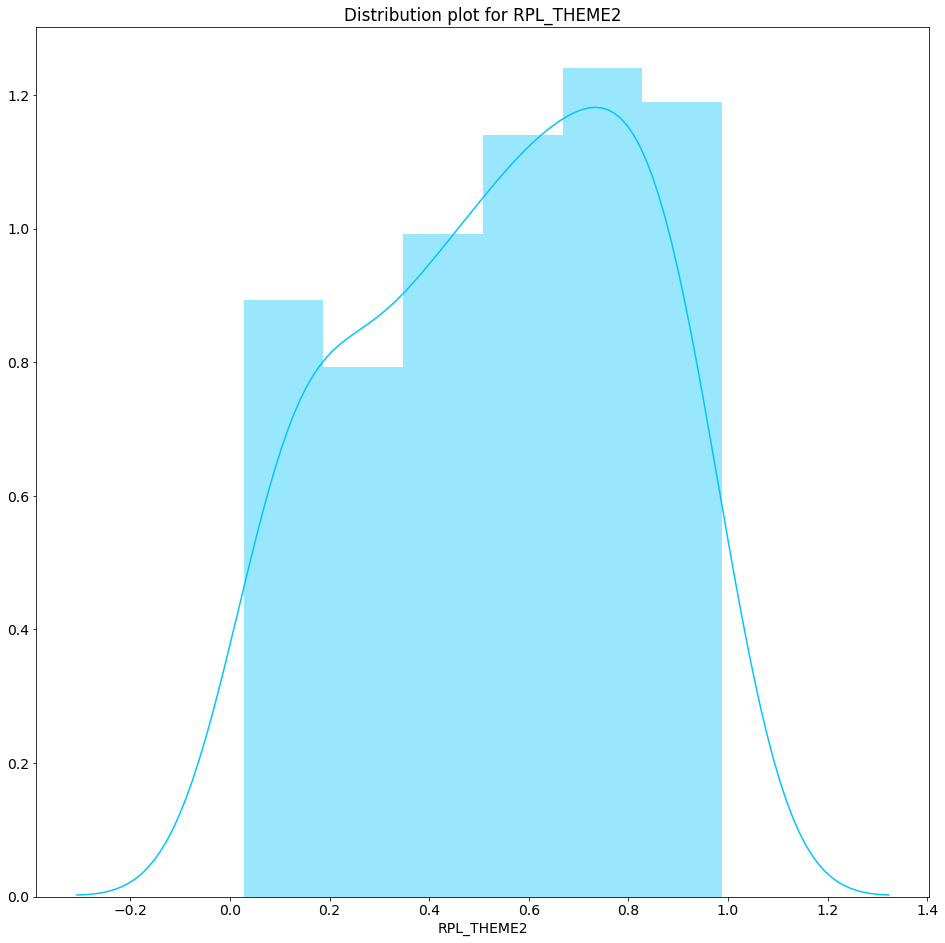

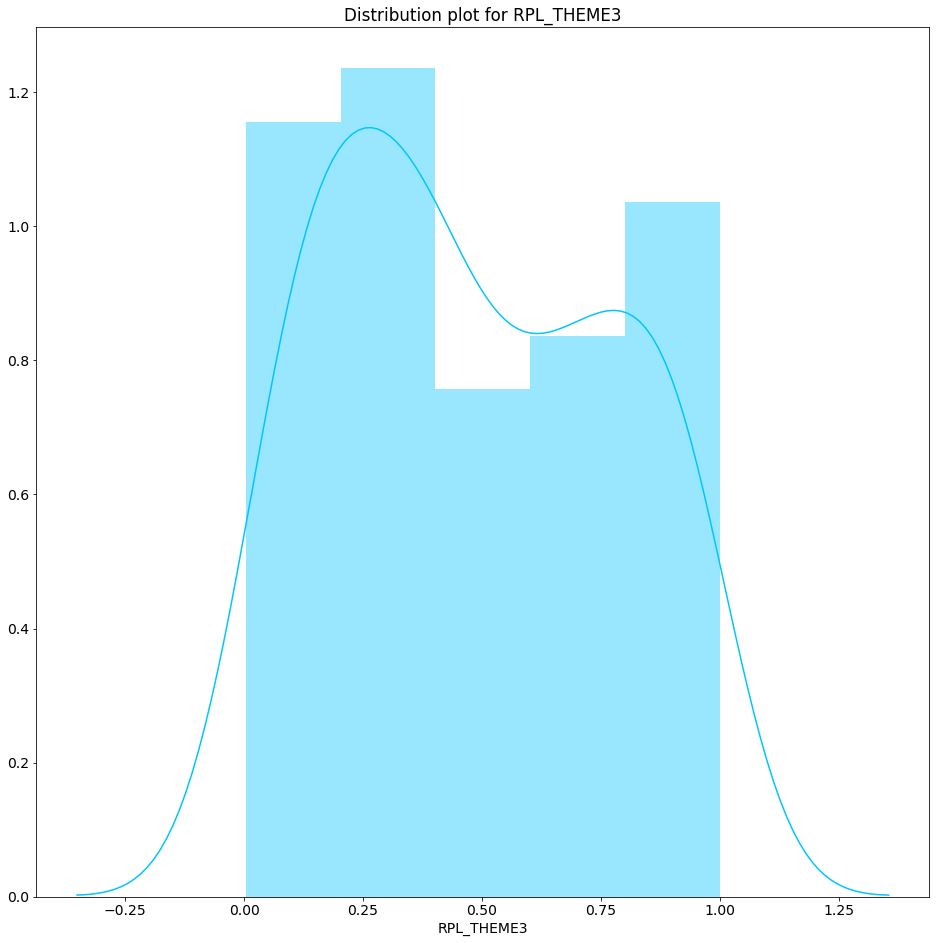

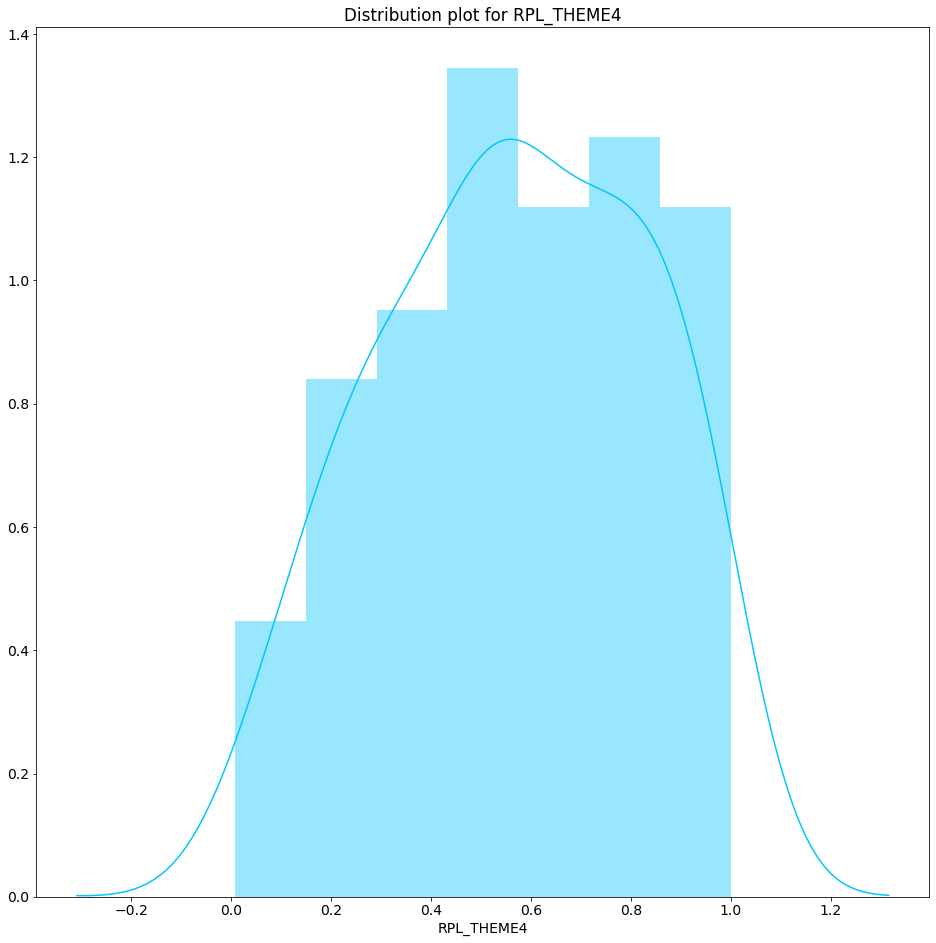

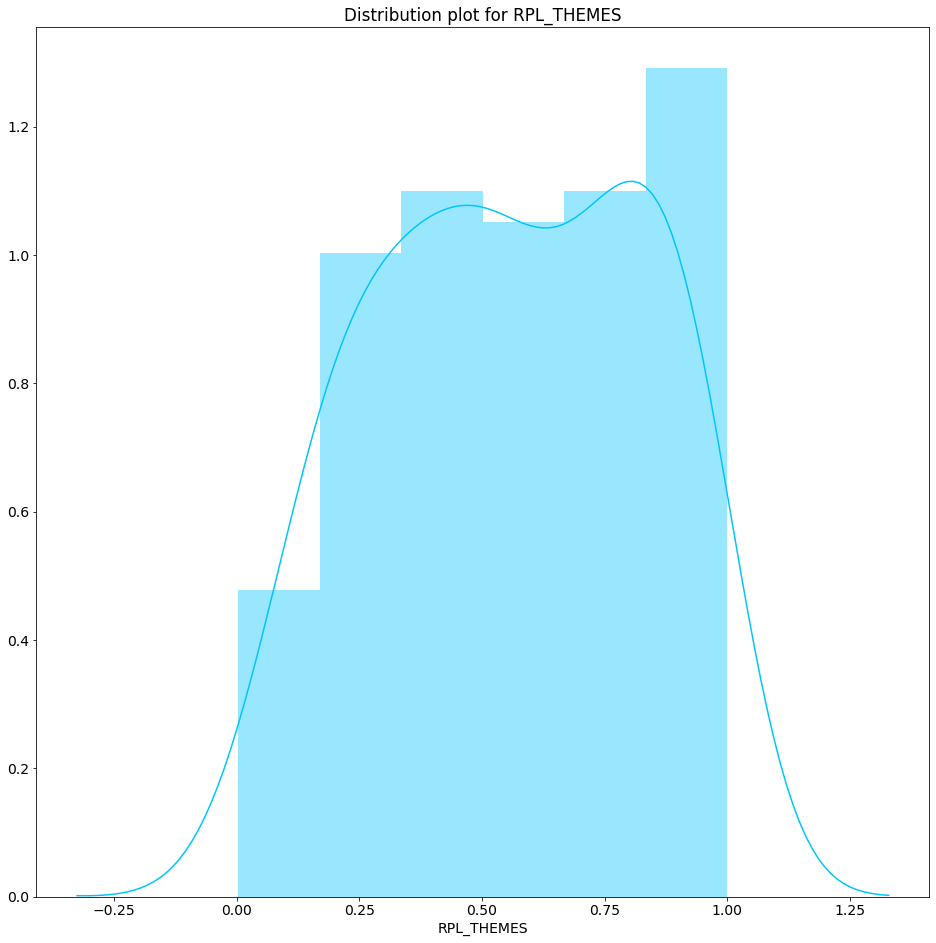

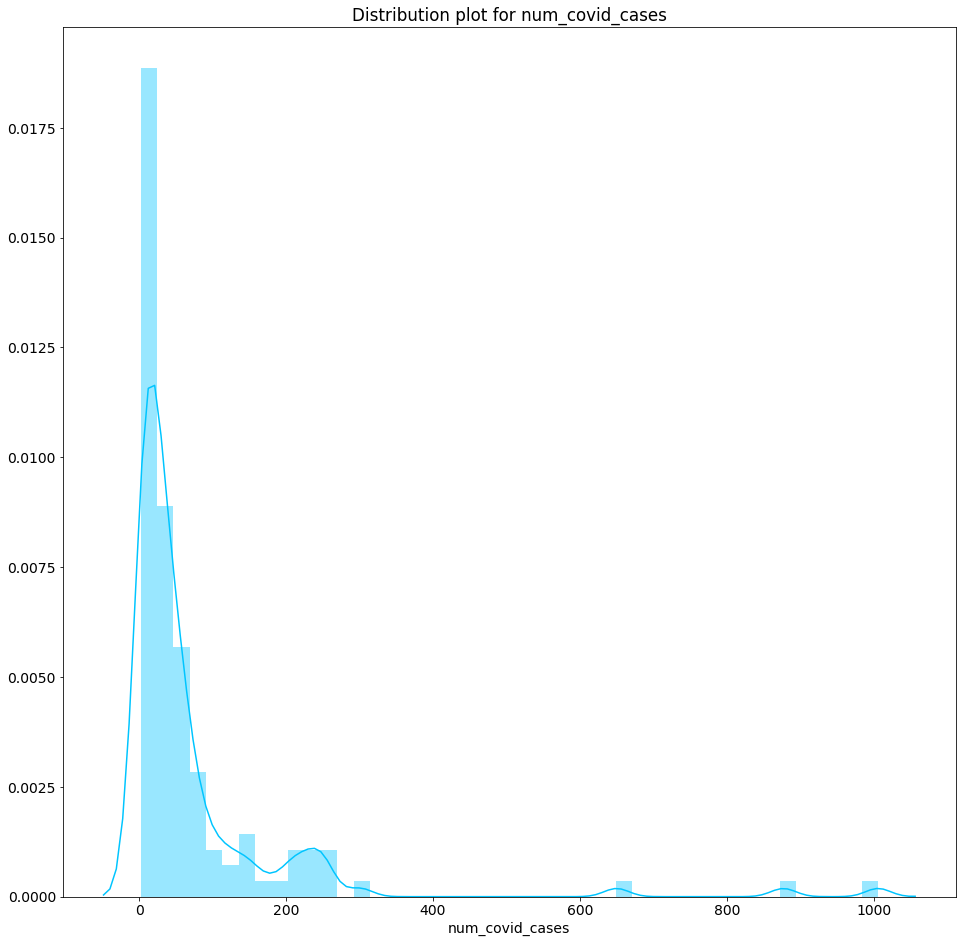

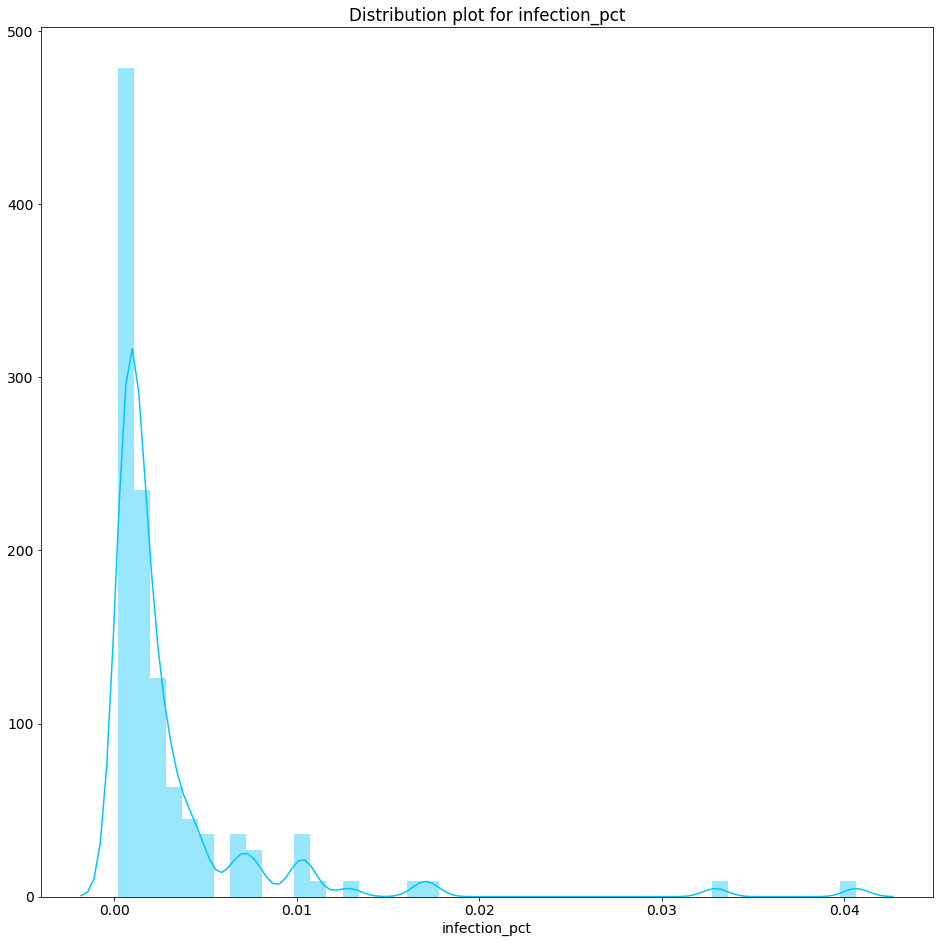

In [28]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_high)

## Is there a linear correlation between population density and infection rate?

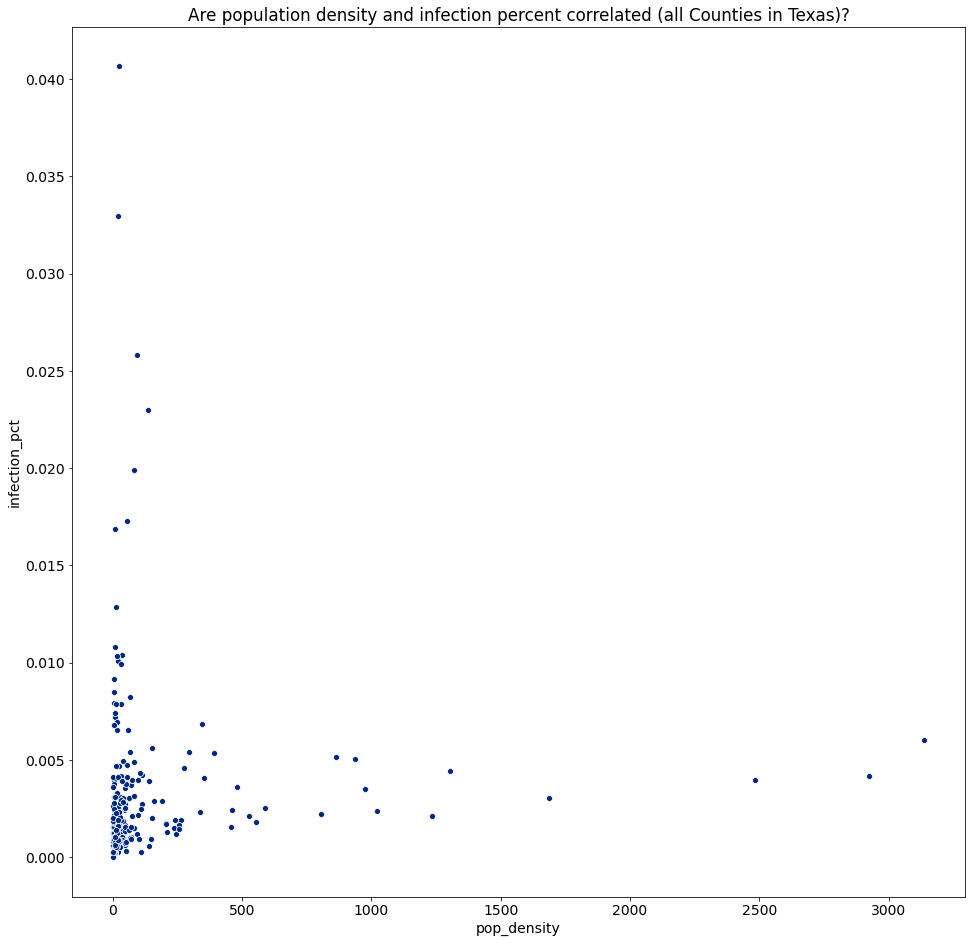

In [29]:
plt.title("Are population density and infection percent correlated (all Counties in Texas)?")
sns.scatterplot(df.pop_density, df.infection_pct, color = '#00287f')

**Takeaways**

It does not look like there is a great linear relationship between the 2, however we will run a statistical test to be sure.

### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [30]:
# set alpha
alpha = .05

# set our x and y
x = df.pop_density
y = df.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.05996876439494929
p= 0.3411539564195117


In [31]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.34) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


Takeaways:
- Since there is no linear relationship between population density and infection percent for all of the County's, we will try subsetting them into similar sized population density's to see if we can find a linear relationship.

In [32]:
#get dataframes for each popluations density category low, mid, high
df_low, df_mid, df_high = explore.get_pop_density_categoricaol_subset(df)

### Do the Counties with a low density population have a linear relationship with Infection Rate?

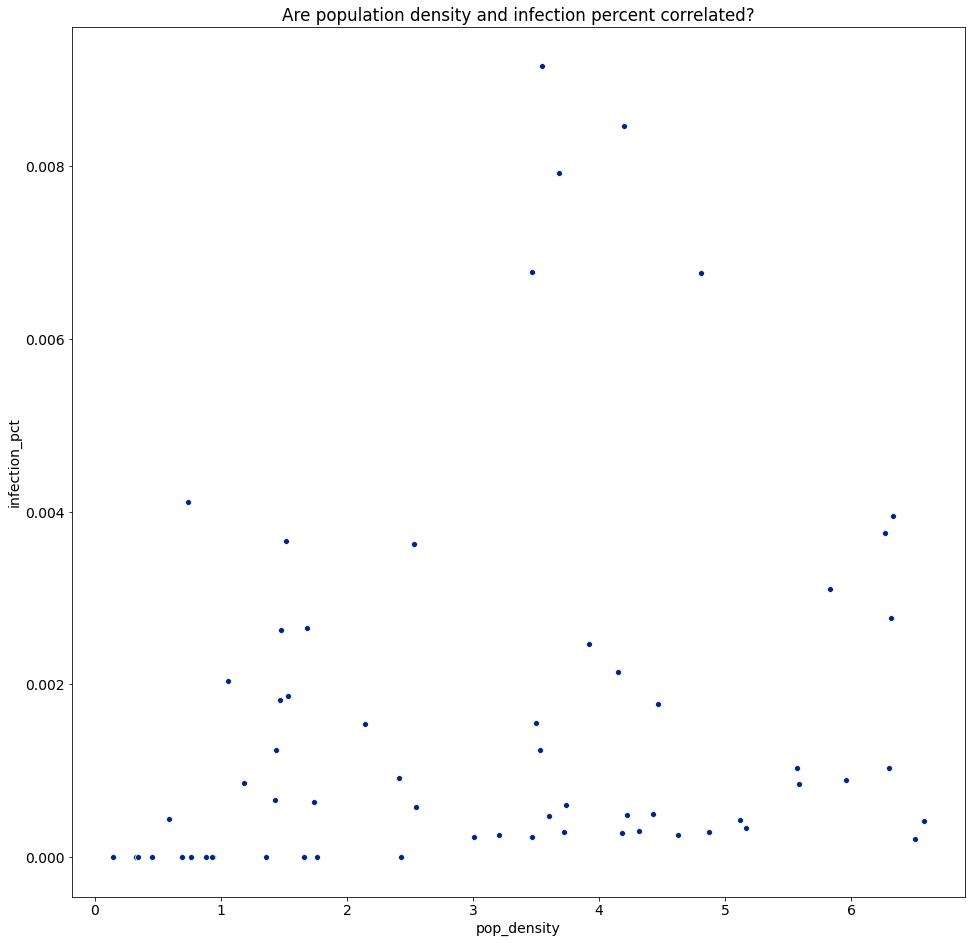

In [33]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_low.pop_density, df_low.infection_pct, color = '#00287f')

**Takeaways:**
- Here we see the counties are spread out a bit more so we will need to run Pearson's R to check the correlation as well as the p value

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [34]:
# set alpha
alpha = .05

# set our x and y
x = df_low.pop_density
y = df_low.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.2128510289542138
p= 0.09128494581289913


In [35]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.09) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


### Do the Counties with a High density population have a linear relationship with Infection Rate?

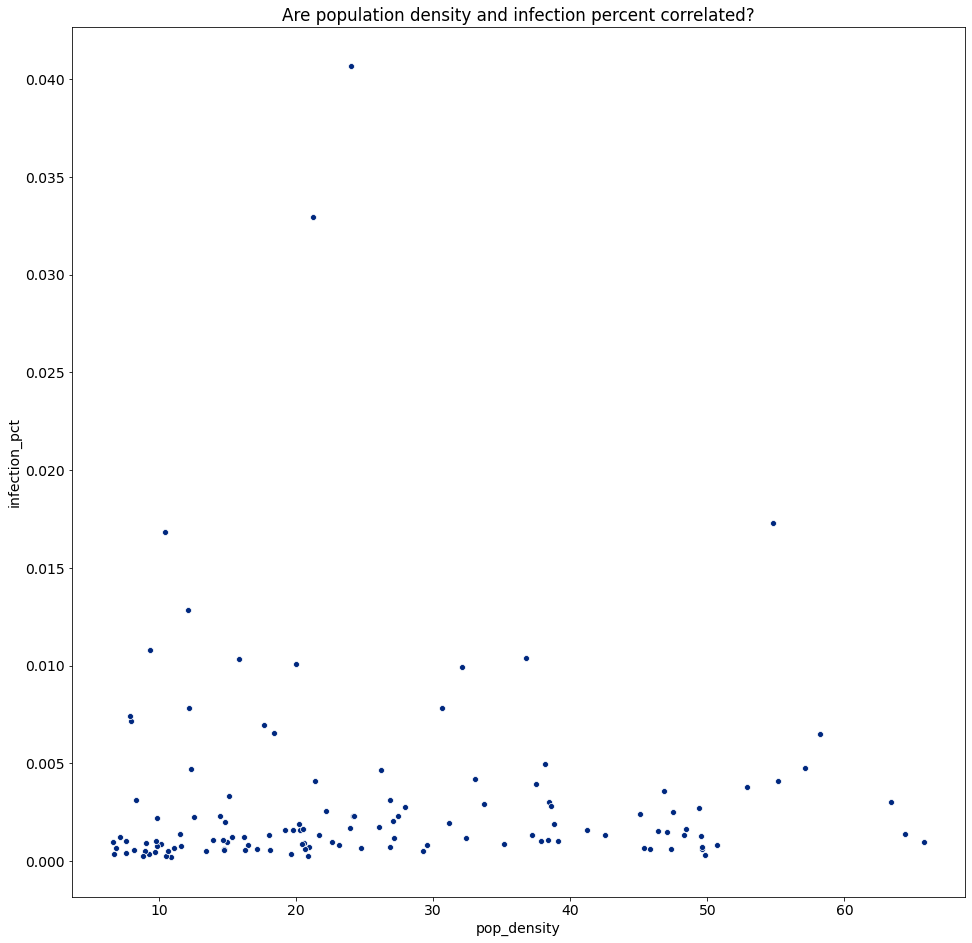

In [36]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_high.pop_density, df_high.infection_pct, color = '#00287f')

Takeaways:
- Here there does seem to be a pattern between population density and infection percent for the counties grouped as High Population

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [37]:
# set alpha
alpha = .05

# set our x and y
x = df_high.pop_density
y = df_high.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.006639485754411041
p= 0.9411805962248987


In [38]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.94) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


### Do the Counties with a Mid Density Population have a Linear Relationship with Infection Rate?

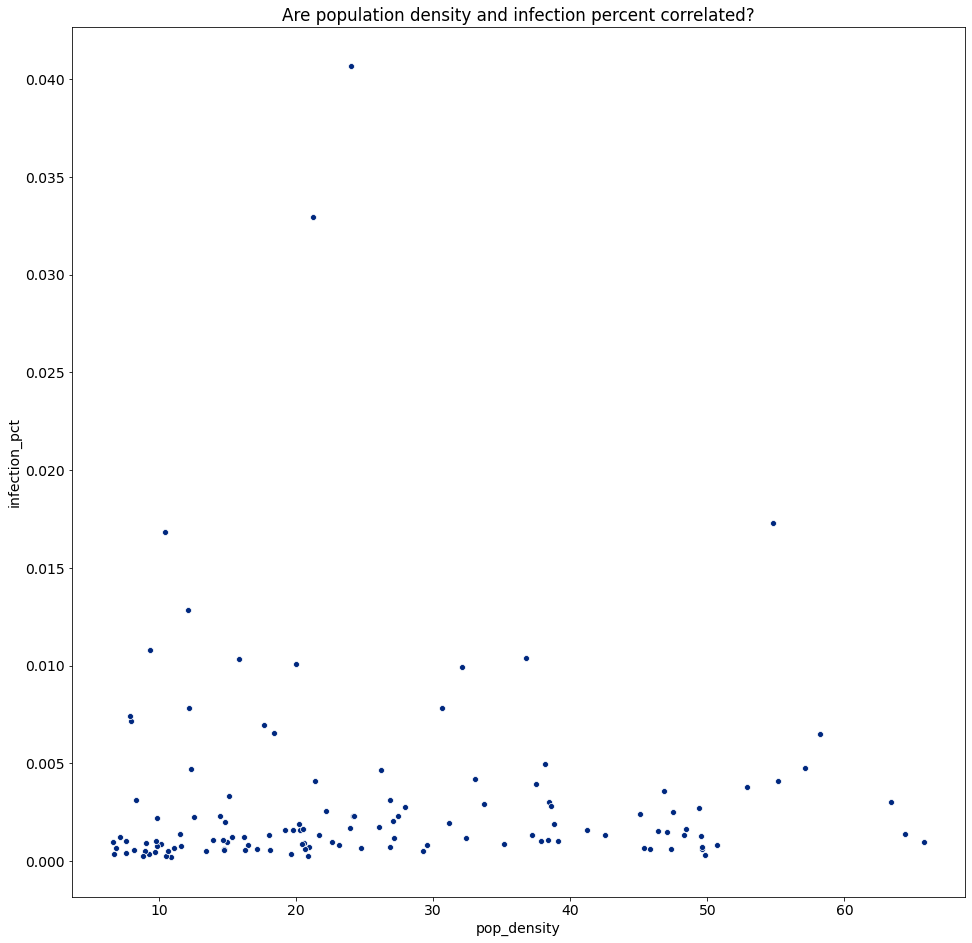

In [39]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_mid.pop_density, df_mid.infection_pct, color = '#00287f')

Takeaways:
- There does seem to be a pattern between population density and infection percent for the counties grouped as Mid Population Density

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [40]:
# set alpha
alpha = .05

# set our x and y
x = df_mid.pop_density
y = df_mid.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.006639485754411041
p= 0.9411805962248987


In [41]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.94) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


**Takeaways:**
- Since we failed to reject the null hypothesis for each category in population density we can safely say there is no statistical significance in the linear relationship for Population Density and Infection Percent 

## Is there a correlation between the number of Senior Citizens in a County and Infection?

Text(0.5, 1.0, 'Senior Citizens and Infection percentage')

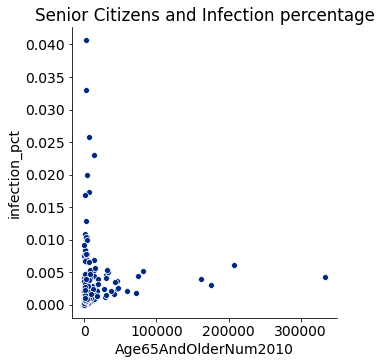

In [42]:
sns.relplot(x="Age65AndOlderNum2010", y="infection_pct", data=df, color = '#00287f')
plt.title("Senior Citizens and Infection percentage")

#### Chi Squared

We will set our $alpha$ to a confidence level of 95%

- $H_0$: Senior citizen percent and infection percent are independent of each other.
- $H_a$: Senior citizen percent and infection percent are dependent of each other.

In [43]:
observed = pd.crosstab(df.senior_pct, df.infection_pct_category)

In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 1  0  1]
 [ 3  0  2]
 [ 2  1  3]
 [ 5  1  8]
 [ 5  1  2]
 [ 8  0  9]
 [ 4  2  7]
 [ 7  7 11]
 [ 9  2 12]
 [ 6  3  7]
 [ 4  3 10]
 [ 1  5  6]
 [ 2  4 14]
 [ 1  1  9]
 [ 0  6  7]
 [ 2  6  6]
 [ 0  1  1]
 [ 1  3  4]
 [ 1  4  1]
 [ 1  4  2]
 [ 1  3  0]
 [ 0  4  1]
 [ 0  1  1]
 [ 0  1  1]
 [ 0  0  1]
 [ 0  1  0]]
---
Expected

[[ 0.50393701  0.50393701  0.99212598]
 [ 1.25984252  1.25984252  2.48031496]
 [ 1.51181102  1.51181102  2.97637795]
 [ 3.52755906  3.52755906  6.94488189]
 [ 2.01574803  2.01574803  3.96850394]
 [ 4.28346457  4.28346457  8.43307087]
 [ 3.27559055  3.27559055  6.4488189 ]
 [ 6.2992126   6.2992126  12.4015748 ]
 [ 5.79527559  5.79527559 11.40944882]
 [ 4.03149606  4.03149606  7.93700787]
 [ 4.28346457  4.28346457  8.43307087]
 [ 3.02362205  3.02362205  5.95275591]
 [ 5.03937008  5.03937008  9.92125984]
 [ 2.77165354  2.77165354  5.45669291]
 [ 3.27559055  3.27559055  6.4488189 ]
 [ 3.52755906  3.52755906  6.94488189]
 [ 0.50393701  0.50393701  0.99212598]


In [45]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    independent of each other. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    dependent of each other. 
    ''')


    Because p (0.01) < alpha (.05), we reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    dependent of each other. 
    


## Is there a correlation between the number of Nursing Homes in a County and Infection?

Text(0.5, 1.0, 'Number of Nursing Homes and Infection percentage')

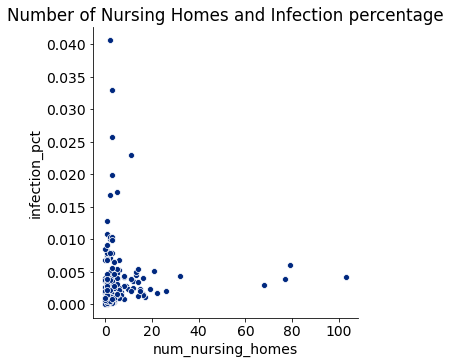

In [46]:
sns.relplot(x="num_nursing_homes", y="infection_pct", data=df, color = '#00287f')
plt.title("Number of Nursing Homes and Infection percentage")

#### Chi Squared

We will set our $alpha$ to a confidence level of 95%

- $H_0$: Number of nursing homes and infection percent are independent of each other.
- $H_a$: Number of nursing homes and infection percent are dependent of each other.

In [47]:
observed = pd.crosstab(df.num_nursing_homes, df.infection_pct)

In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[9 0 0 ... 0 0 0]
 [5 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---
Expected

[[1.87401575 0.13385827 0.13385827 ... 0.13385827 0.13385827 0.13385827]
 [3.7480315  0.26771654 0.26771654 ... 0.26771654 0.26771654 0.26771654]
 [2.25984252 0.16141732 0.16141732 ... 0.16141732 0.16141732 0.16141732]
 ...
 [0.05511811 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]
 [0.05511811 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]
 [0.05511811 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]]
---

chi^2 = 6563.0159
p     = 0.0010


In [49]:
if p > alpha:
    print(f'''
    Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    independent of each other. 
    ''')
else:
    print(f'''
    Because p ({p:.3f}) < alpha (.05), we reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    dependent of each other. 
    ''')


    Because p (0.001) < alpha (.05), we reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    dependent of each other. 
    


## Do the Various Vulnerability Scores correlate to the Infection percent?

Here we are going to look at the various SVI and test each one by Region:

The Categories are:
- RPL_THEME1 - Socioeconomic
- RPL_THEME2 - Household Composition & Disability
- RPL_THEME3 - Minority Status & Language
- RPL_THEME4 - Housing Type & Transportation
- RPL_THEMES - Overall tract summary ranking variable

In [127]:
#round the infection percent to 3 deciaml places
df.infection_pct = df.infection_pct.round(3)

In [128]:
#bring in fresh data for each region (these will be subset dataframes)
df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11 = explore.get_all_region_subsets_for_chi2_test(df)

### Is the Infection Percent dependent on the Overall SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 1
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 1

In [129]:
#run chi2 test using function
chi2_reg1, p_reg1, degf_reg1, expected_reg1, obs_reg1 = explore.chi2_test_for_overall_svi_and_infection_percent(df_1)

chi^2 = 1.3047
p     = 0.8606


In [130]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg1, 1)


        Because p (0.861) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 2
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 2

In [131]:
#run chi2 test using function
chi2_reg2, p_reg2, degf_reg2, expected_reg2, obs_reg2 = explore.chi2_test_for_overall_svi_and_infection_percent(df_2)

chi^2 = 4.0626
p     = 0.3976


In [132]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg2, 2)


        Because p (0.398) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 3
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 3

In [133]:
#run chi2 test using function
chi2_reg3, p_reg3, degf_reg3, expected_reg3, obs_reg3 = explore.chi2_test_for_overall_svi_and_infection_percent(df_3)

chi^2 = 7.0370
p     = 0.1339


In [134]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg3, 3)


        Because p (0.134) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 4
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 4

In [135]:
#run chi2 test using function
chi2_reg4, p_reg4, degf_reg4, expected_reg4, obs_reg4 = explore.chi2_test_for_overall_svi_and_infection_percent(df_4)

chi^2 = 3.6698
p     = 0.1596


In [136]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg4, 4)


        Because p (0.160) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 5
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 5

In [137]:
#run chi2 test using function
chi2_reg5, p_reg5, degf_reg5, expected_reg5, obs_reg5 = explore.chi2_test_for_overall_svi_and_infection_percent(df_5)

chi^2 = 4.2188
p     = 0.3772


In [138]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg5, 5)


        Because p (0.377) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 6
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 6

In [139]:
#run chi2 test using function
chi2_reg6, p_reg6, degf_reg6, expected_reg6, obs_reg6 = explore.chi2_test_for_overall_svi_and_infection_percent(df_6)

chi^2 = 3.9464
p     = 0.1390


In [140]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg6, 6)


        Because p (0.139) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 7
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 7

In [141]:
#run chi2 test using function
chi2_reg7, p_reg7, degf_reg7, expected_reg7, obs_reg7 = explore.chi2_test_for_overall_svi_and_infection_percent(df_7)

chi^2 = 0.5939
p     = 0.9637


In [142]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg7, 7)


        Because p (0.964) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 8
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 8

In [143]:
#run chi2 test using function
chi2_reg8, p_reg8, degf_reg8, expected_reg8, obs_reg8 = explore.chi2_test_for_overall_svi_and_infection_percent(df_8)

chi^2 = 2.2543
p     = 0.6891


In [144]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg8, 8)


        Because p (0.689) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 9
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 9

In [145]:
#run chi2 test using function
chi2_reg9, p_reg9, degf_reg9, expected_reg9, obs_reg9 = explore.chi2_test_for_overall_svi_and_infection_percent(df_9)

chi^2 = 2.8819
p     = 0.5778


In [146]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg9, 9)


        Because p (0.578) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 10
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 10

In [147]:
#run chi2 test using function
chi2_reg10, p_reg10, degf_reg10, expected_reg10, obs_reg10 = explore.chi2_test_for_overall_svi_and_infection_percent(df_10)

chi^2 = 4.5000
p     = 0.3425


In [148]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg10, 10)


        Because p (0.343) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 11
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 11

In [149]:
#run chi2 test using function
chi2_reg11, p_reg11, degf_reg11, expected_reg11, obs_reg11 = explore.chi2_test_for_overall_svi_and_infection_percent(df_11)

chi^2 = 3.0129
p     = 0.2217


In [150]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg11, 11)


        Because p (0.222) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 11 and the infection percent are 
        independent of each other. 
        


In [151]:
all_region_overall_svi_prob = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_reg1, p_reg2, p_reg3, p_reg4, p_reg5, p_reg6,
                                           p_reg7, p_reg8, p_reg9, p_reg10, p_reg11]})
all_region_overall_svi_prob["fail_to_reject_null"] = all_region_overall_svi_prob.p_value < .05

In [152]:
all_region_overall_svi_prob

region   p_value  fail_to_reject_null
0        1  0.860571                False
1        2  0.397603                False
2        3  0.133944                False
3        4  0.159629                False
4        5  0.377210                False
5        6  0.139009                False
6        7  0.963736                False
7        8  0.689109                False
8        9  0.577772                False
9       10  0.342547                False
10      11  0.221700                False

***Summary***
- For the overall SVI we failed to reject the null hypothesis in every region.

### Is the Infection Percent dependent on the Socioeconomic SVI?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 1
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 1

In [153]:
chi2_1, p_1, degf_1, expected_1, obs_1 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_1)

chi^2 = 2.5582
p     = 0.6342


In [154]:
explore.if_statement_for_socioeconomic_svi_by_region(p_1, 1)


        Because p (0.634) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 2
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 2

In [155]:
chi2_2, p_2, degf_2, expected_2, obs_2 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_2)

chi^2 = 1.1921
p     = 0.8794


In [156]:
explore.if_statement_for_socioeconomic_svi_by_region(p_2, 2)


        Because p (0.879) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 3
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 3

In [157]:
chi2_3, p_3, degf_3, expected_3, obs_3 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_3)

chi^2 = 0.9048
p     = 0.9239


In [158]:
explore.if_statement_for_socioeconomic_svi_by_region(p_3, 3)


        Because p (0.924) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 4
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 4

In [159]:
chi2_4, p_4, degf_4, expected_4, obs_4 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_4)

chi^2 = 1.1102
p     = 0.2920


In [160]:
explore.if_statement_for_socioeconomic_svi_by_region(p_4, 4)


        Because p (0.292) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 5
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 5

In [161]:
chi2_5, p_5, degf_5, expected_5, obs_5 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_5)

chi^2 = 4.3452
p     = 0.3613


In [162]:
explore.if_statement_for_socioeconomic_svi_by_region(p_5, 5)


        Because p (0.361) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 6
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 6

In [163]:
chi2_6, p_6, degf_6, expected_6, obs_6 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_6)

chi^2 = 2.0782
p     = 0.3538


In [164]:
explore.if_statement_for_socioeconomic_svi_by_region(p_6, 6)


        Because p (0.354) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 7
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 7

In [165]:
chi2_7, p_7, degf_7, expected_7, obs_7 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_7)

chi^2 = 1.6759
p     = 0.7951


In [166]:
explore.if_statement_for_socioeconomic_svi_by_region(p_7, 7)


        Because p (0.795) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 8
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 8

In [167]:
chi2_8, p_8, degf_8, expected_8, obs_8 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_8)

chi^2 = 3.5728
p     = 0.4669


In [168]:
explore.if_statement_for_socioeconomic_svi_by_region(p_8, 8)


        Because p (0.467) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 9
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 9

In [169]:
chi2_9, p_9, degf_9, expected_9, obs_9 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_9)

chi^2 = 2.9699
p     = 0.5629


In [170]:
explore.if_statement_for_socioeconomic_svi_by_region(p_9, 9)


        Because p (0.563) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 10
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 10

In [171]:
chi2_10, p_10, degf_10, expected_10, obs_10 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_10)

chi^2 = 1.5000
p     = 0.4724


In [172]:
explore.if_statement_for_socioeconomic_svi_by_region(p_10, 10)


        Because p (0.472) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 11
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 11

In [173]:
chi2_11, p_11, degf_11, expected_11, obs_11 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_11)

chi^2 = 2.3385
p     = 0.3106


In [174]:
explore.if_statement_for_socioeconomic_svi_by_region(p_11, 11)


        Because p (0.311) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 11 and the infection percent are 
        independent of each other. 
        


In [175]:
all_region_socioeconomic_svi = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_1, p_2, p_3, p_4, p_5, p_6,
                                           p_7, p_8, p_9, p_10, p_11]})
all_region_socioeconomic_svi["fail_to_reject_null"] = all_region_overall_svi_prob.p_value < .05

In [176]:
all_region_socioeconomic_svi

region   p_value  fail_to_reject_null
0        1  0.634247                False
1        2  0.879404                False
2        3  0.923877                False
3        4  0.292028                False
4        5  0.361295                False
5        6  0.353767                False
6        7  0.795086                False
7        8  0.466898                False
8        9  0.562874                False
9       10  0.472367                False
10      11  0.310606                False

### Is the Infection Percent dependent on the Household Composition & Disability SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 1
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 1

In [177]:
def chi2_test_for_housholdcomp_svi_and_infection_percent(df):
    obs = pd.crosstab(df.infection_pct_category, df.householdcompl_svi_category)
    chi2, p, degf, expected = stats.chi2_contingency(obs)
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    return chi2, p, degf, expected, obs  

In [178]:
chi2_1, p_1, degf_1, expected_1, obs_1 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_1)

chi^2 = 6.3867
p     = 0.1721


In [179]:
def if_statement_for_housholdcomp_svi_by_region(p, region_num):
    """
    Takes in the probabilty score for Composition & Disability SVI and infection rate and prints wheter we reject or fail to 
    reject the null hypothesis.
    Alpha is set to a confidence level of 95%
    """
    alpha = .05
    if p > alpha:
        print(f'''
        Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region {region_num} and the infection percent are 
        independent of each other. 
        ''')
    else:
        print(f'''
        Because p ({p:.3f}) < alpha (.05), we reject the null hypothesis.
        This means that the Composition & Disability SVI in Region {region_num} and the infection percent are 
        dependent of each other. 
        ''')

In [180]:
explore.if_statement_for_housholdcomp_svi_by_region(p_1, 1)


        Because p (0.172) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 2
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 2

In [181]:
#run the chi test using function
chi2_2, p_2, degf_2, expected_2, obs_2 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_2)

chi^2 = 5.8898
p     = 0.2075


In [182]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_2, 2)


        Because p (0.208) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 3
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 3

In [183]:
#run the chi test using function
chi2_3, p_3, degf_3, expected_3, obs_3 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_3)

chi^2 = 7.2350
p     = 0.1240


In [184]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_3, 3)


        Because p (0.124) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 4
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 4

In [185]:
#run the chi test using function
chi2_4, p_4, degf_4, expected_4, obs_4 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_4)

chi^2 = 2.9655
p     = 0.2270


In [186]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_4, 4)


        Because p (0.227) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 5
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 5

In [187]:
#run the chi test using function
chi2_5, p_5, degf_5, expected_5, obs_5 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_5)

chi^2 = 0.5114
p     = 0.7744


In [188]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_5, 5)


        Because p (0.774) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 6
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 6

In [189]:
#run the chi test using function
chi2_6, p_6, degf_6, expected_6, obs_6 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_6)

chi^2 = 2.4375
p     = 0.2956


In [190]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_6, 6)


        Because p (0.296) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 7
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 7

In [191]:
#run the chi test using function
chi2_7, p_7, degf_7, expected_7, obs_7 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_7)

chi^2 = 8.1165
p     = 0.0874


In [192]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_7, 7)


        Because p (0.087) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 8
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 8

In [193]:
#run the chi test using function
chi2_8, p_8, degf_8, expected_8, obs_8 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_8)

chi^2 = 3.5006
p     = 0.4778


In [194]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_8, 8)


        Because p (0.478) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 9
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 9

In [195]:
#run the chi test using function
chi2_9, p_9, degf_9, expected_9, obs_9 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_9)

chi^2 = 6.0575
p     = 0.1949


In [196]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_9, 9)


        Because p (0.195) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 10
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 10

In [197]:
#run the chi test using function
chi2_10, p_10, degf_10, expected_10, obs_10 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_10)

chi^2 = 3.0000
p     = 0.5578


In [198]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_10, 10)


        Because p (0.558) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 11
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 11

In [199]:
#run the chi test using function
chi2_11, p_11, degf_11, expected_11, obs_11 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_11)

chi^2 = 2.2167
p     = 0.6960


In [200]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_11, 11)


        Because p (0.696) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 11 and the infection percent are 
        independent of each other. 
        


In [201]:
all_region_householdcomp_svi = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_1, p_2, p_3, p_4, p_5, p_6,
                                           p_7, p_8, p_9, p_10, p_11]})
all_region_householdcomp_svi["fail_to_reject_null"] = all_region_overall_svi_prob.p_value < .05

In [202]:
all_region_householdcomp_svi

region   p_value  fail_to_reject_null
0        1  0.172069                False
1        2  0.207529                False
2        3  0.123981                False
3        4  0.227016                False
4        5  0.774388                False
5        6  0.295599                False
6        7  0.087404                False
7        8  0.477782                False
8        9  0.194892                False
9       10  0.557825                False
10      11  0.695979                False